In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("../Datasources/MetroPT3.csv", delimiter=",", decimal=".", index_col=0)
df.reset_index(drop=True, inplace=True)

In [3]:
# Afficher un apercu des données
display(df)

timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0        2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1        2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2        2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3        2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4        2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   
...                      ...    ...    ...    ...          ...         ...   
1516943  2020-09-01 03:59:10 -0.014  8.918  8.906       -0.022       8.918   
1516944  2020-09-01 03:59:20 -0.014  8.904  8.888       -0.020       8.904   
1516945  2020-09-01 03:59:30 -0.014  8.890  8.876       -0.022       8.892   
1516946  2020-09-01 03:59:40 -0.012  8.876  8.864       -0.022       8.878   
1516947  2020-09-01 03:59:50 -0.014  8.860  8.848       -0.022       8.864   

         Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0                 53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1                 53.675         0.0400   1.0         0.0     1.0  1.0  0.0   
2                 53.600         0.0425   1.0         0.0     1.0  1.0  0.0   
3                 53.425         0.0400   1.0         0.0     1.0  1.0  0.0   
4                 53.475         0.0400   1.0         0.0     1.0  1.0  0.0   
...                  ...            ...   ...         ...     ...  ...  ...   
1516943           59.675         0.0425   1.0         0.0     1.0  1.0  0.0   
1516944           59.600         0.0450   1.0         0.0     1.0  1.0  0.0   
1516945           59.600         0.0425   1.0         0.0     1.0  1.0  0.0   
1516946           59.550         0.0450   1.0         0.0     1.0  1.0  0.0   
1516947           59.475         0.0425   1.0         0.0     1.0  1.0  0.0   

         Pressure_switch  Oil_level  Caudal_impulses  
0                    1.0        1.0              1.0  
1                    1.0        1.0              1.0  
2                    1.0        1.0              1.0  
3                    1.0        1.0              1.0  
4                    1.0        1.0              1.0  
...                  ...        ...              ...  
1516943              1.0        1.0              1.0  
1516944              1.0        1.0              1.0  
1516945              1.0        1.0              1.0  
1516946              1.0        1.0              1.0  
1516947              1.0        1.0              1.0  

[1516948 rows x 16 columns]

In [4]:
print(df.dtypes)

timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object


In [33]:
# Convertir timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print(df.dtypes)

timestamp          datetime64[ns]
TP2                       float64
TP3                       float64
H1                        float64
DV_pressure               float64
Reservoirs                float64
Oil_temperature           float64
Motor_current             float64
COMP                      float64
DV_eletric                float64
Towers                    float64
MPG                       float64
LPS                       float64
Pressure_switch           float64
Oil_level                 float64
Caudal_impulses           float64
dtype: object


In [6]:
pd.options.display.float_format = '{:,.2f}'.format

# Statistiques descriptives globales
print("Statistiques descriptives :")
display(df.describe())

# Statistiques pour les colonnes spécifiques
print("\nNombre de valeurs manquantes par colonne :")
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).map("{:,.2f}%".format)
missing_stats = pd.DataFrame({
    'Valeurs manquantes': missing_counts.map("{:,}".format),
    'Pourcentage manquant': missing_percent
})

display(missing_stats)

Statistiques descriptives :


TP2          TP3           H1  DV_pressure   Reservoirs  \
count 1,516,948.00 1,516,948.00 1,516,948.00 1,516,948.00 1,516,948.00   
mean          1.37         8.98         7.57         0.06         8.99   
std           3.25         0.64         3.33         0.38         0.64   
min          -0.03         0.73        -0.04        -0.03         0.71   
25%          -0.01         8.49         8.25        -0.02         8.49   
50%          -0.01         8.96         8.78        -0.02         8.96   
75%          -0.01         9.49         9.37        -0.02         9.49   
max          10.68        10.30        10.29         9.84        10.30   

       Oil_temperature  Motor_current         COMP   DV_eletric       Towers  \
count     1,516,948.00   1,516,948.00 1,516,948.00 1,516,948.00 1,516,948.00   
mean             62.64           2.05         0.84         0.16         0.92   
std               6.52           2.30         0.37         0.37         0.27   
min              15.40           0.02         0.00         0.00         0.00   
25%              57.78           0.04         1.00         0.00         1.00   
50%              62.70           0.04         1.00         0.00         1.00   
75%              67.25           3.81         1.00         0.00         1.00   
max              89.05           9.29         1.00         1.00         1.00   

               MPG          LPS  Pressure_switch    Oil_level  Caudal_impulses  
count 1,516,948.00 1,516,948.00     1,516,948.00 1,516,948.00     1,516,948.00  
mean          0.83         0.00             0.99         0.90             0.94  
std           0.37         0.06             0.09         0.29             0.24  
min           0.00         0.00             0.00         0.00             0.00  
25%           1.00         0.00             1.00         1.00             1.00  
50%           1.00         0.00             1.00         1.00             1.00  
75%           1.00         0.00             1.00         1.00             1.00  
max           1.00         1.00             1.00         1.00             1.00


Nombre de valeurs manquantes par colonne :


Valeurs manquantes Pourcentage manquant
timestamp                        0                0.00%
TP2                              0                0.00%
TP3                              0                0.00%
H1                               0                0.00%
DV_pressure                      0                0.00%
Reservoirs                       0                0.00%
Oil_temperature                  0                0.00%
Motor_current                    0                0.00%
COMP                             0                0.00%
DV_eletric                       0                0.00%
Towers                           0                0.00%
MPG                              0                0.00%
LPS                              0                0.00%
Pressure_switch                  0                0.00%
Oil_level                        0                0.00%
Caudal_impulses                  0                0.00%

In [7]:
# Identifier les doublons
duplicated_rows = df[df.duplicated()]
print(f"Nombre de doublons : {len(duplicated_rows)}")

Nombre de doublons : 0


In [8]:
# Détection des doublons dans les timestamps
duplicated_timestamps = df[df['timestamp'].duplicated()]
print(f"Nombre de doublons dans les timestamps : {len(duplicated_timestamps)}")


Nombre de doublons dans les timestamps : 0


In [48]:
# Vérifier les cardinalité des variables discretes
var_a_verifier = ['COMP','DV_eletric','Towers','MPG','LPS','Pressure_switch','Oil_level','Caudal_impulses']

print("----------------------------------")
for feature in var_a_verifier :
   print("Cardinalités de la variable ",feature,":")
   print(df[feature].value_counts())
   print("----------------------------------")

----------------------------------
Cardinalités de la variable  COMP :
1.00    1269620
0.00     247328
Name: COMP, dtype: int64
----------------------------------
Cardinalités de la variable  DV_eletric :
0.00    1273310
1.00     243638
Name: DV_eletric, dtype: int64
----------------------------------
Cardinalités de la variable  Towers :
1.00    1395362
0.00     121586
Name: Towers, dtype: int64
----------------------------------
Cardinalités de la variable  MPG :
1.00    1263108
0.00     253840
Name: MPG, dtype: int64
----------------------------------
Cardinalités de la variable  LPS :
0.00    1511760
1.00       5188
Name: LPS, dtype: int64
----------------------------------
Cardinalités de la variable  Pressure_switch :
1.00    1503958
0.00      12990
Name: Pressure_switch, dtype: int64
----------------------------------
Cardinalités de la variable  Oil_level :
1.00    1371557
0.00     145391
Name: Oil_level, dtype: int64
----------------------------------
Cardinalités de la variab

### Analyse des données manquantes

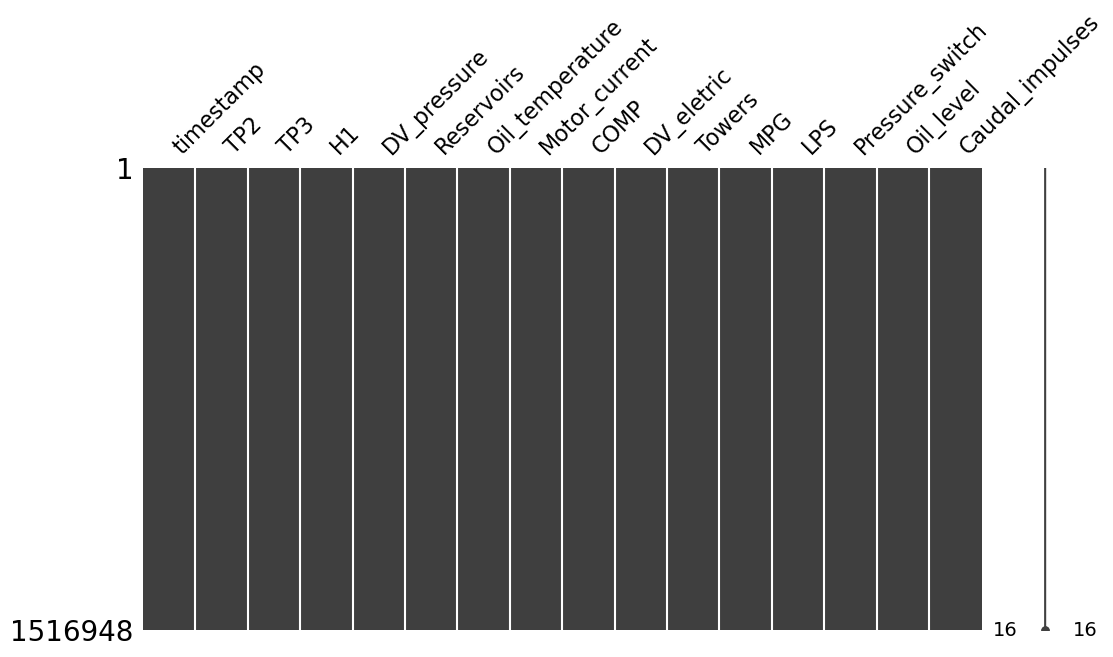

In [9]:
# Distribution des données manquantes dans le temps :
import missingno as msno

msno.matrix(df, figsize=(12, 6))  # Visualisation des données manquantes
plt.show()

In [34]:
# Filtrer uniquement les colonnes numériques dans un DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

In [35]:
#############################################################
### Trouver les irrégularités temporelles dans le dataset ###
#############################################################

# Calculer le gap (saut) entre chaque 2 observations consecutives.
time_diffs_seconds = df['timestamp'].diff().dt.total_seconds().dropna()
display(time_diffs_seconds)
# Fonction pour convertir les secondes en une durée lisible
def format_duration(seconds):
    days, seconds = divmod(seconds, 86400)  # 86400 secondes dans un jour
    hours, seconds = divmod(seconds, 3600)  # 3600 secondes dans une heure
    minutes, seconds = divmod(seconds, 60)  # 60 secondes dans une minute
    components = [
        f"{int(days)} jours" if days > 0 else "",
        f"{int(hours)} heures" if hours > 0 else "",
        f"{int(minutes)} minutes" if minutes > 0 else "",
        f"{int(seconds)} secondes" if seconds > 0 else "",
    ]
    return ", ".join(filter(None, components))  # Filtrer les parties vides

# Calculer les statistiques nécessaires
min_interval = time_diffs_seconds.min()  # Le minimum d'intervalle
max_interval = time_diffs_seconds.max()  # Le maximum d'intervalle
mode_interval = time_diffs_seconds.mode()[0]  # Le mode (valeur la plus fréquente)

# Identifier les irrégularités
irregular_intervals = time_diffs_seconds[time_diffs_seconds != mode_interval]
num_irregularities = len(irregular_intervals)  # Nombre total d'irrégularités

# Améliorer l'affichage du max
max_interval_formatted = format_duration(max_interval)

# Afficher les résultats
print("Résumé des intervalles de temps :")
print(f"Min : {min_interval} secondes")  # Le plus petit intervalle
print(f"Max : {max_interval} secondes ({max_interval_formatted})")  # Le plus grand intervalle, formaté
print(f"Mode (valeur typique) : {mode_interval} secondes")
print(f"Nombre d'irrégularités : {num_irregularities}")


# Calculer le nombre d'irrégularités par classe (par valeur unique d'intervalle)
interval_counts = time_diffs_seconds.value_counts().sort_index()

# Afficher le nombre d'irrégularités par classe d'intervalle
print("\nNombre d'irrégularités par classe d'intervalle :")
for interval, count in interval_counts.items():
    duration_formatted = format_duration(interval)
    print(f"{duration_formatted}: {count} observations")

1         10.00
2          9.00
3         10.00
4         10.00
5         10.00
           ... 
1516943   10.00
1516944   10.00
1516945   10.00
1516946   10.00
1516947   10.00
Name: timestamp, Length: 1516947, dtype: float64

Résumé des intervalles de temps :
Min : 8.0 secondes
Max : 172918.0 secondes (2 jours, 1 minutes, 58 secondes)
Mode (valeur typique) : 10.0 secondes
Nombre d'irrégularités : 179426

Nombre d'irrégularités par classe d'intervalle :
8 secondes: 2 observations
9 secondes: 128277 observations
10 secondes: 1337521 observations
11 secondes: 4471 observations
12 secondes: 38321 observations
13 secondes: 7988 observations
14 secondes: 3 observations
15 secondes: 1 observations
17 secondes: 3 observations
18 secondes: 1 observations
19 secondes: 5 observations
20 secondes: 3 observations
21 secondes: 10 observations
22 secondes: 4 observations
23 secondes: 3 observations
26 secondes: 1 observations
27 secondes: 1 observations
30 secondes: 1 observations
1 minutes, 44 secondes: 1 observations
1 minutes, 50 secondes: 2 observations
1 minutes, 52 secondes: 1 observations
2 minutes, 2 secondes: 1 observations
2 minutes, 9 secondes: 1 observations
2 minutes, 10 secondes: 1 observations
2 minutes, 19


<h2>Notre approche</h2>
<p>Notre approche est de développer d'abord un <strong>Modèle 2 (Imputation des Données Manquantes)</strong> avant de passer au <strong>Modèle 1 (Prédiction des Pannes)</strong> étant donné l'ampleur des irrégularités dans les gaps. Cependant, on va justifier cette stratégie et évaluer les risques associés. Voici une analyse détaillée :</p>

<h3>Pourquoi cette approche?</h3>
<ol style="font-family: times, serif; font-size:12pt; color:blue;">
    <li><strong>Importance de la qualité des données :</strong>
        <ul style="color:black;">
            <li>Les modèles prédictifs, comme le Modèle 1, nécessitent des données complètes et fiables.</li>
            <li>Avec un tel niveau d’irrégularités et de données manquantes, construire un modèle sans imputation risque de produire des prédictions biaisées ou de faible performance.</li>
        </ul>
    </li>
    <li><strong>Structure du problème :</strong>
        <ul style="color:black;">
            <li>Les intervalles de temps irréguliers (comme les 20 secondes, 30 secondes, etc.) montrent des patterns potentiellement imputables à des erreurs ou des lacunes de collecte.</li>
            <li>La résolution de ces irrégularités via un Modèle 2 permet de recréer une série temporelle régulière.</li>
        </ul>
    </li>
    <li><strong>Enrichissement des données :</strong>
        <ul style="color:black;">
            <li>L'imputation des données manquantes permet de maintenir la structure temporelle et d’utiliser toutes les observations, maximisant ainsi les informations disponibles pour le Modèle 1.</li>
        </ul>
    </li>
</ol>

<h3>Les métriques pour justifier cette approche :</h3>
<ol style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>Étendue des données manquantes :</strong>
        <ul style="color:black;">
            <li>On a affiché les statistiques sur la quantité de données manquantes.</li>
            <li>On a montré les proportions des intervalles irréguliers par rapport au total des observations.</li>
        </ul>
    </li>
    <li><strong>Impact des données manquantes sur le Modèle 1 (avant imputation) :</strong>
        <ul style="color:black;">
            <li>On va construire un modèle simple (baseline) pour prédire les pannes en utilisant les données actuelles (non imputées).</li>
            <li>On va comparer les résultats avec et sans imputation.</li>
            <li>Métriques : F1-Score, Précision, et Recall pour évaluer les performances du Modèle 1 sur un jeu de test.</li>
        </ul>
    </li>
    <li><strong>Qualité de l’imputation des données manquantes (Modèle 2) :</strong>
        <ul style="color:black;">
            <li>Une fois que le Modèle 2 est construit, on va utiliser ces métriques pour justifier la qualité de l’imputation :</li>
            <ul>
                <li>Erreur absolue moyenne (MAE) ou Erreur quadratique moyenne (RMSE) entre les valeurs imputées et les vraies valeurs (sur un sous-ensemble connu).</li>
                <li>Visualisations des données imputées par rapport aux données originales.</li>
                <li>Cohérence temporelle (par exemple, pas de sauts brusques après imputation).</li>
            </ul>
        </ul>
    </li>
    <li><strong>Validation croisée :</strong>
        <ul style="color:black;">
            <li>On va tester l’impact de l’imputation sur la performance du Modèle 1 en utilisant un split temporel (train-test chronologique).</li>
            <li>On va comparer les performances du Modèle 1 avant et après imputation.</li>
        </ul>
    </li>
    <li><strong>Justification des données manquantes :</strong>
        <ul style="color:black;">
            <li>On va montrer des visualisations qui expliquent pourquoi les données manquantes perturbent l’apprentissage.</li>
            <li>Exemple : Graphique montrant que les données avec des gaps > 10 secondes sont majoritairement associées à des périodes critiques, comme les pannes.</li>
        </ul>
    </li>
</ol>

<h3>Alternatives à explorer :</h3>
<ol style="font-family: times, serif; font-size:12pt; color:red;">
    <li><strong>Travailler directement avec les données disponibles :</strong>
        <ul style="color:black;">
            <li>Construire des modèles capables de gérer les données irrégulières, comme :</li>
            <ul>
                <li>Les modèles à base de séries temporelles irrégulières (ex. : Gaussian Processes).</li>
                <li>Les modèles de type RNN (Recurrent Neural Networks) ou Transformer, capables de traiter des données incomplètes.</li>
            </ul>
        </ul>
    </li>
    <li><strong>Créer des caractéristiques dérivées :</strong>
        <ul style="color:black;">
            <li>Plutôt que d’imputer les données manquantes, on va utiliser les irrégularités temporelles comme des caractéristiques explicatives. (exemple : Créer une variable `gap_time` indiquant l'intervalle depuis la dernière observation).</li>
        </ul>
    </li>
    <li><strong>Utiliser des modèles robustes aux données manquantes :</strong>
        <ul style="color:black;">
            <li>Les modèles comme les algorithmes d’ensemble (e.g., Random Forest) peuvent gérer certaines données manquantes.</li>
        </ul>
    </li>
</ol>

# Étape préprocessing est necessaire pour continuer l'EDA : Ajout des Timestamp + Tag de la variable Panne

<h3 style="text-align: center; font-family: Arial, sans-serif; color: #4CAF50;">Dictionnaire des Datasources</h3>
<table style="width: 100%; border-collapse: collapse; font-family: Arial, sans-serif; font-size: 12pt; text-align: left;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="border: 1px solid #ddd; padding: 8px; color: #4CAF50; text-align: center; width: 30%;">Nom du Fichier</th>
            <th style="border: 1px solid #ddd; padding: 8px; color: #4CAF50; text-align: center; width: 20%;">Nom du DataFrame</th>
            <th style="border: 1px solid #ddd; padding: 8px; color: #4CAF50; text-align: center; width: 50%;">Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="border: 1px solid #ddd; padding: 1px; text-align: left;">MetroPT3.csv</td>
            <td style="border: 1px solid #ddd; padding: 1px; text-align: center;">df</td>
            <td style="border: 1px solid #ddd; padding: 1px; text-align: left;">Dataset Original</td>
        </tr>
        <tr>
            <td style="border: 1px solid #ddd; padding: 1px; text-align: left;">MetroPT3_corrected.csv</td>
            <td style="border: 1px solid #ddd; padding: 1px; text-align: center;">df</td>
            <td style="border: 1px solid #ddd; padding: 1px; text-align: left;">Dataset avec des observations vides, timestamp avec des gaps de 10 sec respectés avec tag de la panne</td>
        </tr>
    </tbody>
</table>


In [14]:
# Charger les données
df = pd.read_csv("../Datasources/MetroPT3_corrected.csv", delimiter=",", decimal=".", index_col=0)
df.reset_index(drop=True, inplace=True)

In [15]:
print(df.dtypes)

timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
panne                int64
dtype: object


In [16]:
# Convertir timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print(df.dtypes)

timestamp          datetime64[ns]
TP2                       float64
TP3                       float64
H1                        float64
DV_pressure               float64
Reservoirs                float64
Oil_temperature           float64
Motor_current             float64
COMP                      float64
DV_eletric                float64
Towers                    float64
MPG                       float64
LPS                       float64
Pressure_switch           float64
Oil_level                 float64
Caudal_impulses           float64
panne                       int64
dtype: object


In [17]:
# Statistiques descriptives globales
pd.options.display.float_format = '{:,.2f}'.format

# Statistiques descriptives globales
print("Statistiques descriptives :")
display(df.describe())

# Statistiques pour les colonnes spécifiques
print("\nNombre de valeurs manquantes par colonne :")
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).map("{:,.2f}%".format)
missing_stats = pd.DataFrame({
    'Valeurs manquantes': missing_counts.map("{:,}".format),
    'Pourcentage manquant': missing_percent
})

display(missing_stats)

Statistiques descriptives :


TP2          TP3           H1  DV_pressure   Reservoirs  \
count 1,504,123.00 1,504,123.00 1,504,123.00 1,504,123.00 1,504,123.00   
mean          1.37         8.98         7.57         0.06         8.99   
std           3.25         0.64         3.33         0.38         0.64   
min          -0.03         0.73        -0.04        -0.03         0.71   
25%          -0.01         8.49         8.25        -0.02         8.49   
50%          -0.01         8.96         8.78        -0.02         8.96   
75%          -0.01         9.49         9.37        -0.02         9.49   
max          10.68        10.30        10.29         9.84        10.30   

       Oil_temperature  Motor_current         COMP   DV_eletric       Towers  \
count     1,504,123.00   1,504,123.00 1,504,123.00 1,504,123.00 1,504,123.00   
mean             62.64           2.05         0.84         0.16         0.92   
std               6.52           2.30         0.37         0.37         0.27   
min              15.40           0.02         0.00         0.00         0.00   
25%              57.78           0.04         1.00         0.00         1.00   
50%              62.73           0.04         1.00         0.00         1.00   
75%              67.25           3.81         1.00         0.00         1.00   
max              89.05           9.29         1.00         1.00         1.00   

               MPG          LPS  Pressure_switch    Oil_level  \
count 1,504,123.00 1,504,123.00     1,504,123.00 1,504,123.00   
mean          0.83         0.00             0.99         0.90   
std           0.37         0.06             0.09         0.29   
min           0.00         0.00             0.00         0.00   
25%           1.00         0.00             1.00         1.00   
50%           1.00         0.00             1.00         1.00   
75%           1.00         0.00             1.00         1.00   
max           1.00         1.00             1.00         1.00   

       Caudal_impulses        panne  
count     1,504,123.00 1,841,760.00  
mean              0.94         0.02  
std               0.24         0.14  
min               0.00         0.00  
25%               1.00         0.00  
50%               1.00         0.00  
75%               1.00         0.00  
max               1.00         2.00


Nombre de valeurs manquantes par colonne :


Valeurs manquantes Pourcentage manquant
timestamp                        0                0.00%
TP2                        337,637               18.33%
TP3                        337,637               18.33%
H1                         337,637               18.33%
DV_pressure                337,637               18.33%
Reservoirs                 337,637               18.33%
Oil_temperature            337,637               18.33%
Motor_current              337,637               18.33%
COMP                       337,637               18.33%
DV_eletric                 337,637               18.33%
Towers                     337,637               18.33%
MPG                        337,637               18.33%
LPS                        337,637               18.33%
Pressure_switch            337,637               18.33%
Oil_level                  337,637               18.33%
Caudal_impulses            337,637               18.33%
panne                            0                0.00%

In [21]:
# Identifier les doublons
duplicated_rows = df[df.duplicated()]
print(f"Nombre de doublons : {len(duplicated_rows)}")

# Détection des doublons dans les timestamps
duplicated_timestamps = df[df['timestamp'].duplicated()]
print(f"Nombre de doublons dans les timestamps : {len(duplicated_timestamps)}")

# Vérifier l'ordre des timestamps
is_sorted = df['timestamp'].is_monotonic_increasing
print(f"Les timestamps sont triés : {is_sorted}")

Nombre de doublons : 0
Nombre de doublons dans les timestamps : 0
Les timestamps sont triés : True


In [22]:
# verification du nombre restant des irrigularités
time_diffs_seconds = df['timestamp'].diff().dt.total_seconds().dropna()

# Fonction pour convertir les secondes en une durée lisible
def format_duration(seconds):
    days, seconds = divmod(seconds, 86400)  # 86400 secondes dans un jour
    hours, seconds = divmod(seconds, 3600)  # 3600 secondes dans une heure
    minutes, seconds = divmod(seconds, 60)  # 60 secondes dans une minute
    components = [
        f"{int(days)} jours" if days > 0 else "",
        f"{int(hours)} heures" if hours > 0 else "",
        f"{int(minutes)} minutes" if minutes > 0 else "",
        f"{int(seconds)} secondes" if seconds > 0 else "",
    ]
    return ", ".join(filter(None, components))  # Filtrer les parties vides

# Calculer les statistiques nécessaires
min_interval = time_diffs_seconds.min()  # Le minimum d'intervalle
max_interval = time_diffs_seconds.max()  # Le maximum d'intervalle
mode_interval = time_diffs_seconds.mode()[0]  # Le mode (valeur la plus fréquente)

# Identifier les irrégularités
irregular_intervals = time_diffs_seconds[time_diffs_seconds != mode_interval]
num_irregularities = len(irregular_intervals)  # Nombre total d'irrégularités

# Améliorer l'affichage du max
max_interval_formatted = format_duration(max_interval)

# Afficher les résultats
print("Résumé des intervalles de temps :")
print(f"Min : {min_interval} secondes")  # Le plus petit intervalle
print(f"Max : {max_interval} secondes ({max_interval_formatted})")  # Le plus grand intervalle, formaté
print(f"Mode (valeur typique) : {mode_interval} secondes")
print(f"Nombre d'irrégularités : {num_irregularities}")


# Calculer le nombre d'irrégularités par classe (par valeur unique d'intervalle)
interval_counts = time_diffs_seconds.value_counts().sort_index()

# Afficher le nombre d'irrégularités par classe d'intervalle
print("\nNombre d'irrégularités par classe d'intervalle :")
for interval, count in interval_counts.items():
    duration_formatted = format_duration(interval)
    print(f"{duration_formatted}: {count} observations")

Résumé des intervalles de temps :
Min : 10.0 secondes
Max : 10.0 secondes (10 secondes)
Mode (valeur typique) : 10.0 secondes
Nombre d'irrégularités : 0

Nombre d'irrégularités par classe d'intervalle :
10 secondes: 1841759 observations


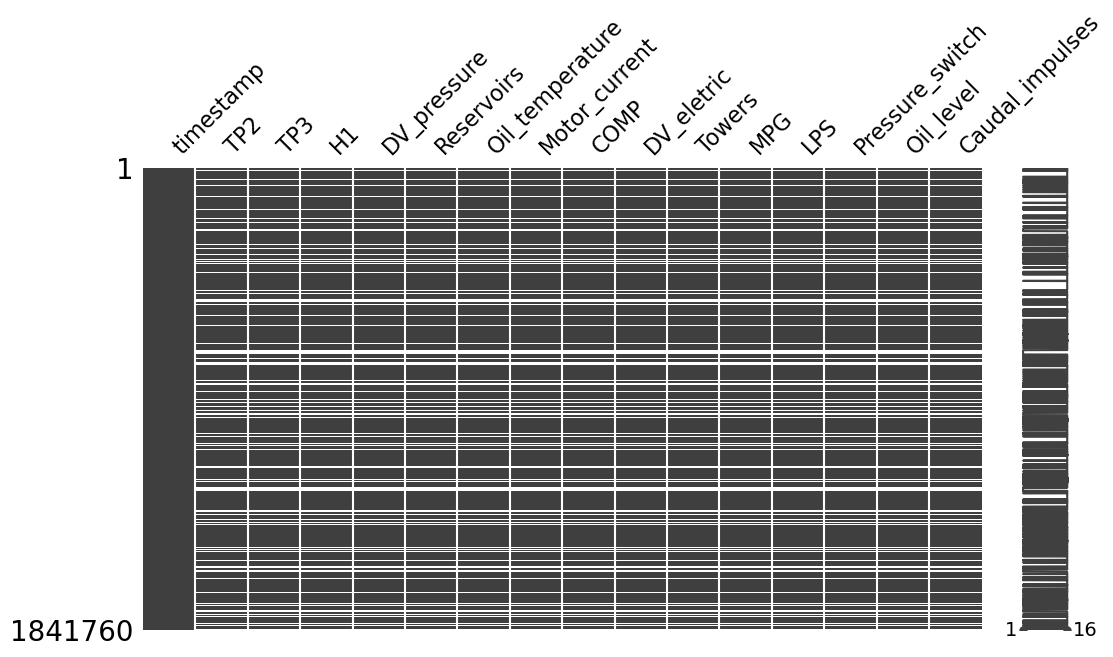

In [16]:
# Distribution des données manquantes dans le temps :
import missingno as msno

msno.matrix(df, figsize=(12, 6))  # Visualisation des données manquantes
plt.show()

# Analyse graphique des Séries Temporelles

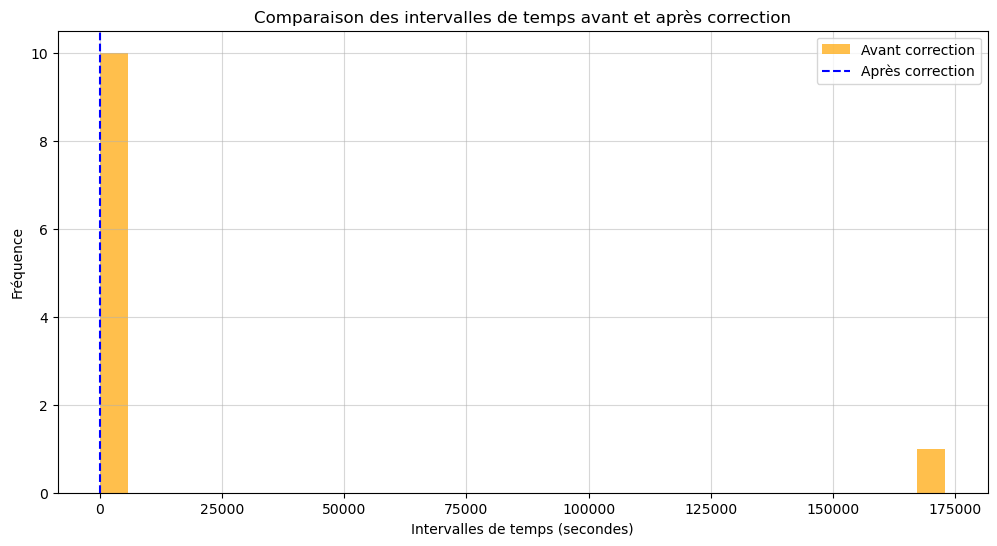

In [33]:
# Comparaison des intervalles de temps avant et après correction
before_correction = [8, 9, 10, 11, 12, 13, 14, 15, 20, 120, 172918]  # Exemples d'intervalles avant correction
after_correction = [10] * 1841759  # Tous les intervalles sont désormais de 10 secondes

# Visualisation
plt.figure(figsize=(12, 6))
plt.hist(before_correction, bins=30, alpha=0.7, label='Avant correction', color='orange')
plt.axvline(10, color='blue', linestyle='--', label='Après correction')
plt.title("Comparaison des intervalles de temps avant et après correction")
plt.xlabel("Intervalles de temps (secondes)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


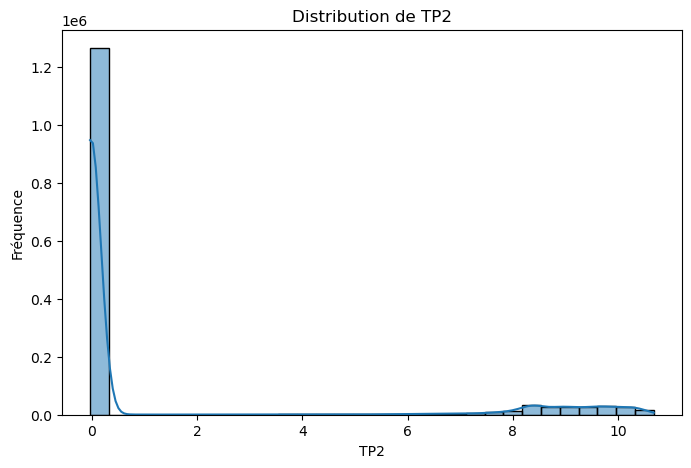

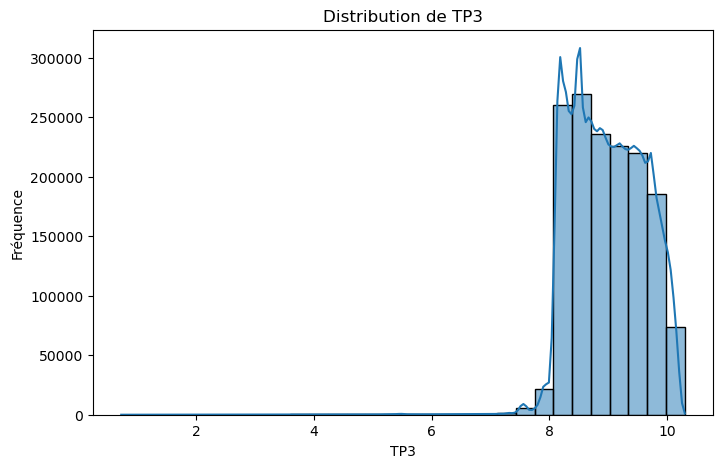

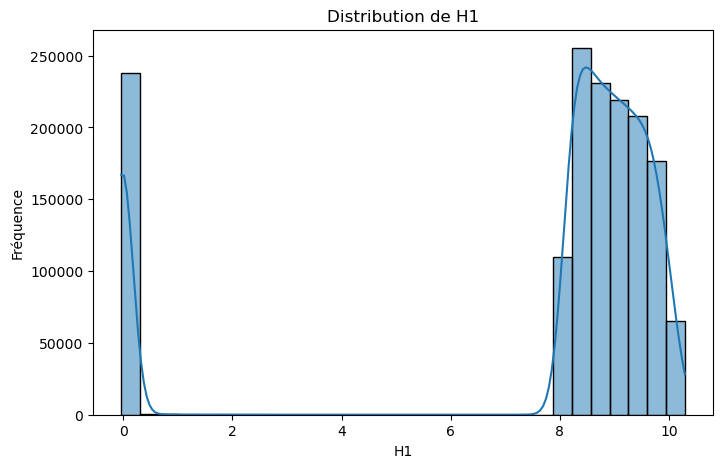

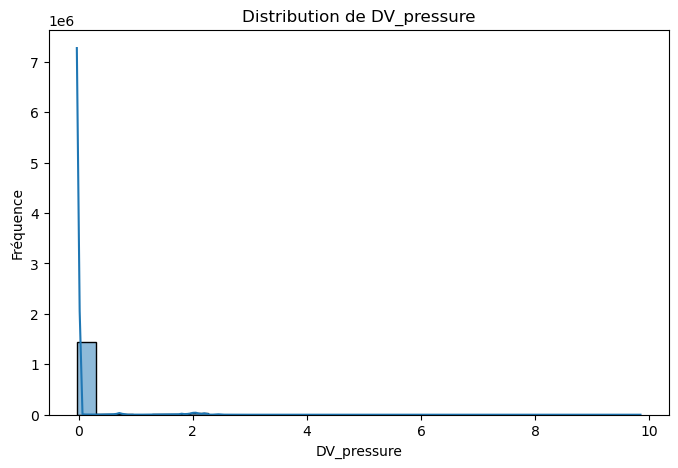

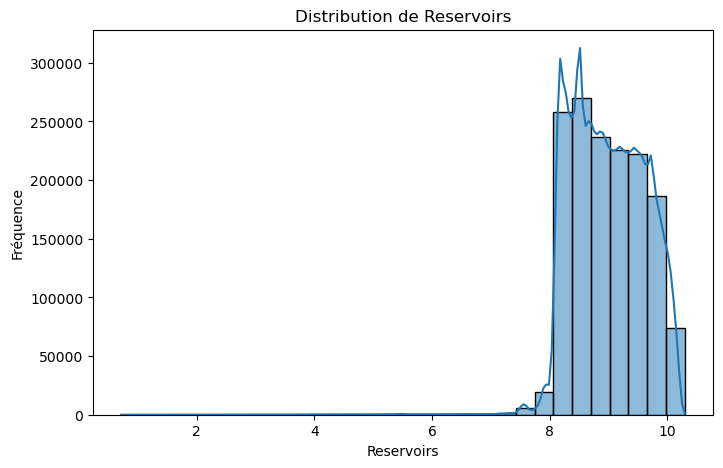

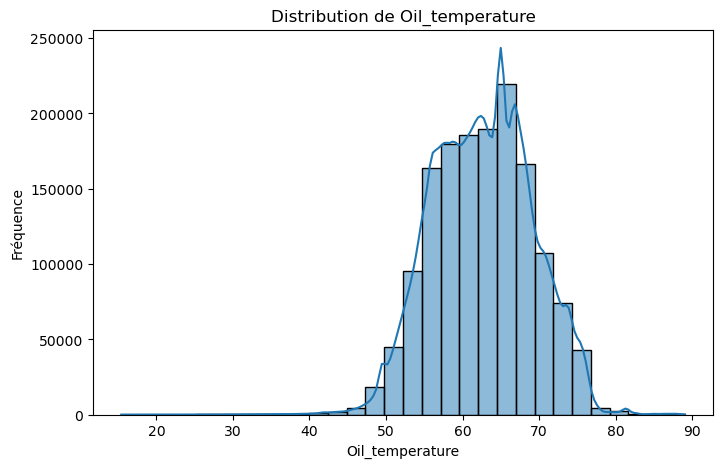

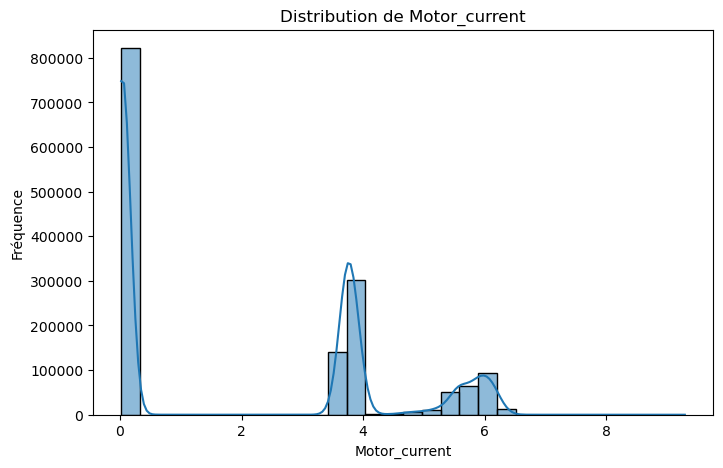

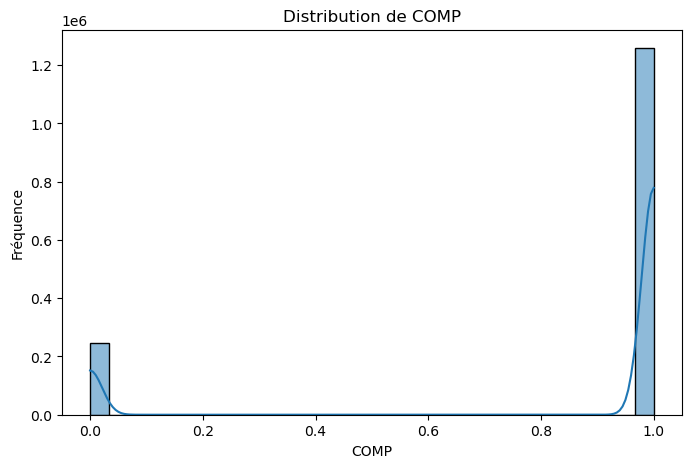

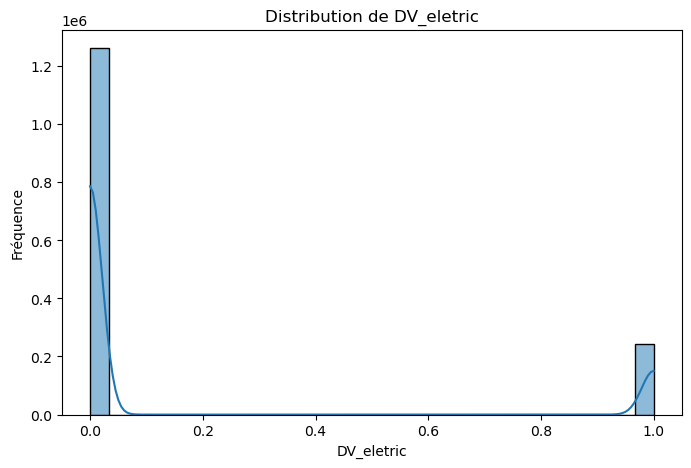

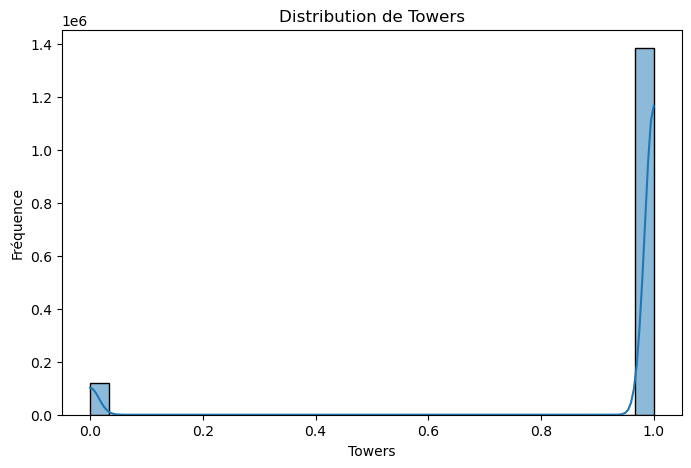

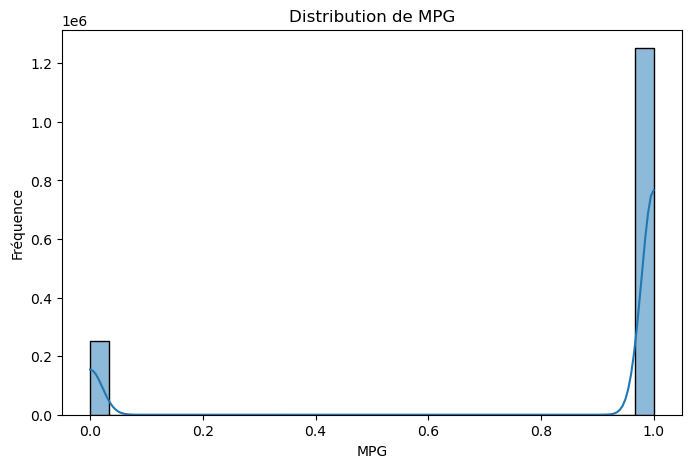

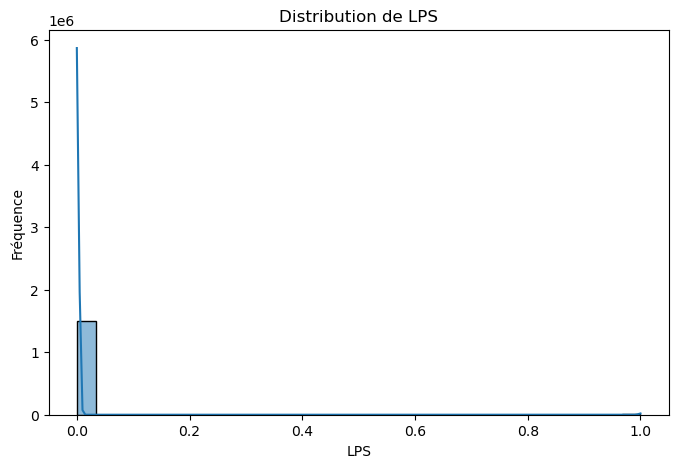

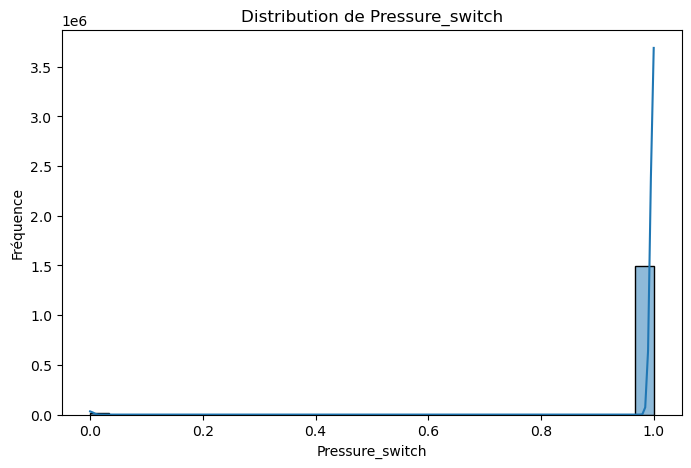

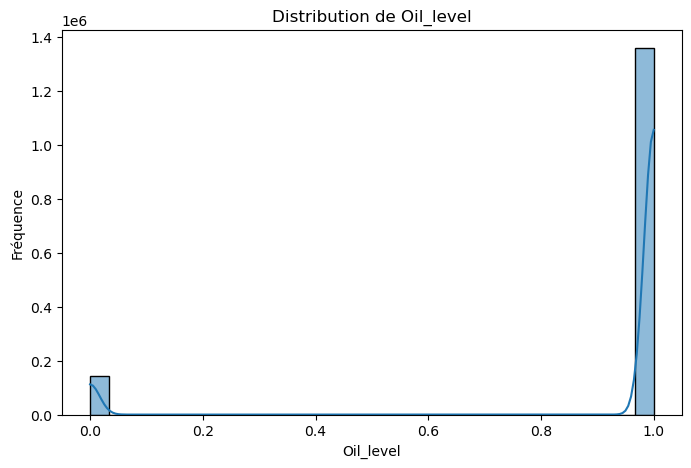

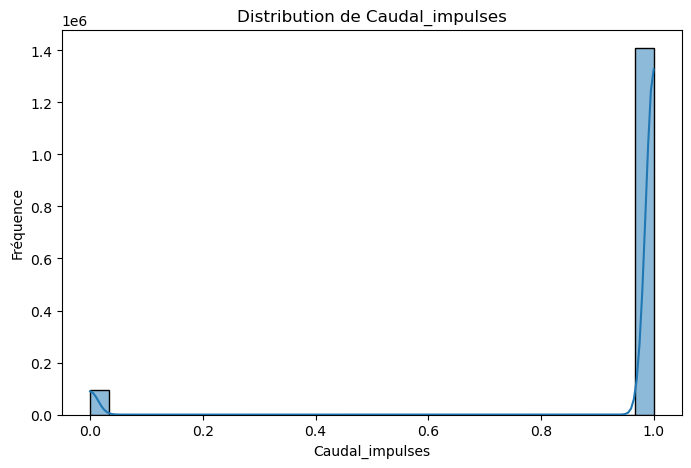

In [19]:
# Visualisations des distribution univariées (Histogrammes)

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

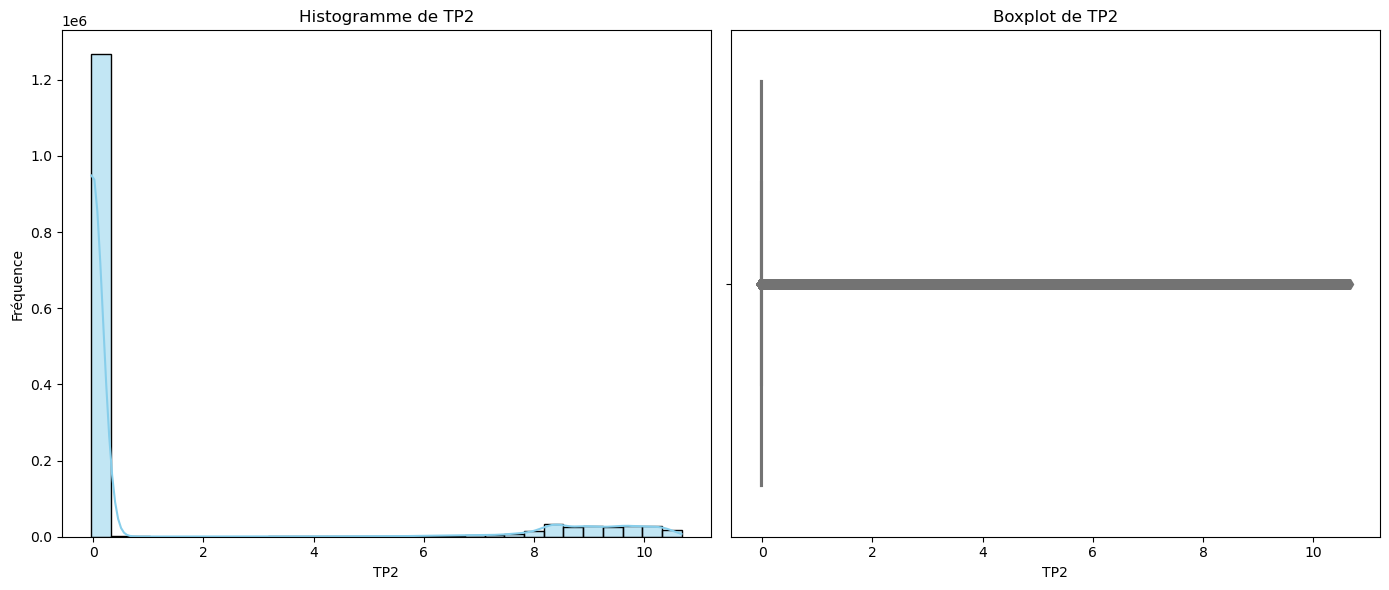

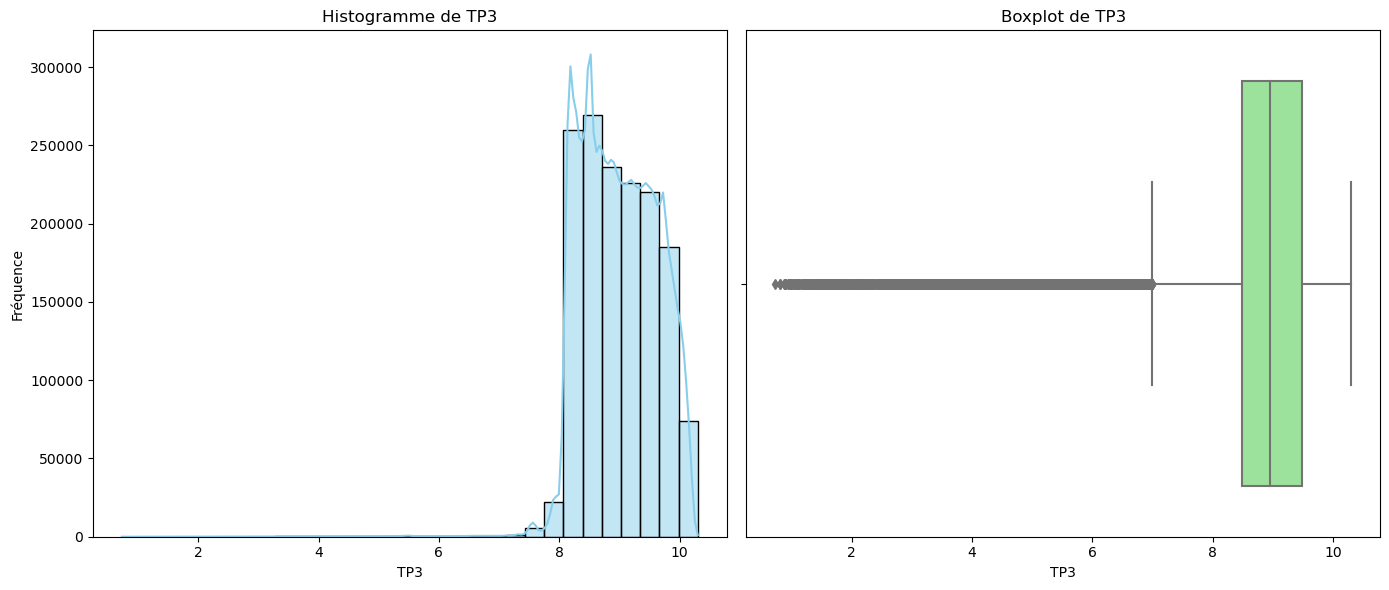

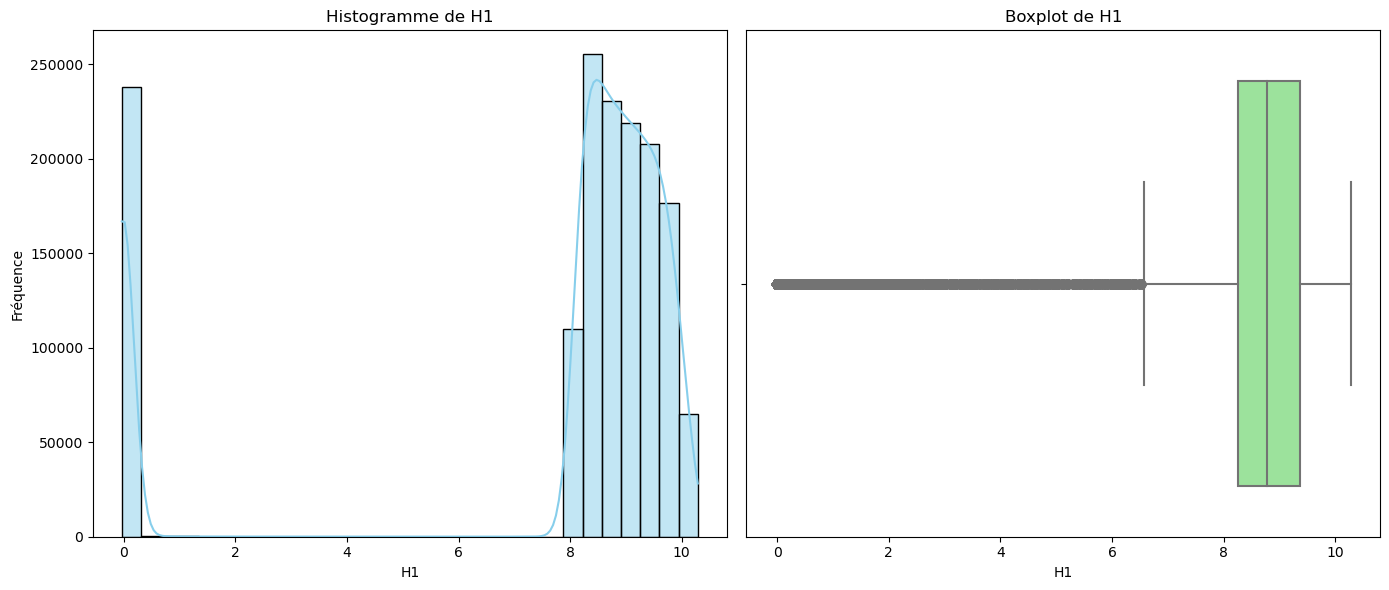

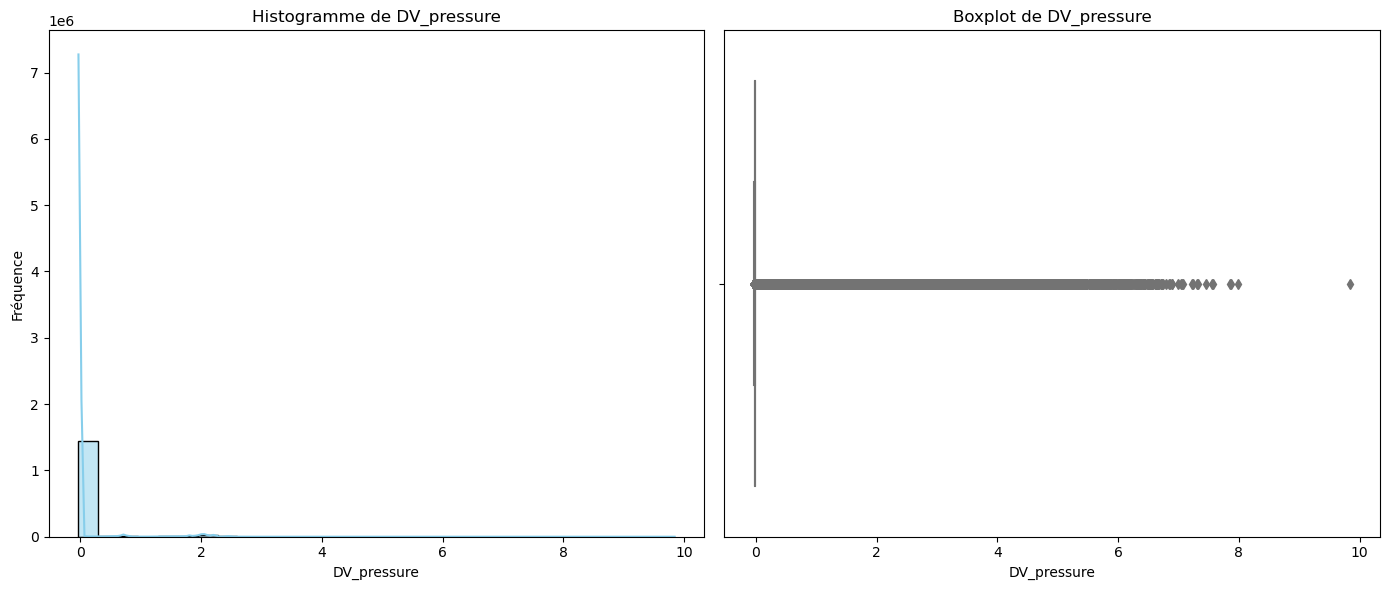

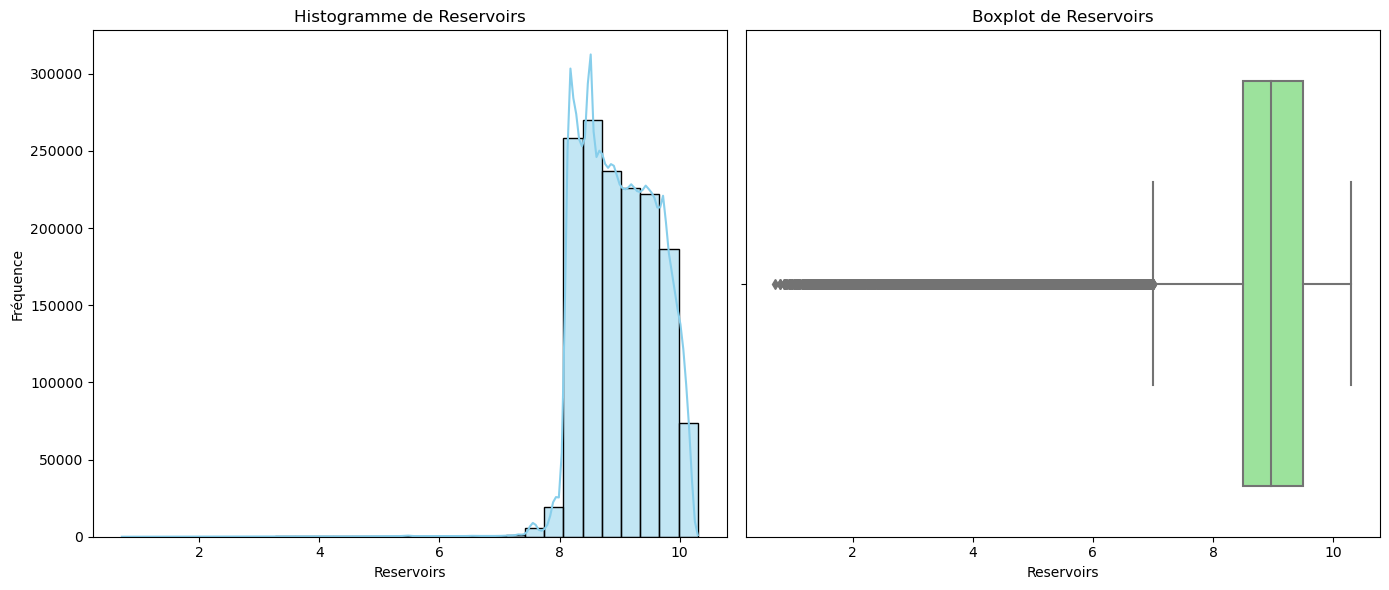

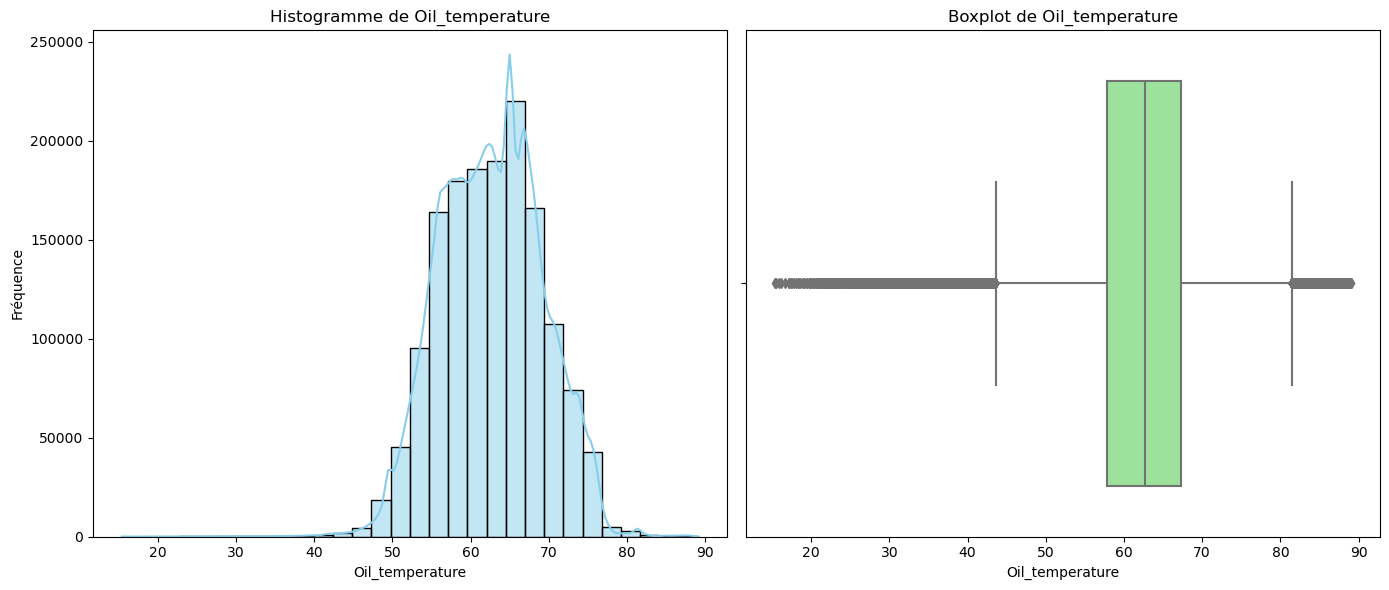

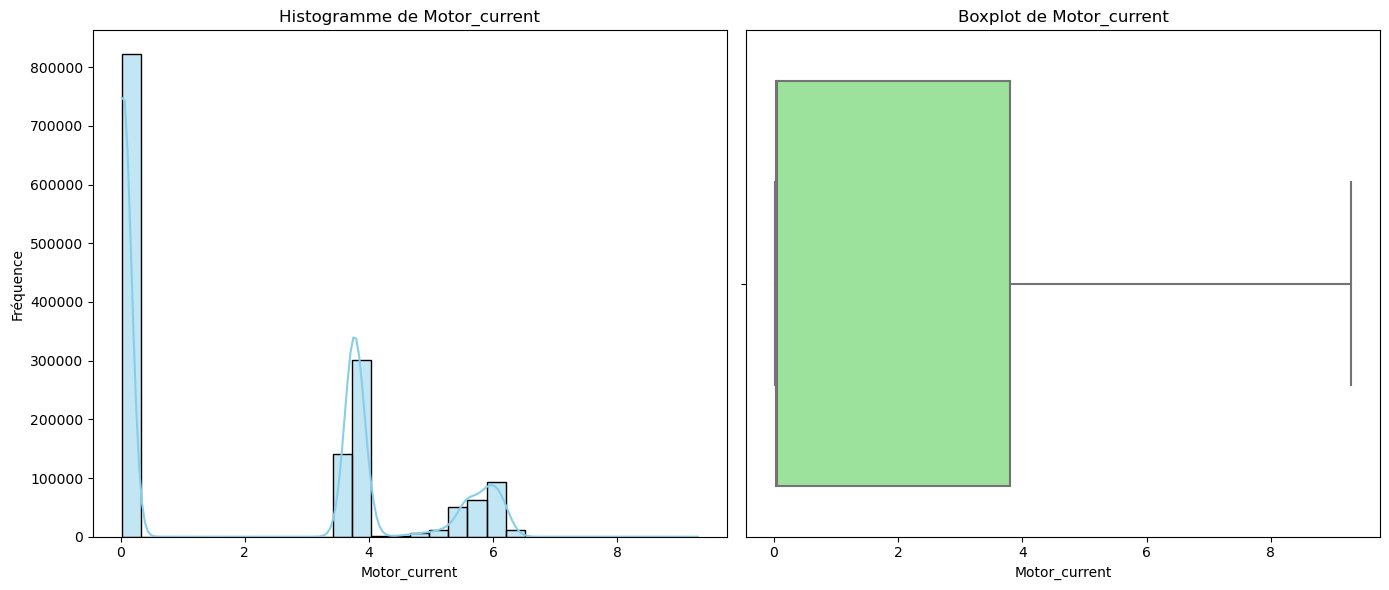

In [39]:
# Liste des colonnes continues
continous_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 
                     'Oil_temperature', 'Motor_current']

# Génération des visualisations
for col in continous_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna(), color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


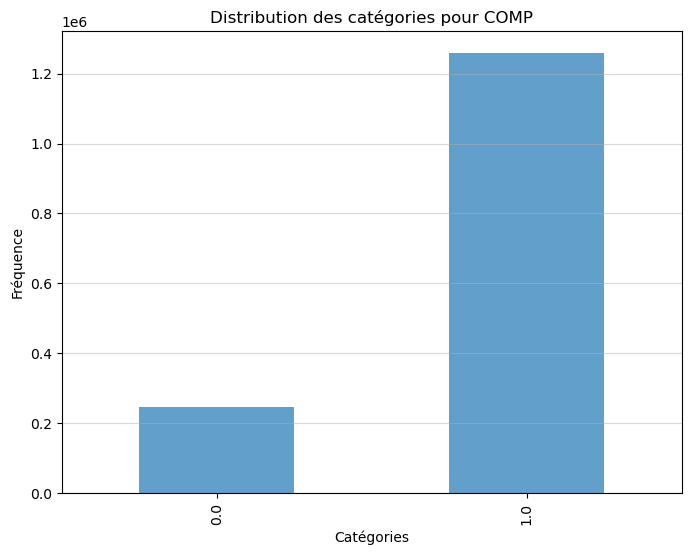

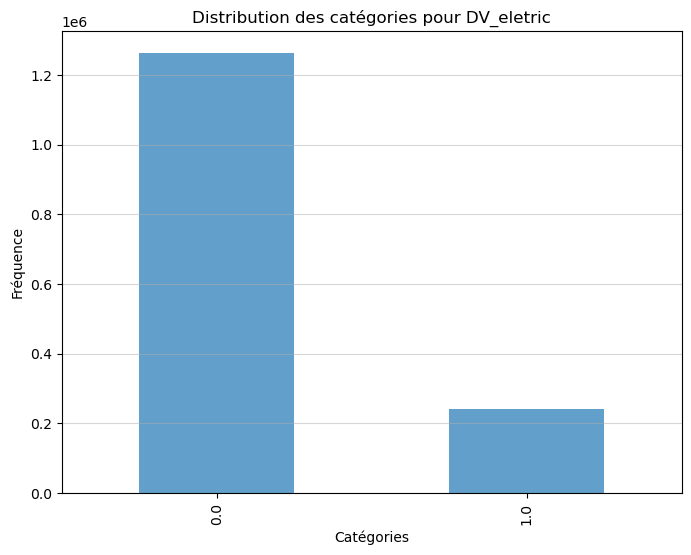

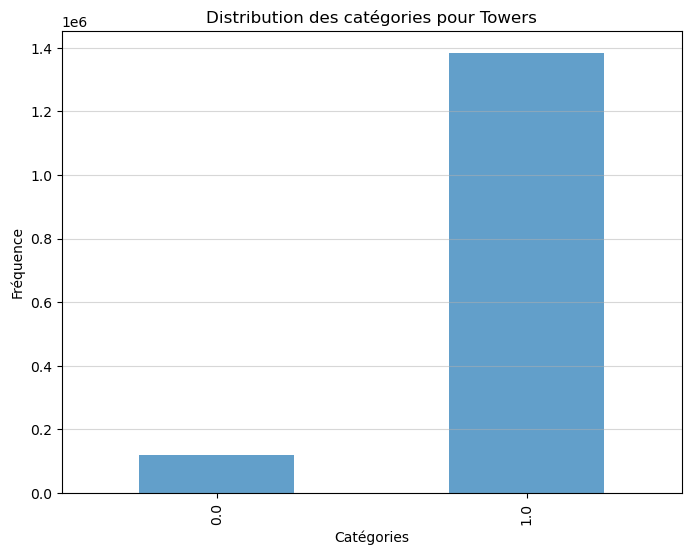

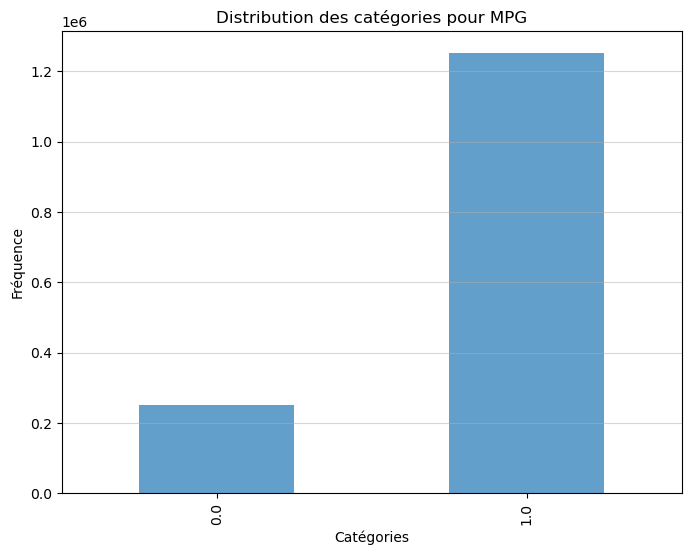

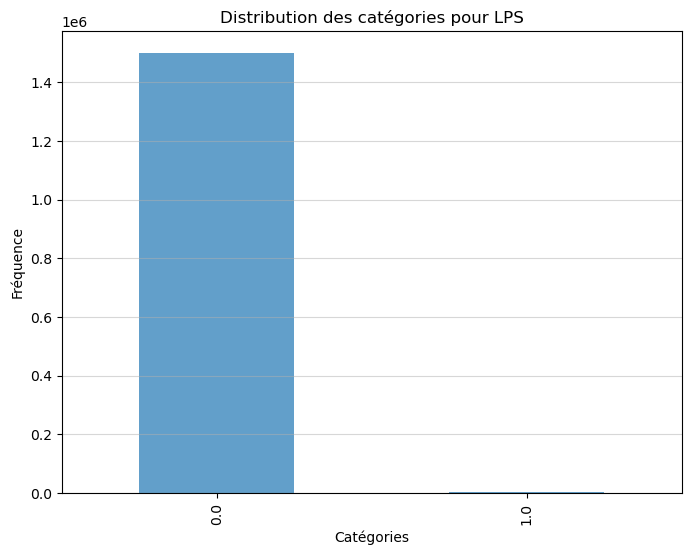

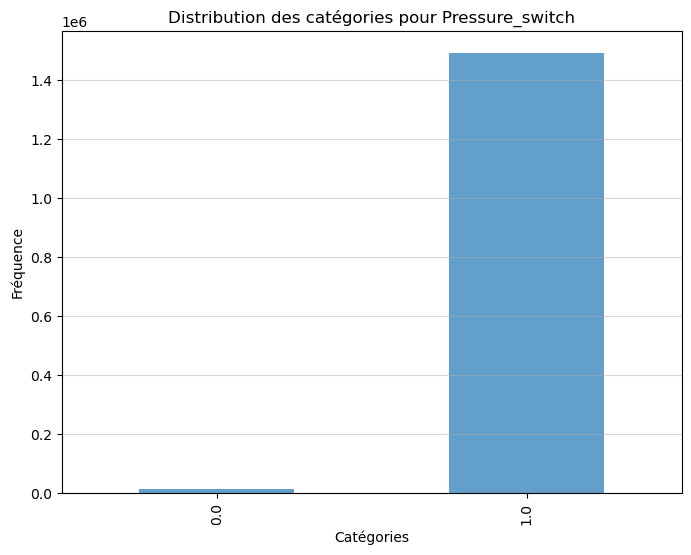

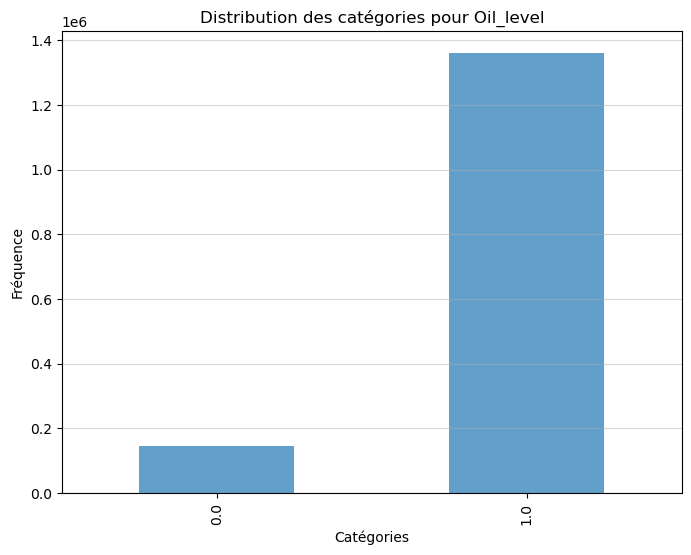

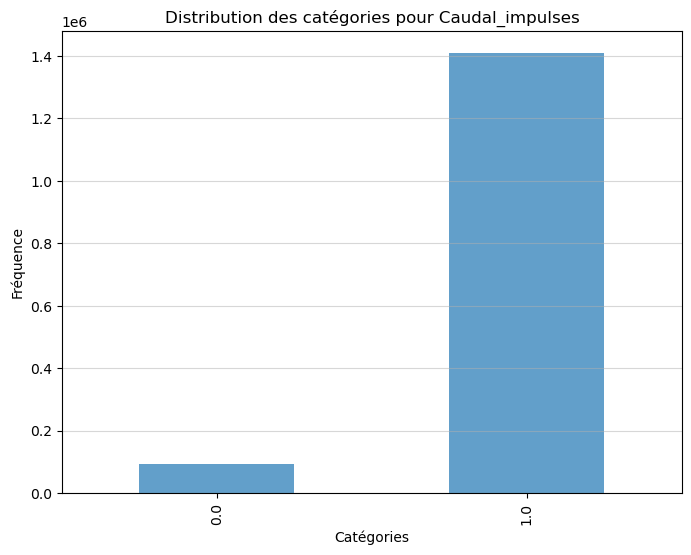

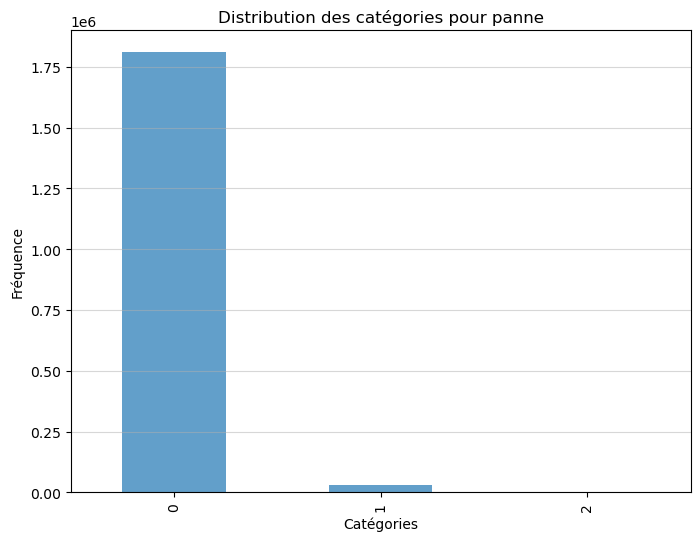

In [40]:
# Variables discretes identifiées
discrete_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'panne']

# Distribution des catégories pour chaque variable discrète
for col in discrete_columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot(kind='bar', alpha=0.7)
    plt.title(f"Distribution des catégories pour {col}")
    plt.xlabel("Catégories")
    plt.ylabel("Fréquence")
    plt.grid(axis='y', alpha=0.5)
    plt.show()


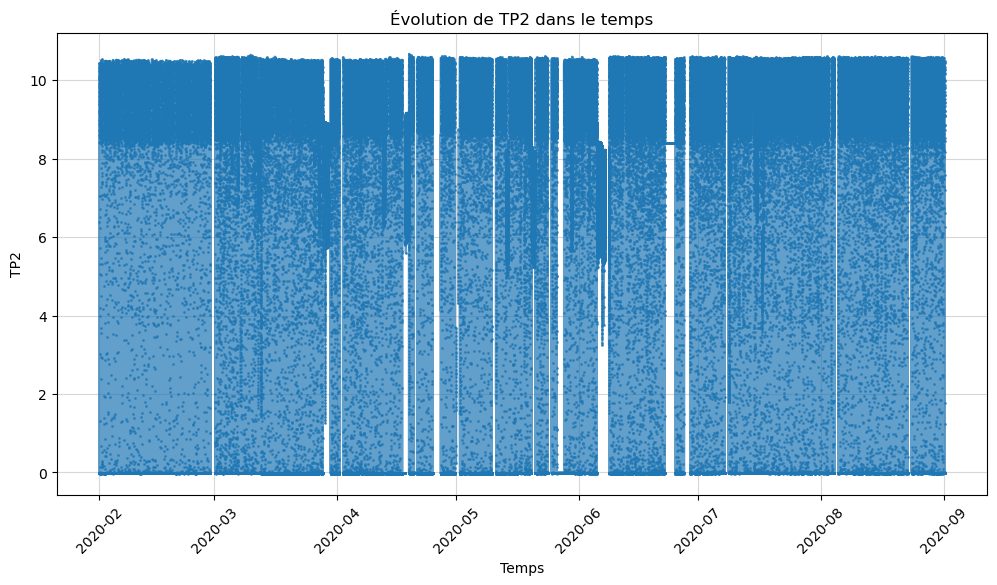

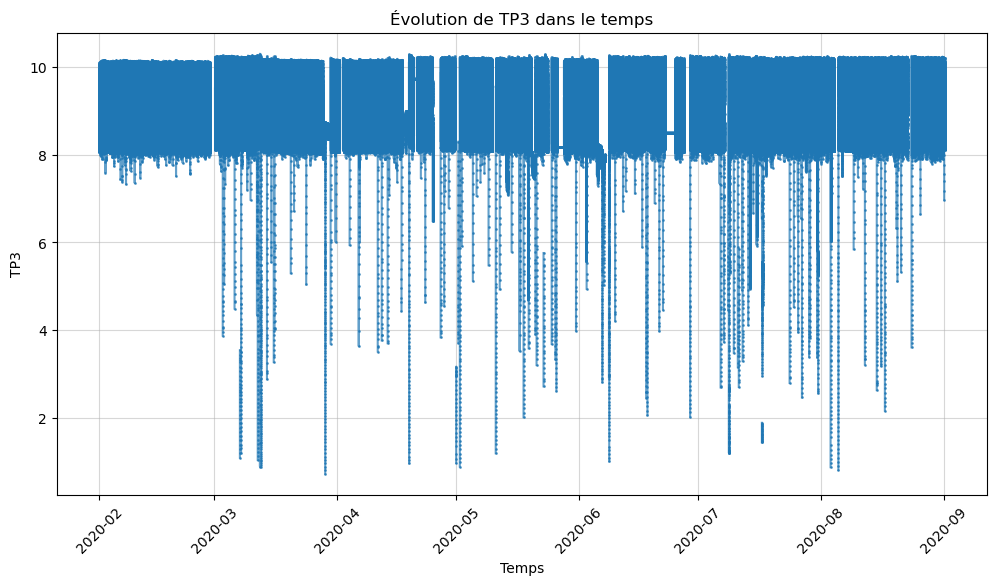

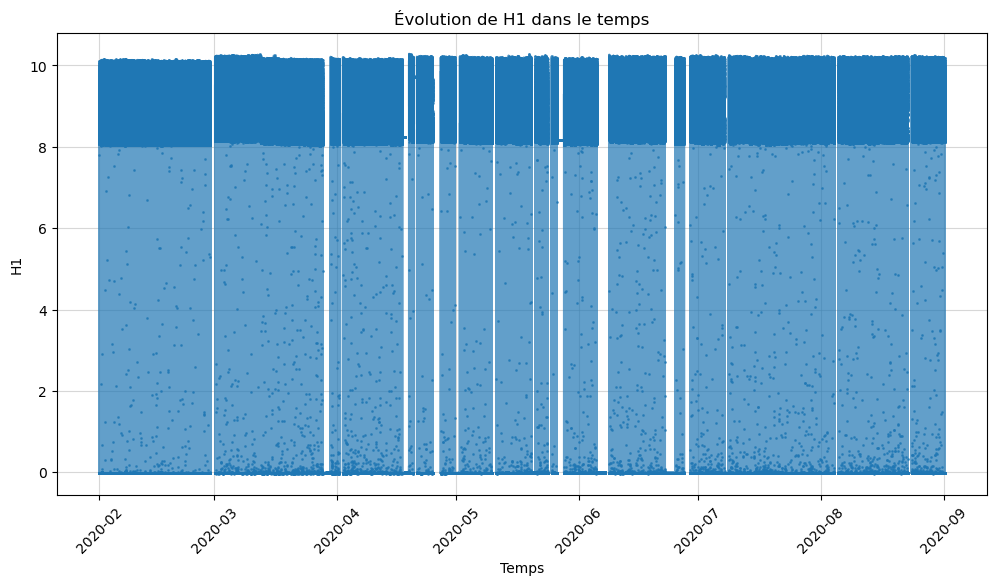

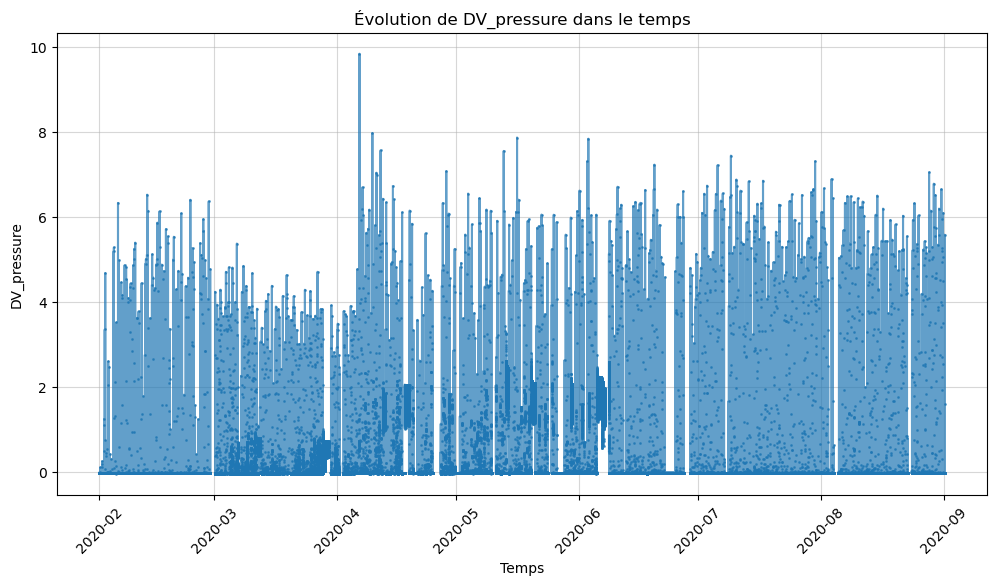

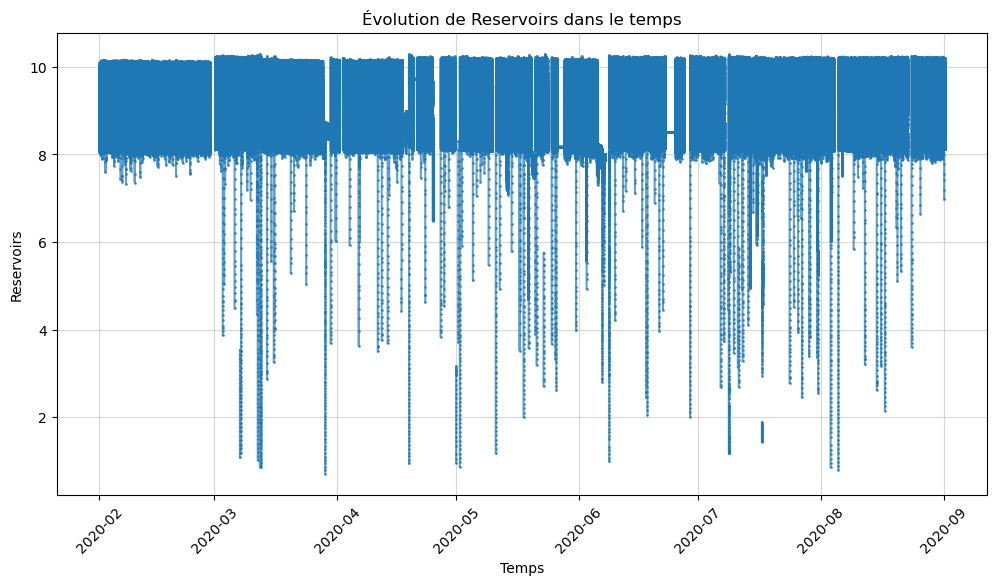

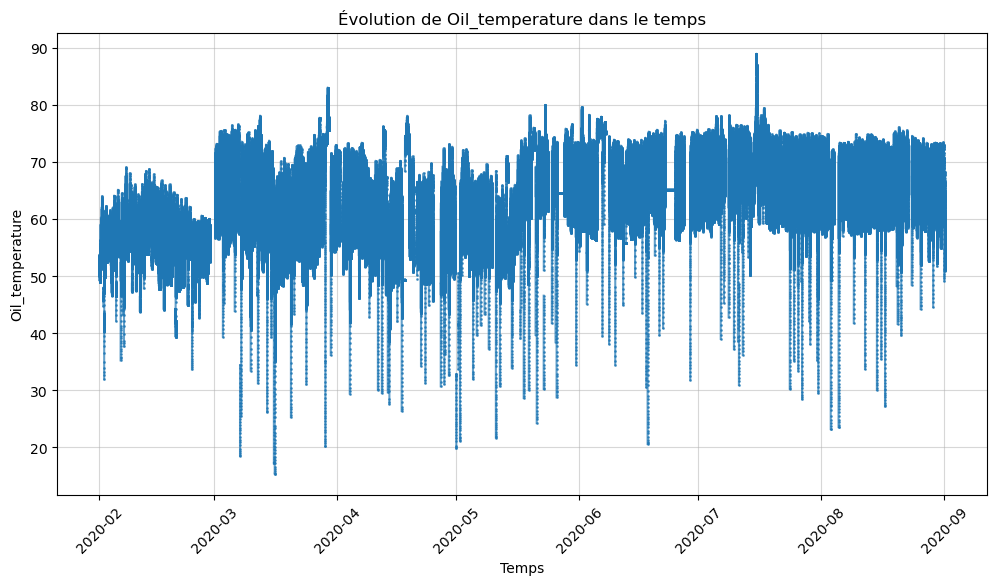

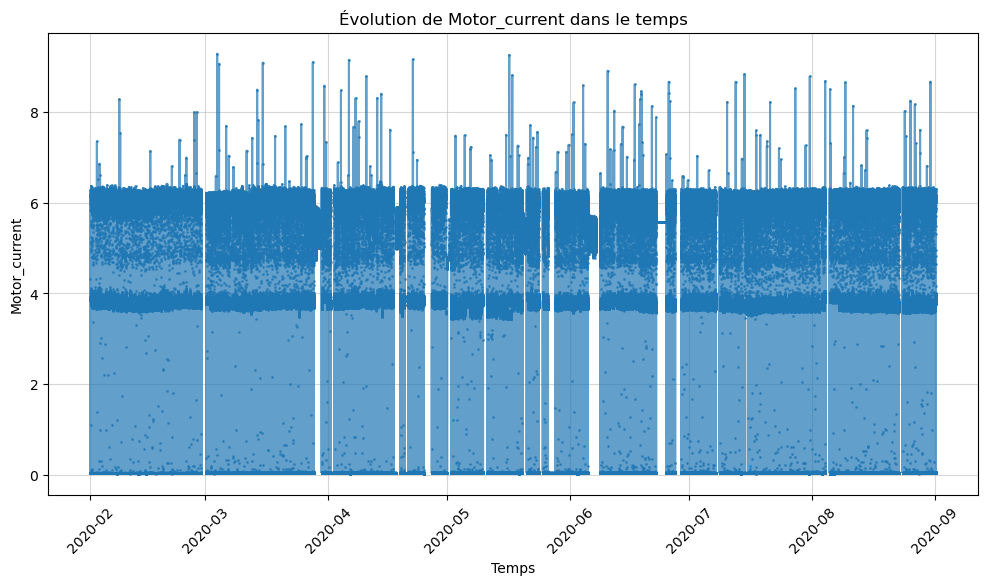

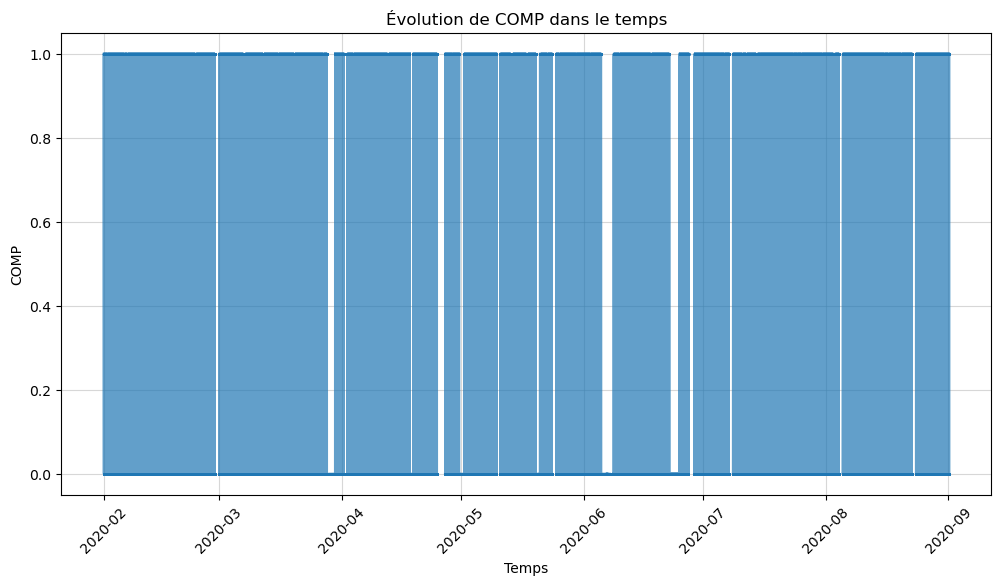

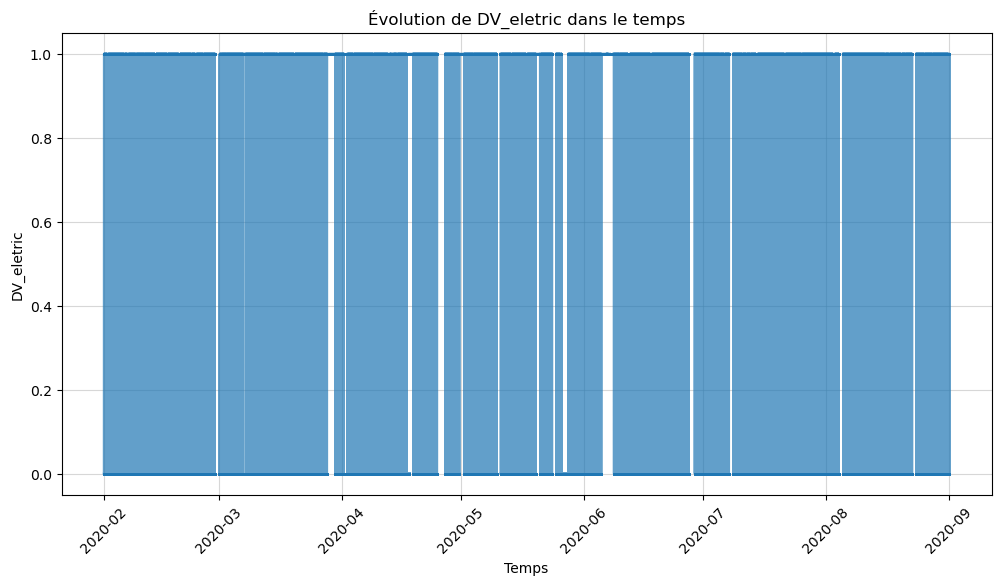

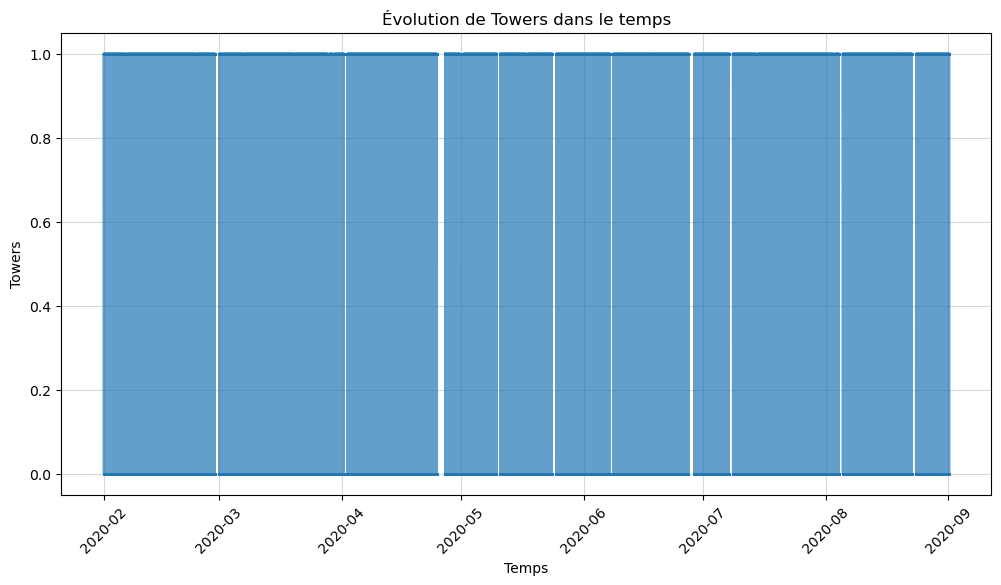

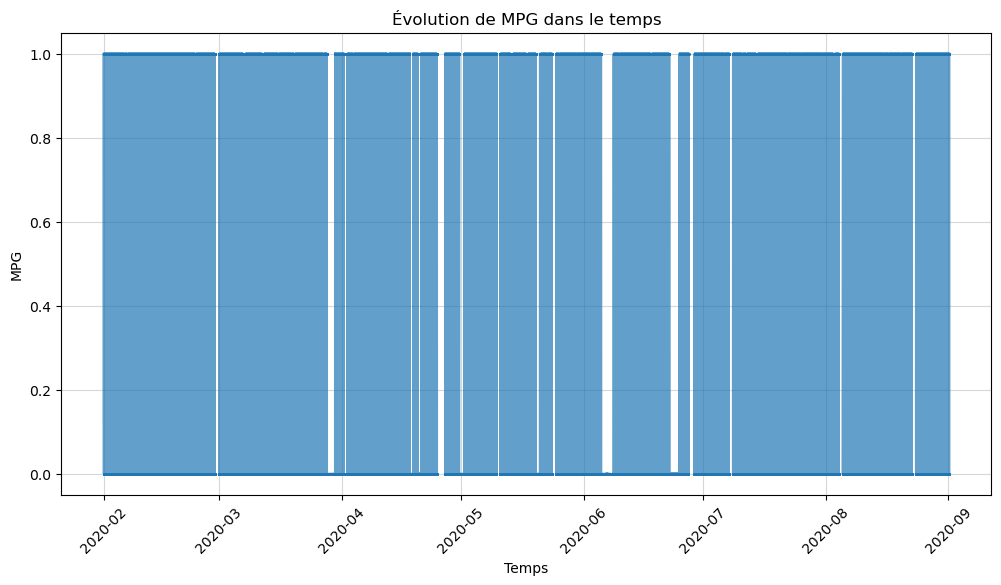

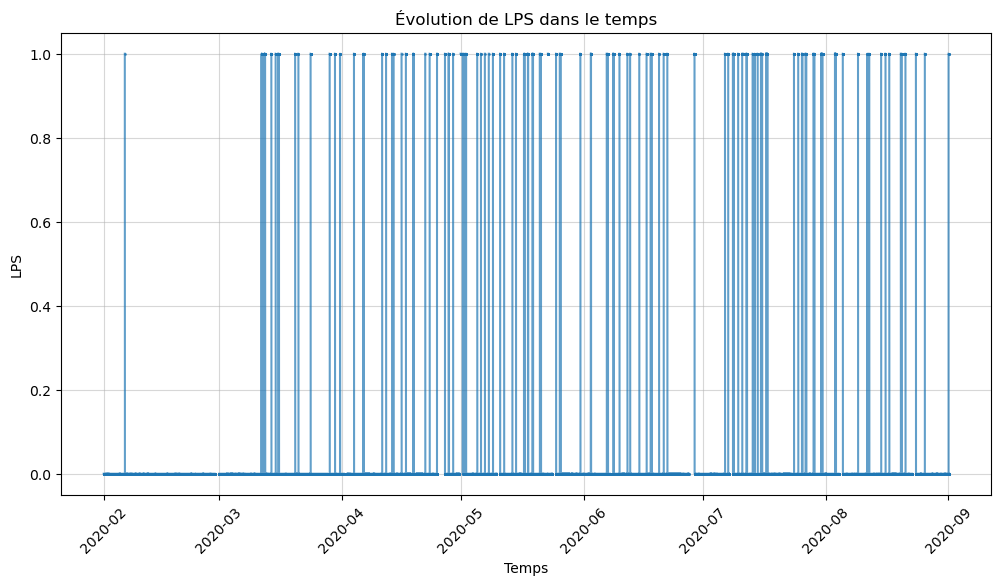

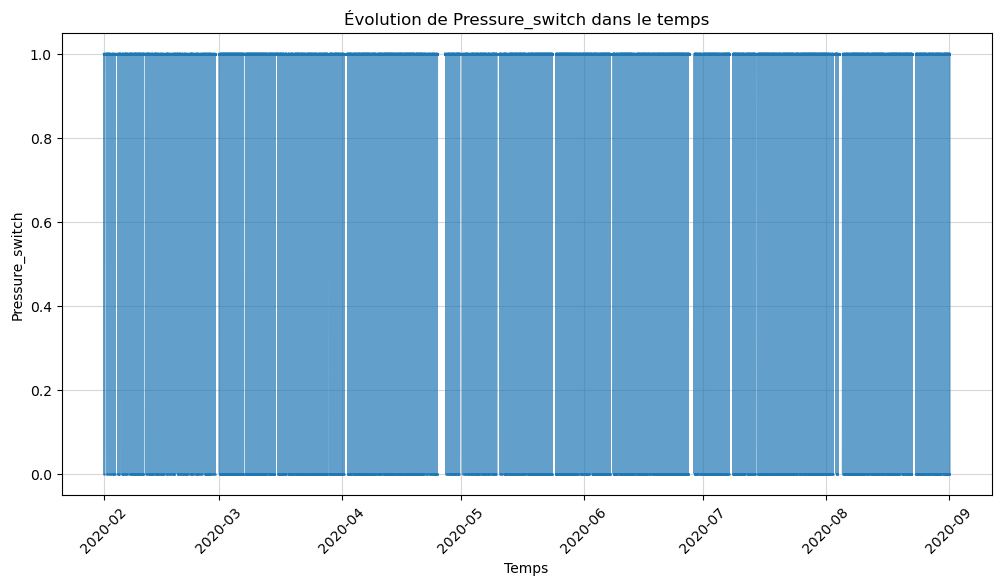

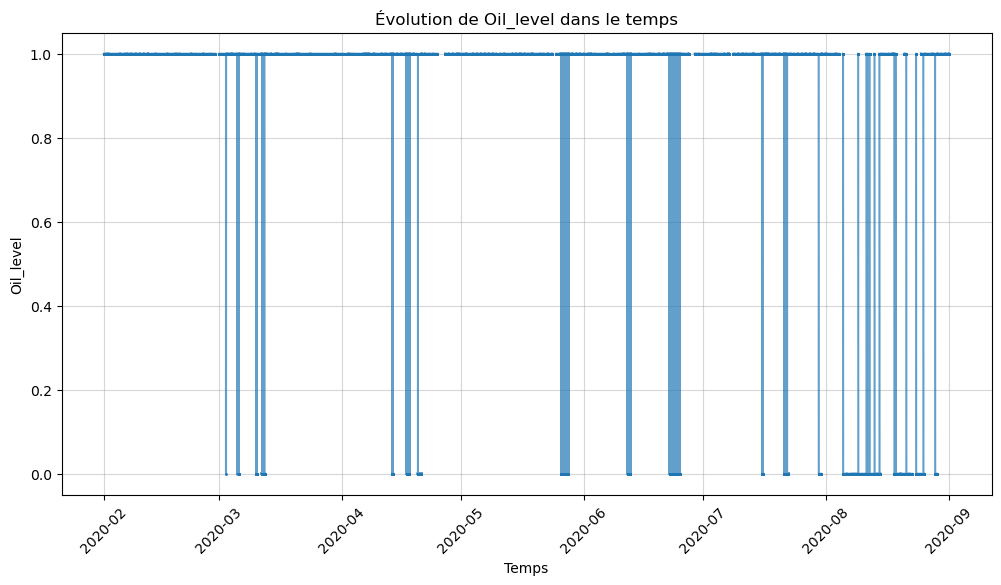

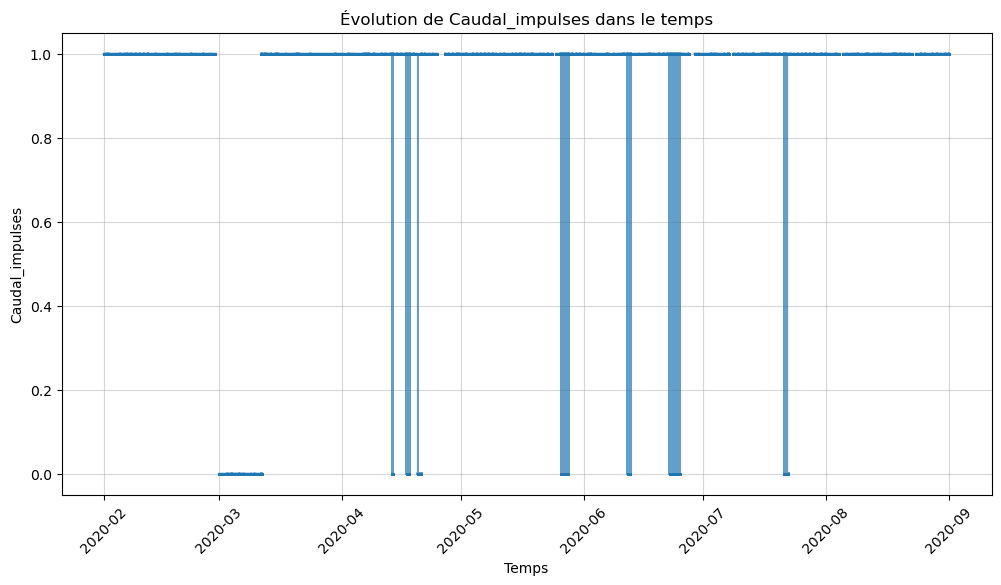

In [20]:
# Visualisation des séries temporelles 

# Variables continues à tracer
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df[col], marker='.', linestyle='-', markersize=2, alpha=0.7)
    plt.title(f"Évolution de {col} dans le temps")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    plt.show()


C:\Users\usermine\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


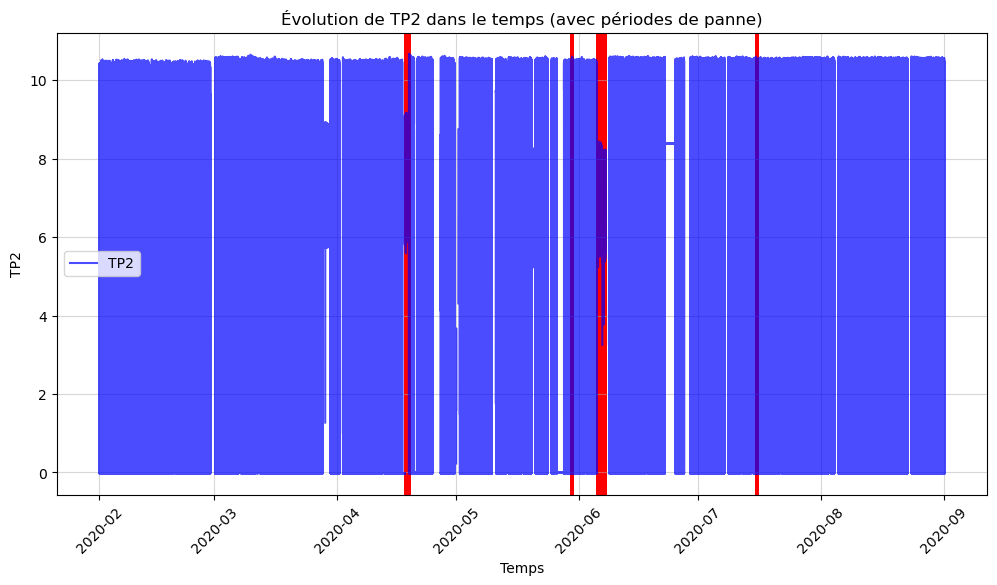

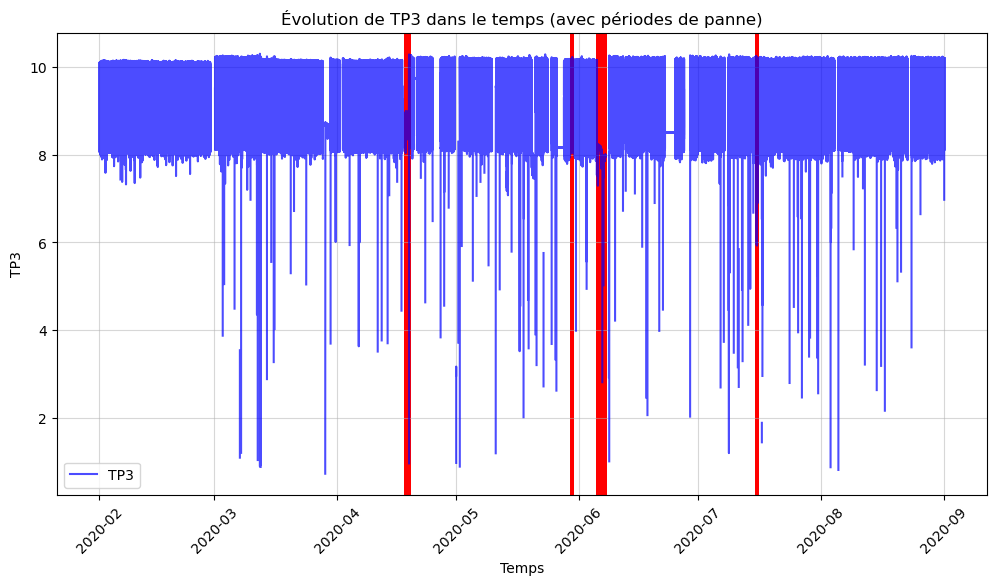

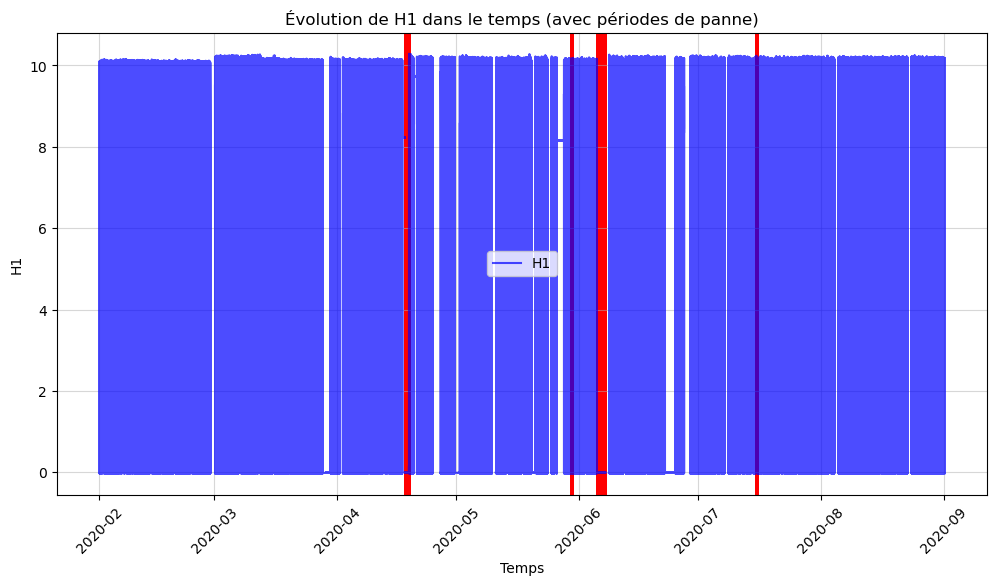

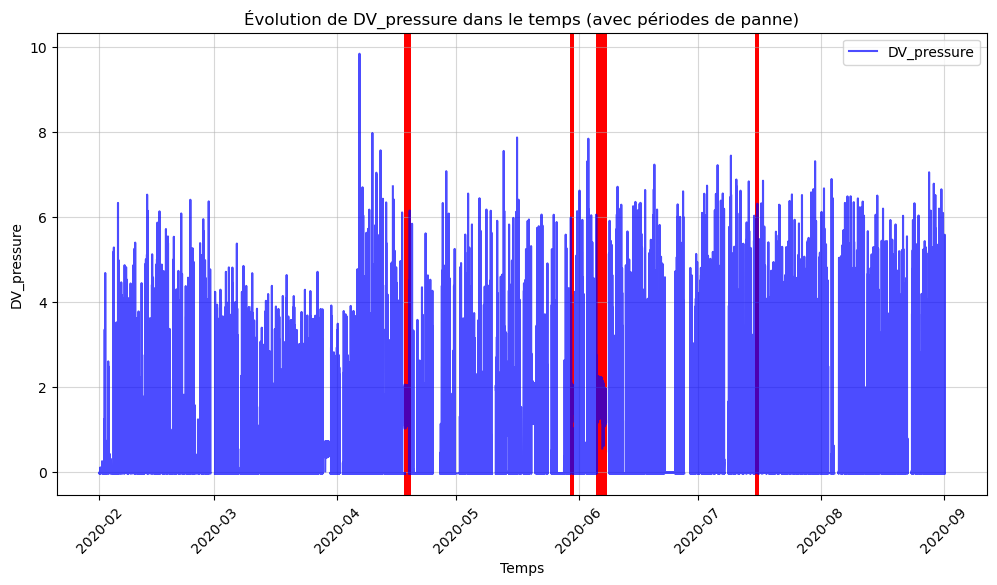

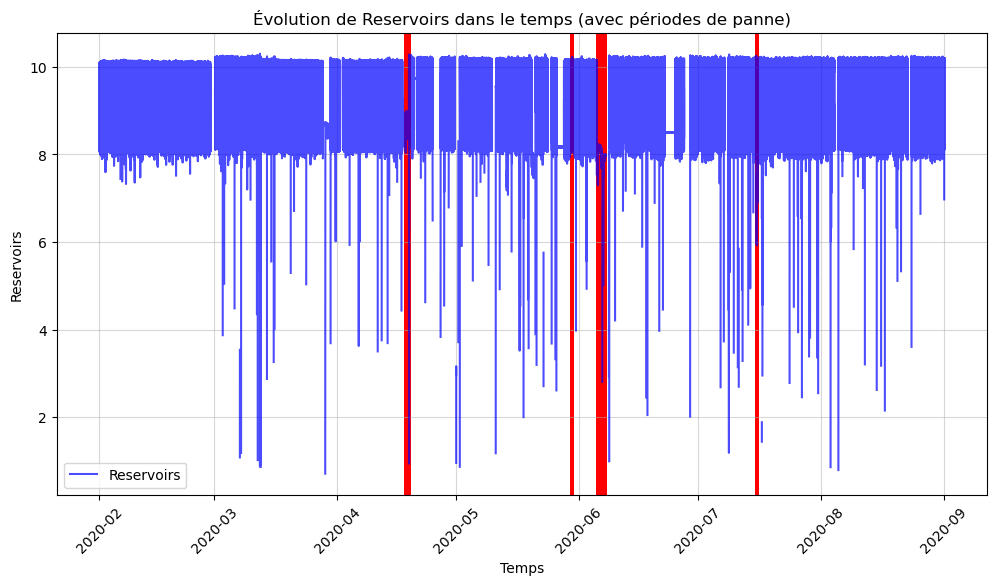

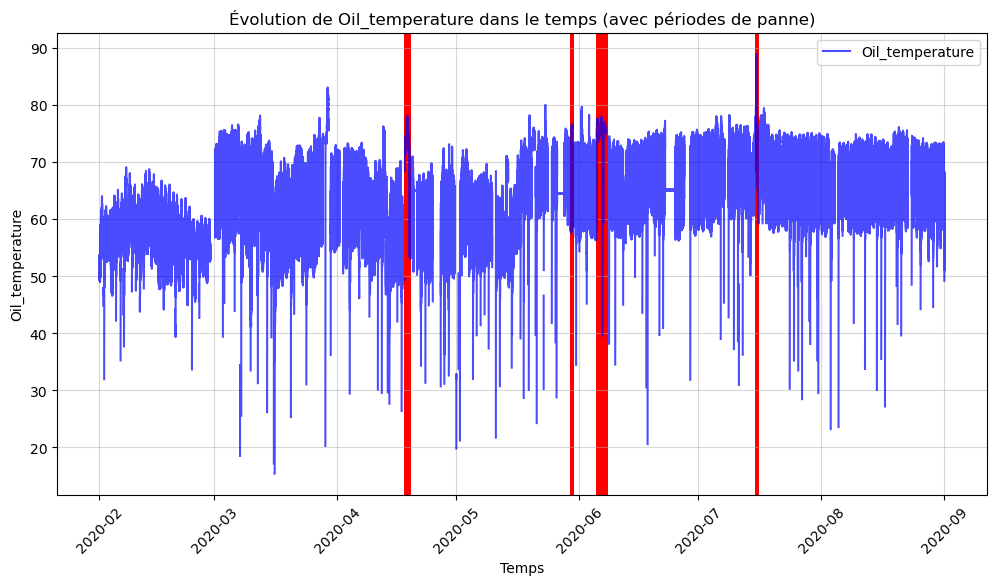

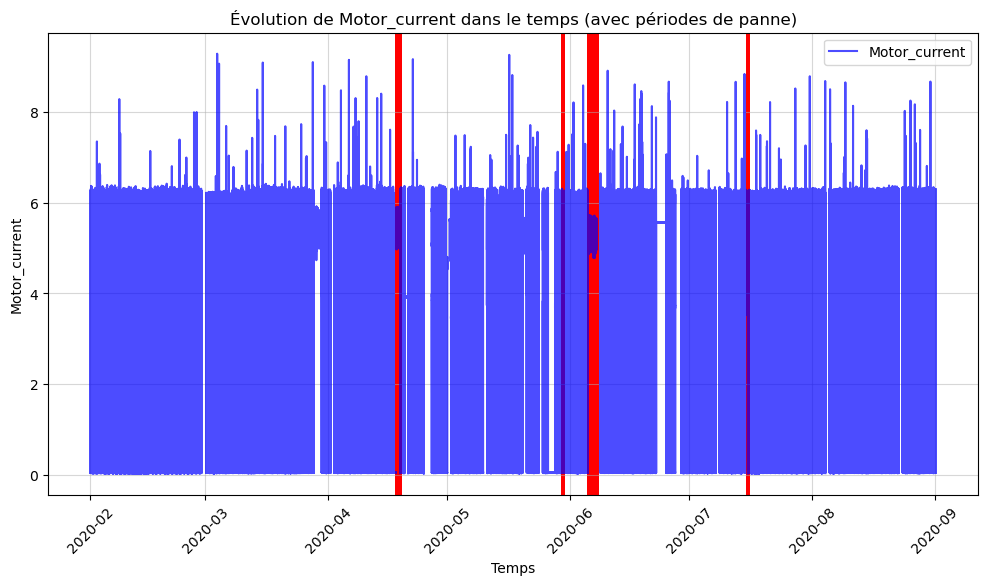

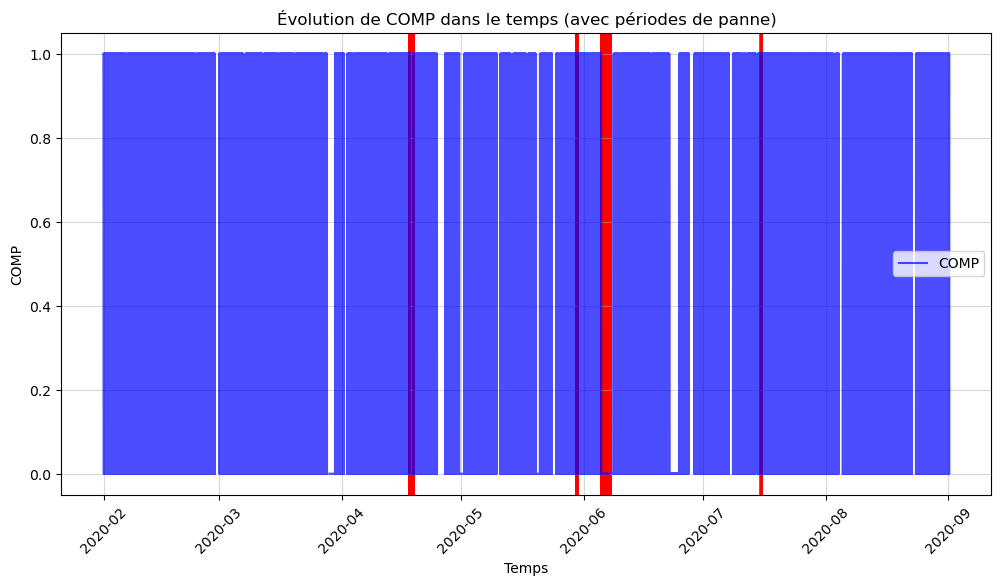

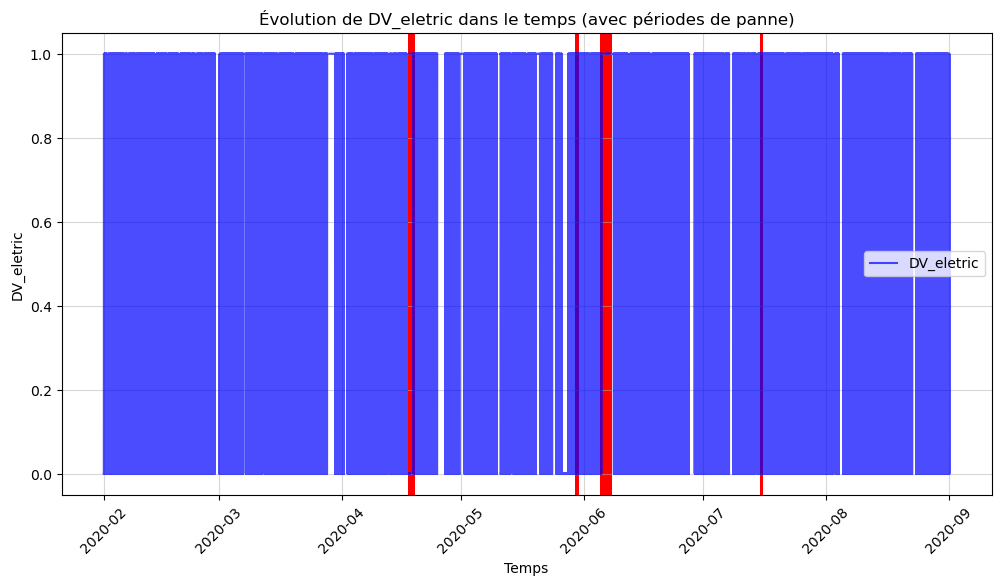

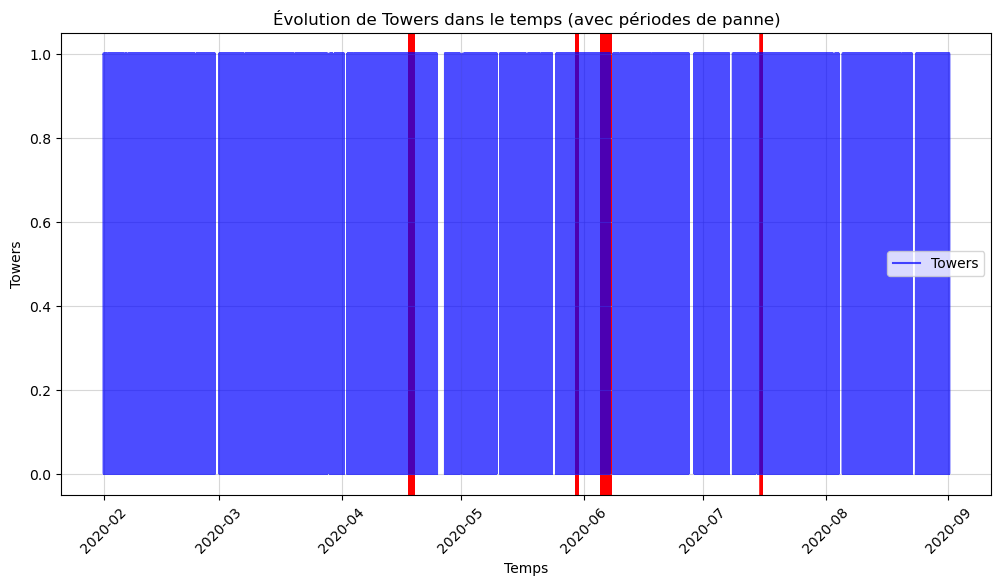

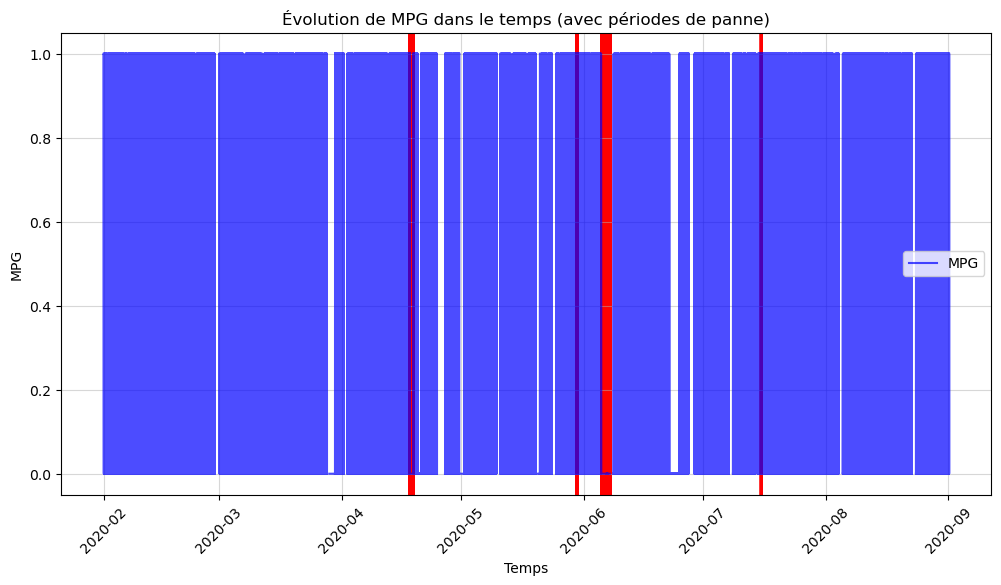

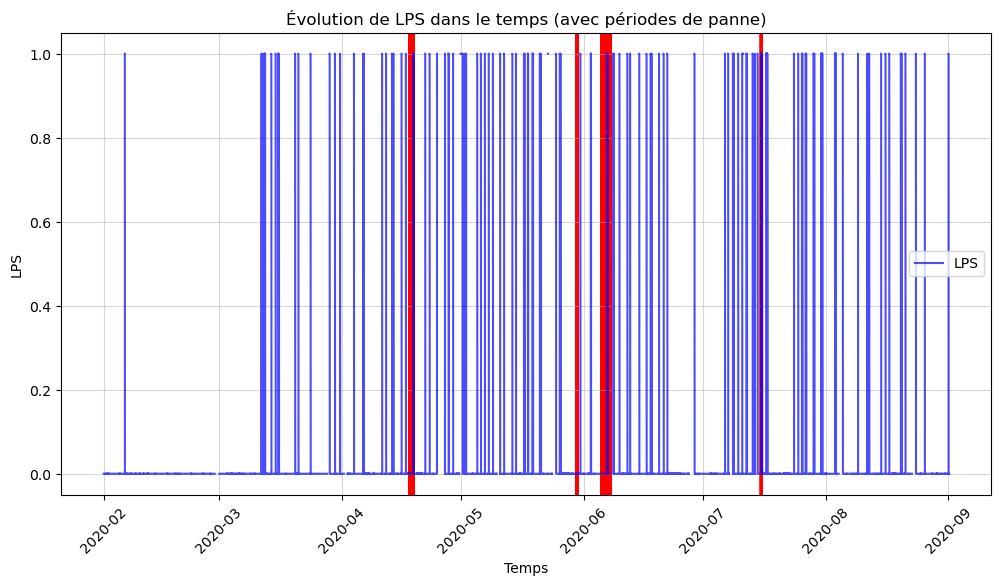

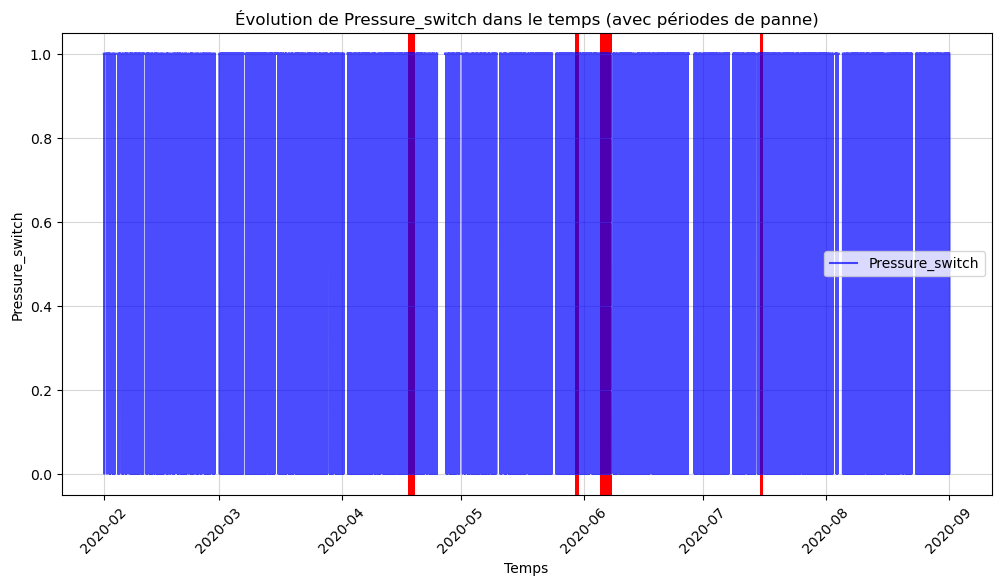

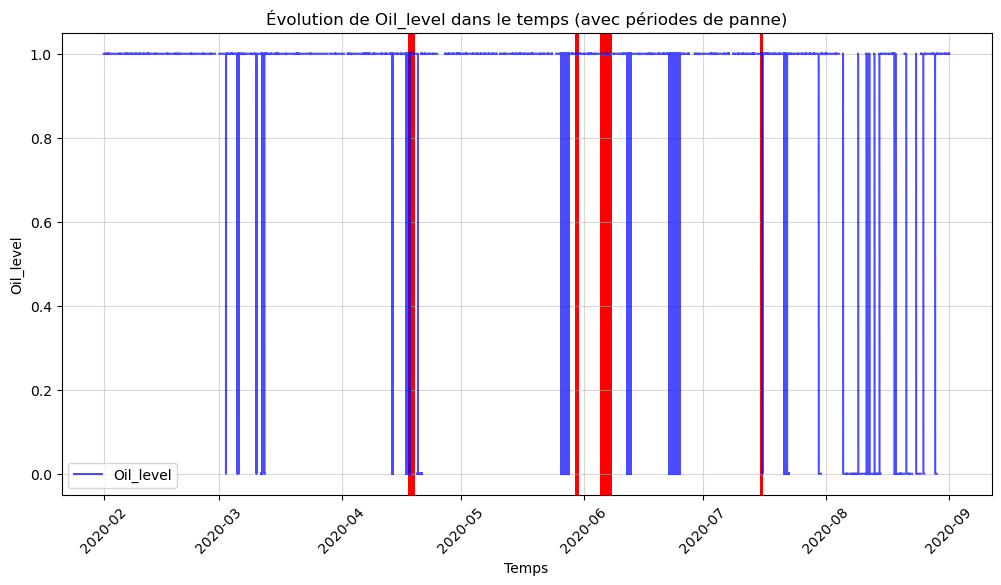

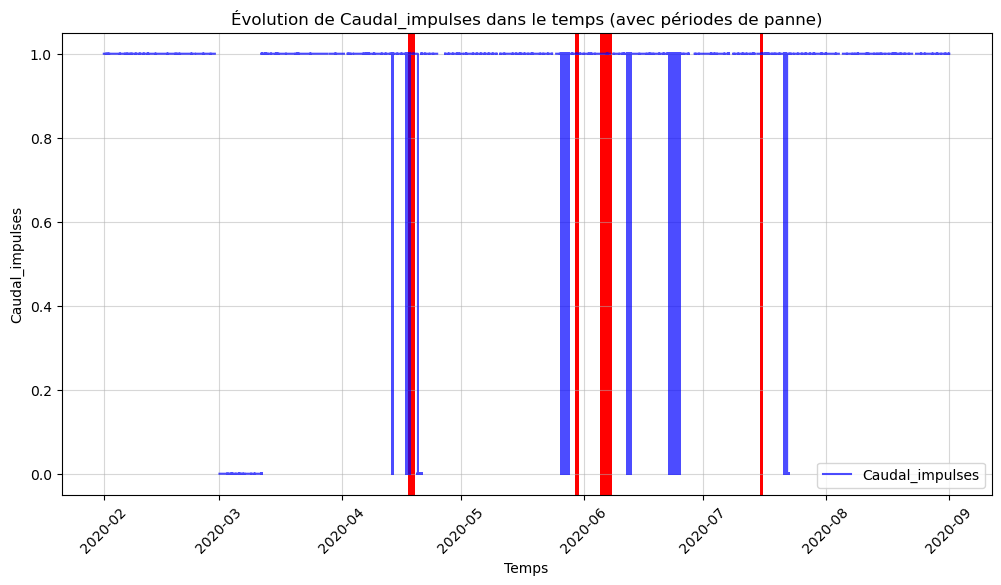

In [13]:
# Visualiser les tendances de chaque variable numérique par rapport au temps et a l'intervalle de la panne

for col in df.columns[1:-1]:  # Exclure 'Panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer les valeurs de la variable
    plt.plot(df['timestamp'], df[col], label=col, color='blue', alpha=0.7)
    
    # Ajouter des zones colorées pour les périodes de panne
    for i in range(len(df)):
        if df.loc[i, 'panne'] == 1:
            plt.axvspan(df.loc[i, 'timestamp'], df.loc[i, 'timestamp'], color='red', alpha=0.3)
    
    # Ajouter des labels et une légende
    plt.title(f"Évolution de {col} dans le temps (avec périodes de panne)")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


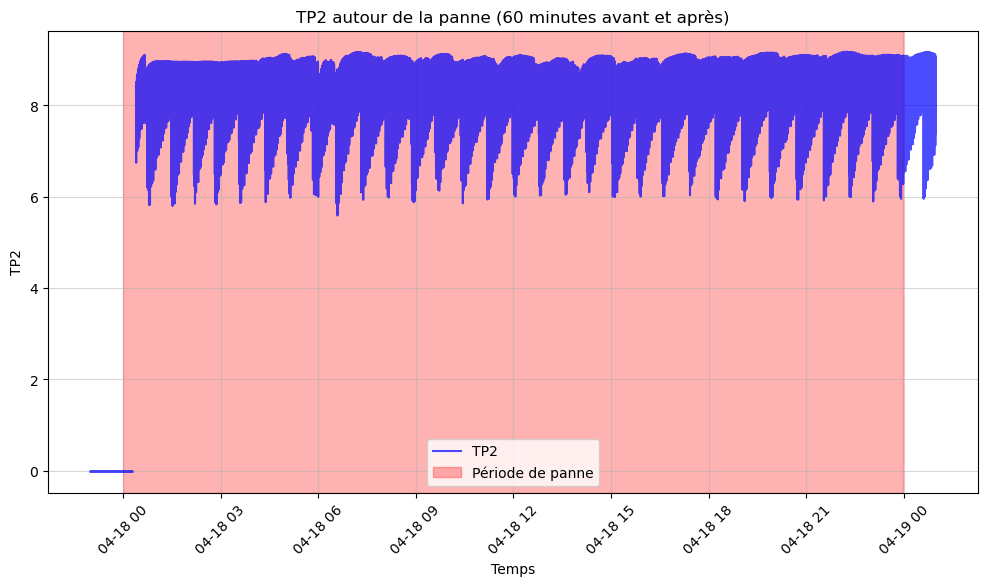

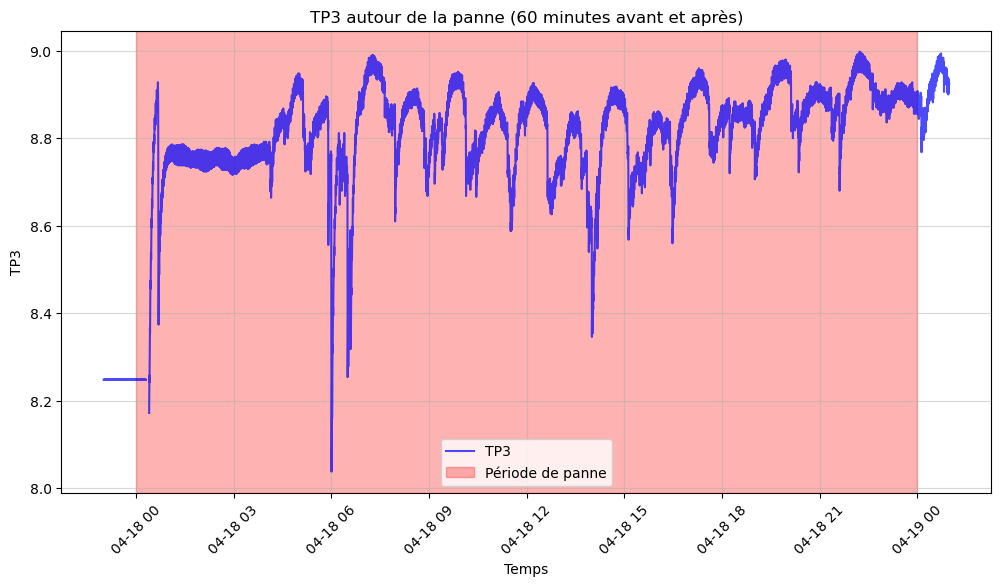

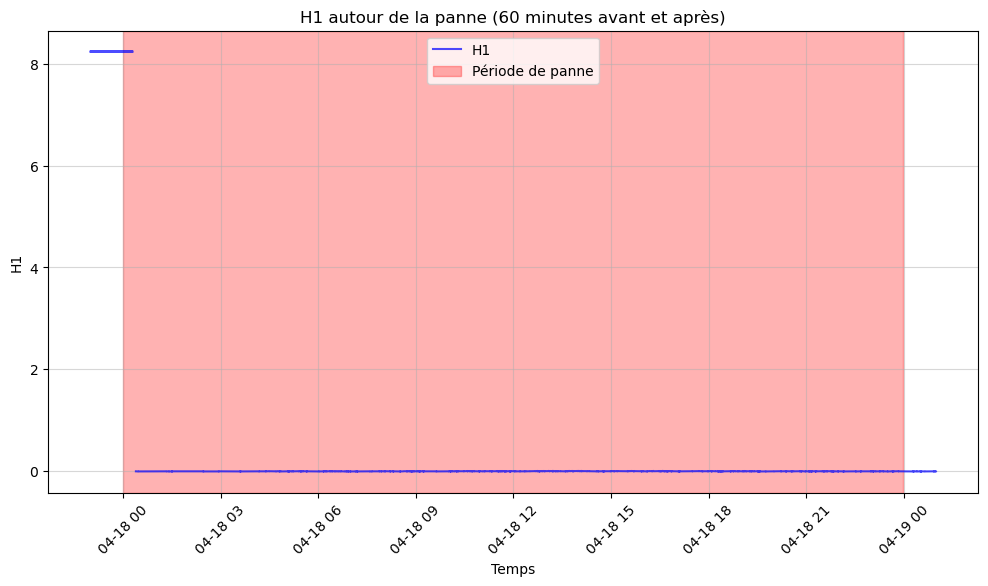

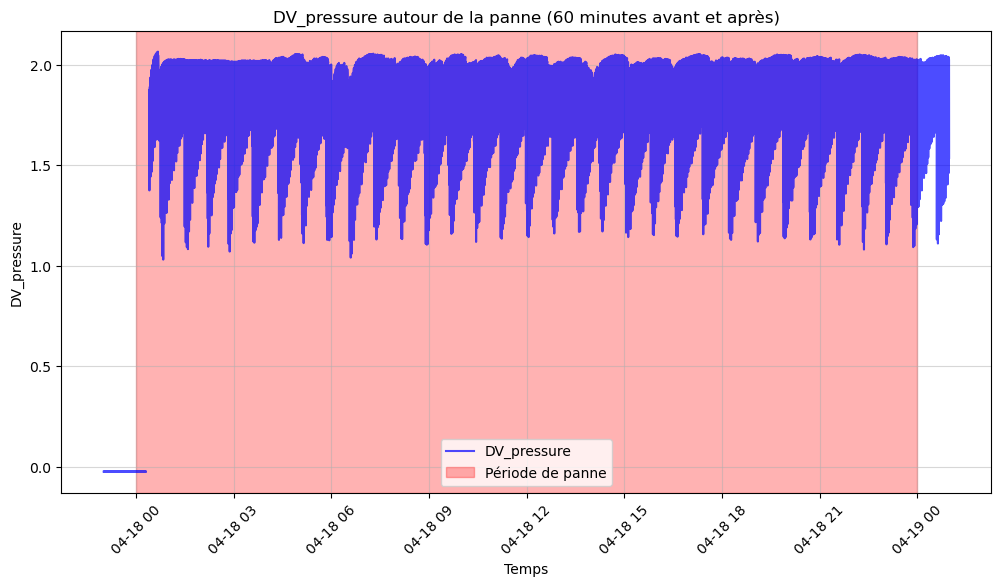

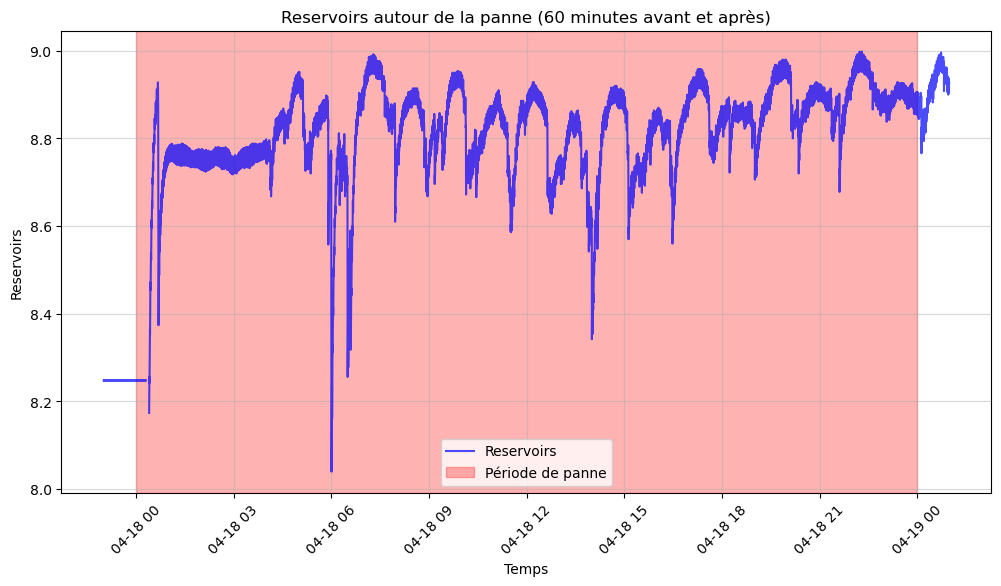

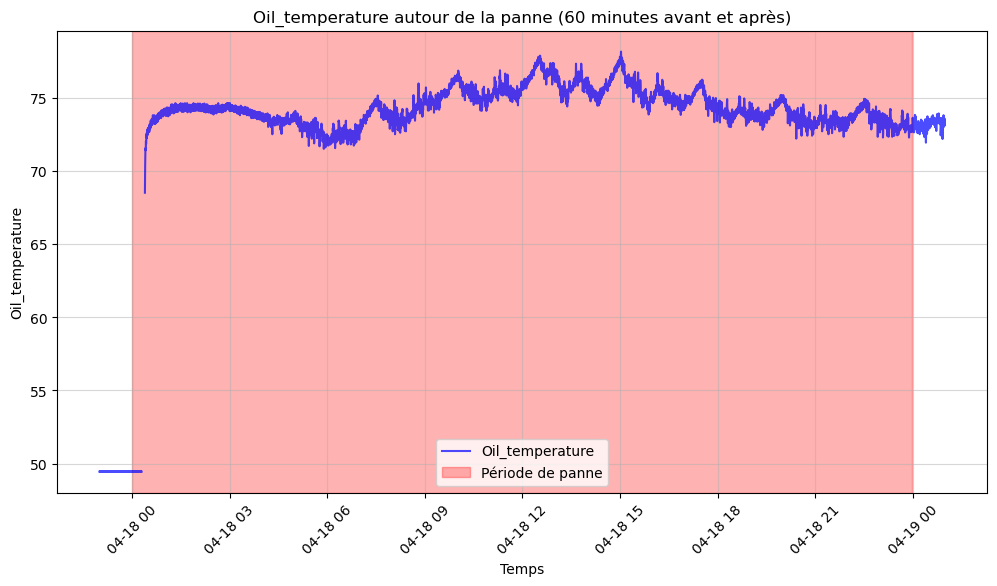

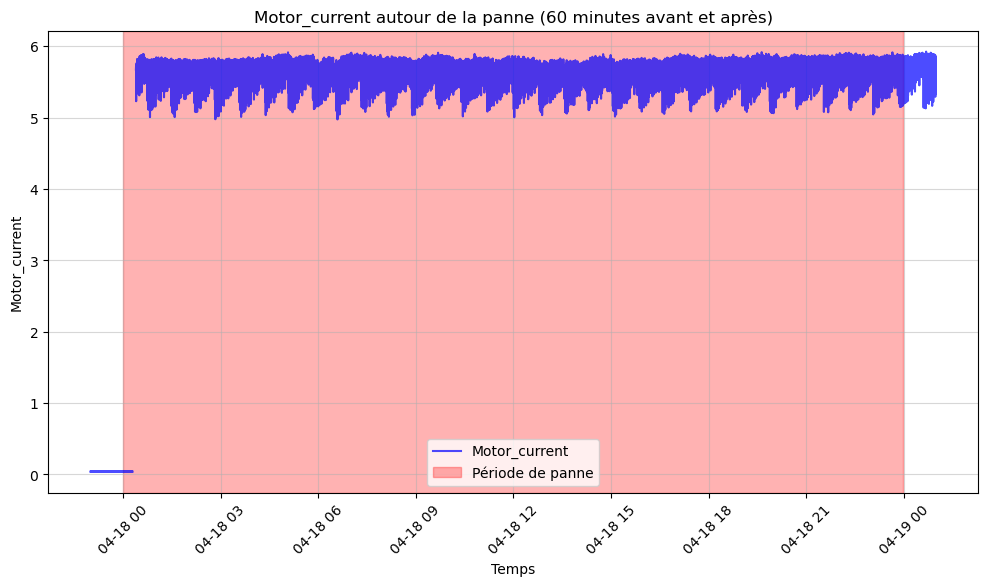

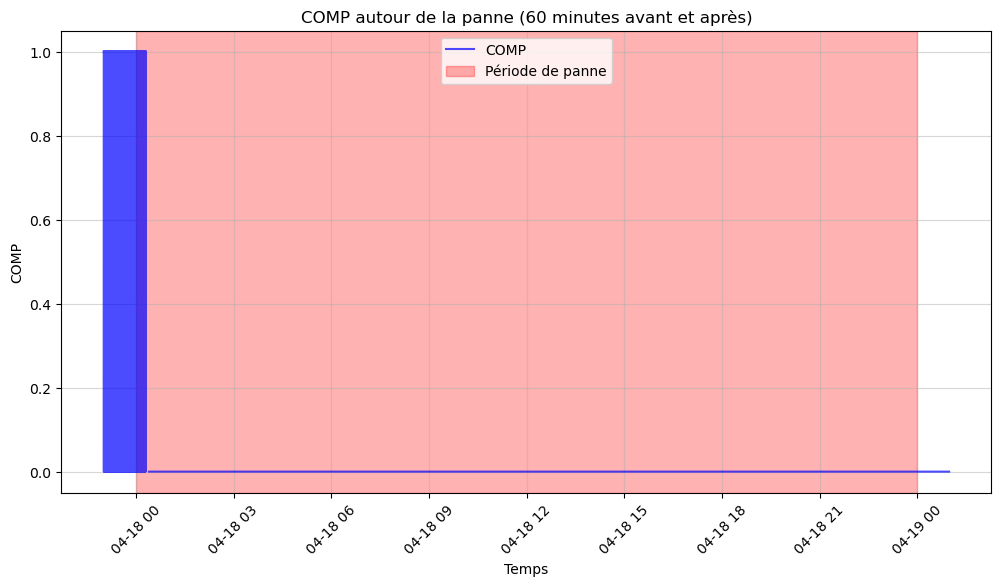

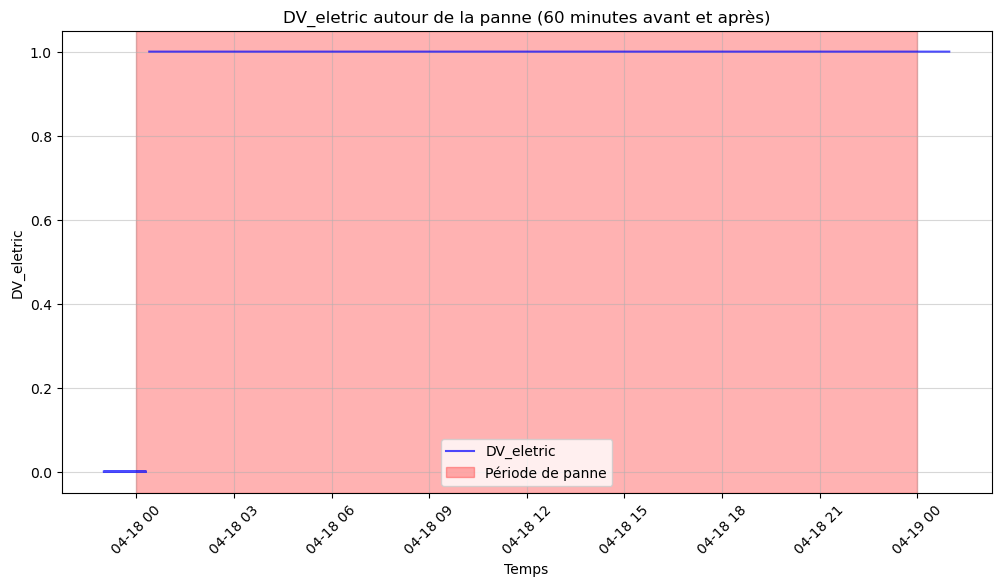

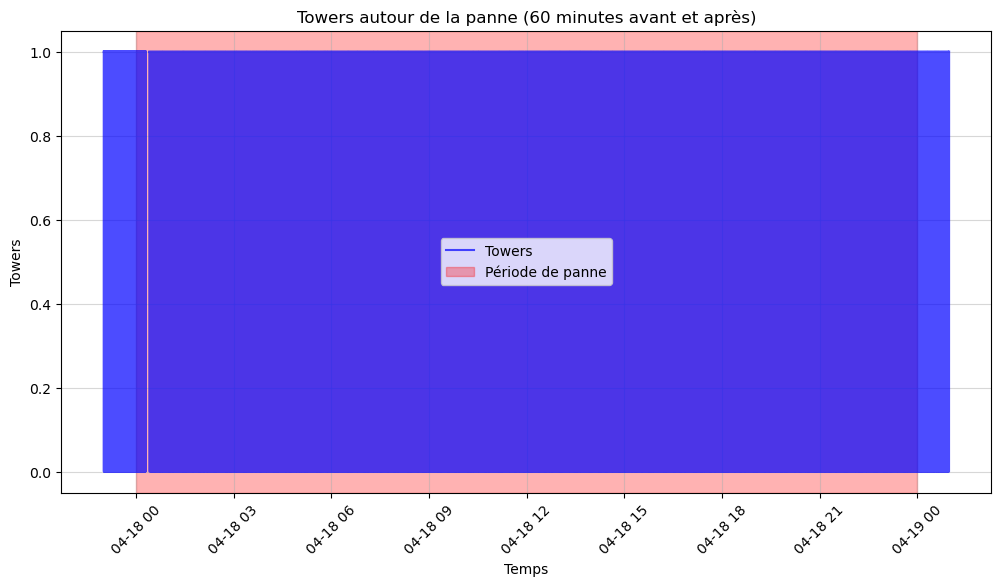

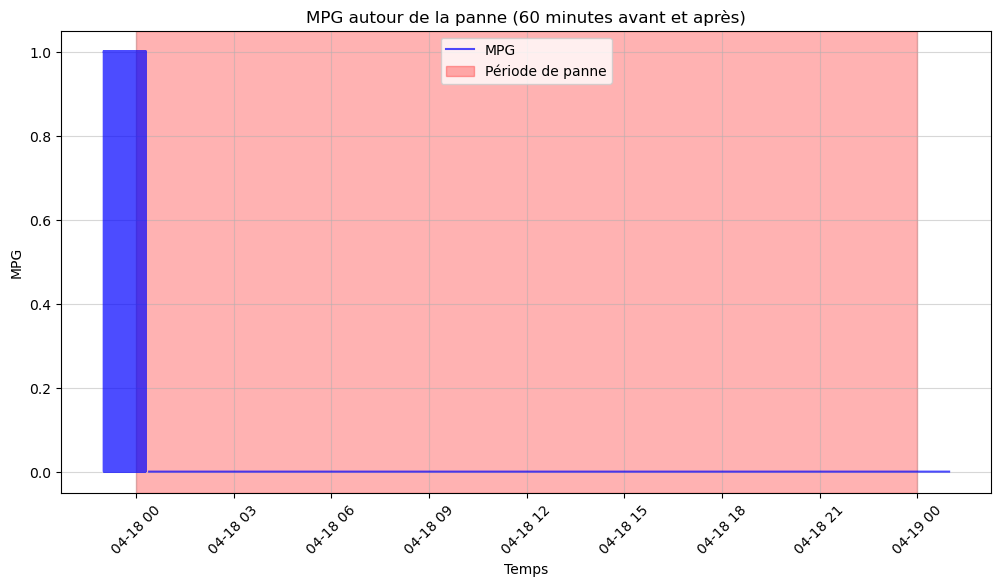

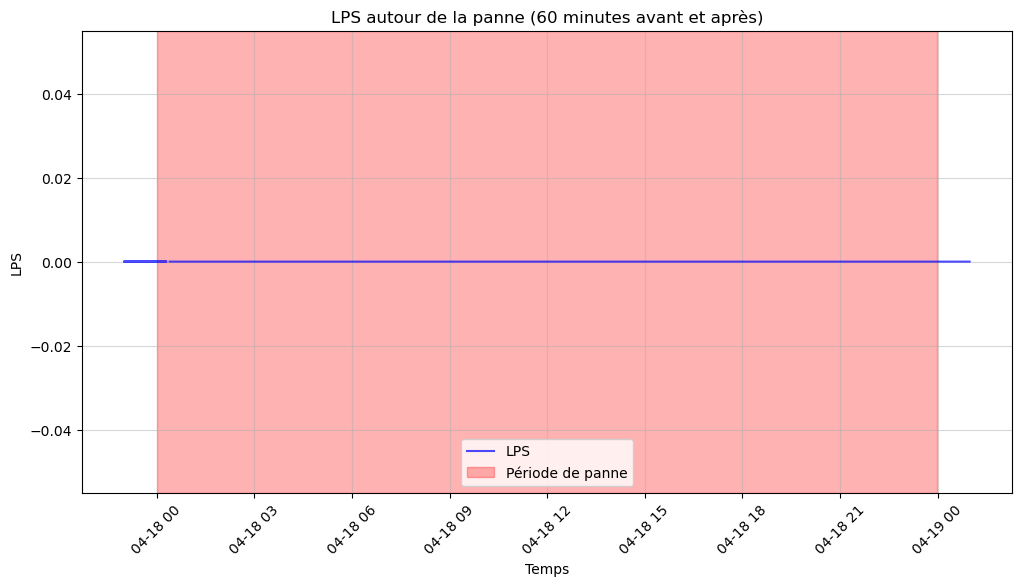

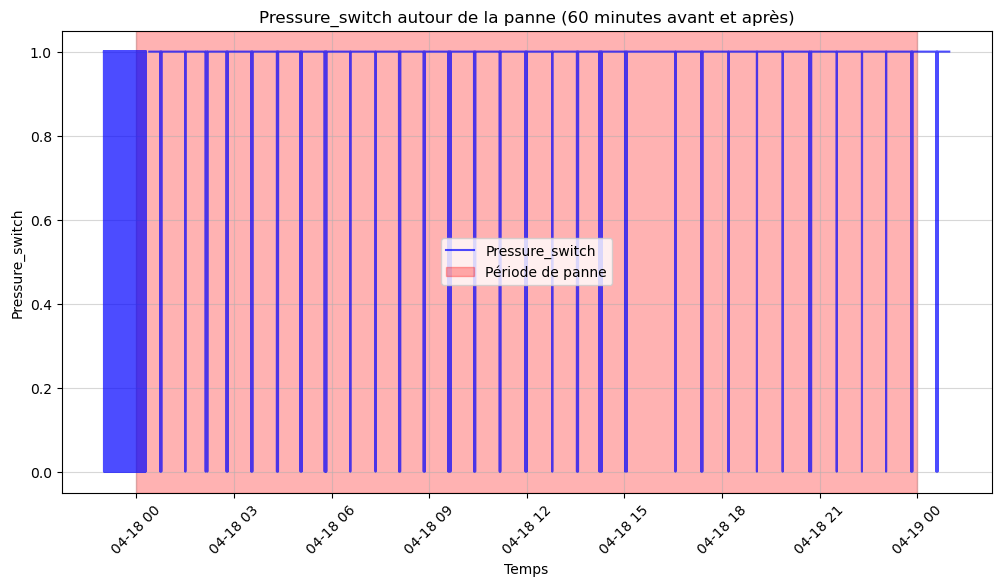

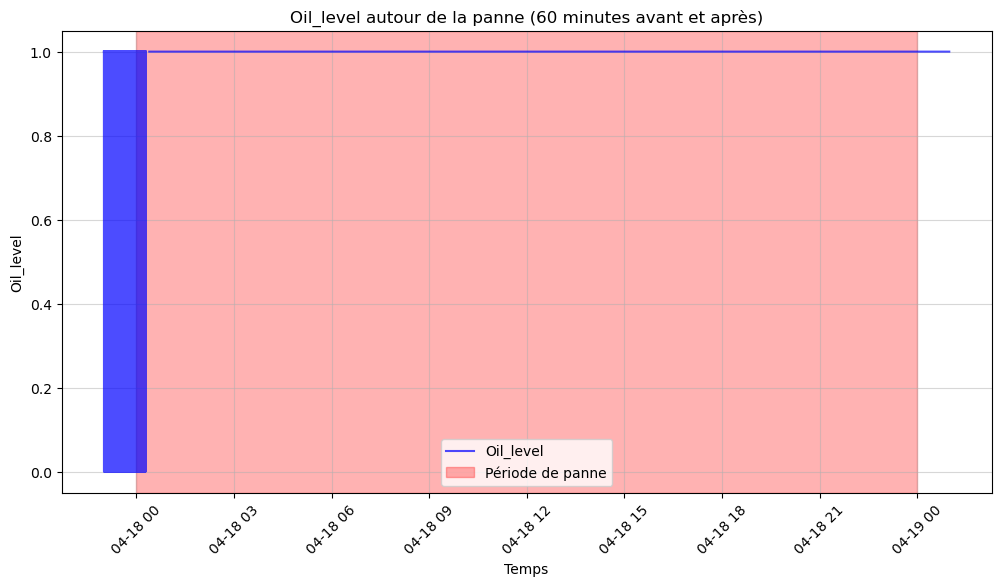

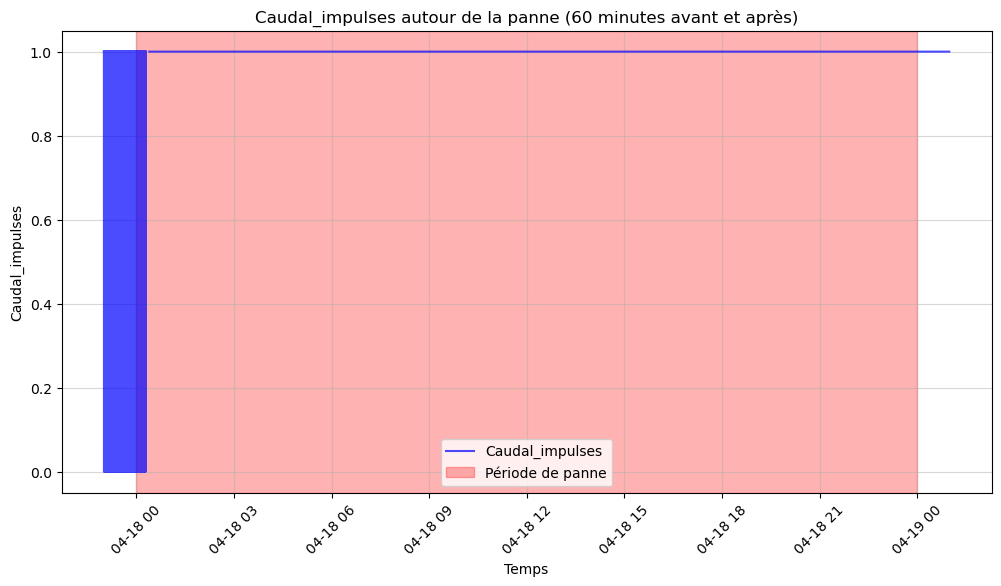

In [15]:
##########################
### Zoom sur la panne1 ###
##########################

# Panne 1
# Définir la panne spécifique
panne_start = pd.Timestamp('2020-04-18 00:00')
panne_end   = pd.Timestamp('2020-04-18 23:59')


# Définir une fenêtre de 60 minutes avant et après
window_start = panne_start - pd.Timedelta(minutes=60)
window_end = panne_end + pd.Timedelta(minutes=60)

# Filtrer les données dans cette fenêtre
window_data = df[(df['timestamp'] >= window_start) & (df['timestamp'] <= window_end)]

# Visualiser les variables continues
for col in df.columns[1:-1]:  # Exclure 'timestamp' et 'panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer la série temporelle
    plt.plot(window_data['timestamp'], window_data[col], label=col, color='blue', alpha=0.7)
    
    # Mettre en évidence la panne
    plt.axvspan(panne_start, panne_end, color='red', alpha=0.3, label='Période de panne')
    
    # Ajouter des labels et une légende
    plt.title(f"{col} autour de la panne (60 minutes avant et après)")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


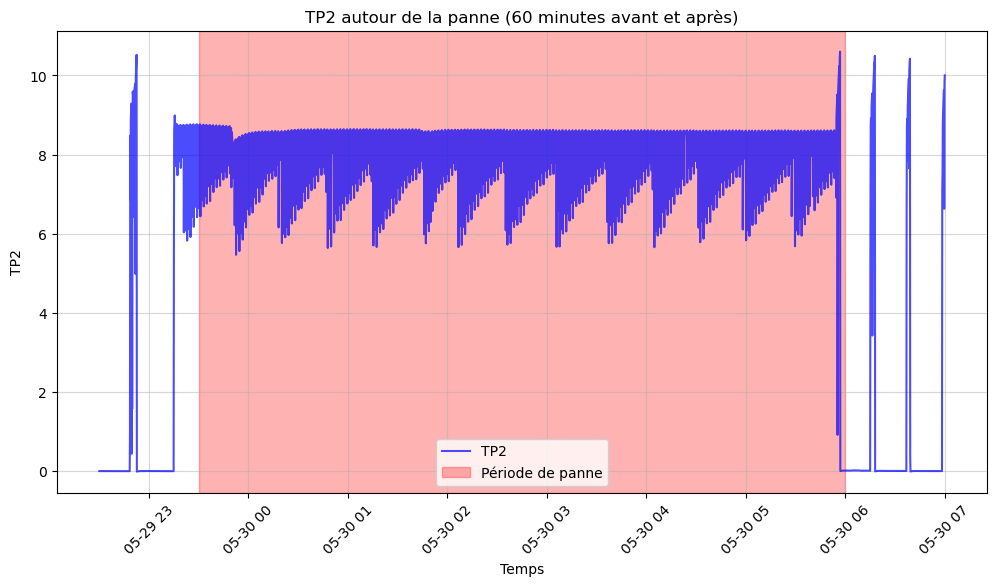

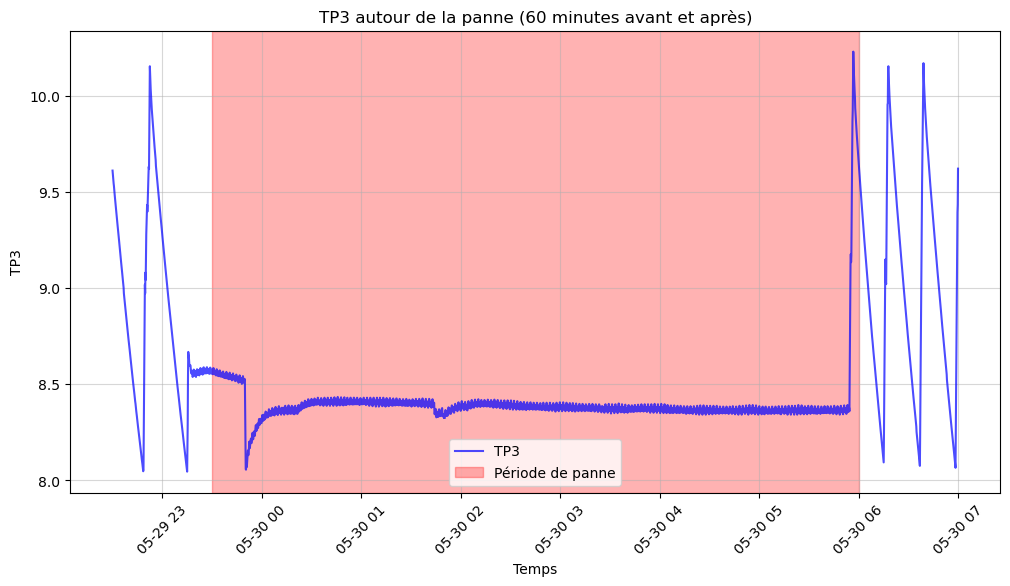

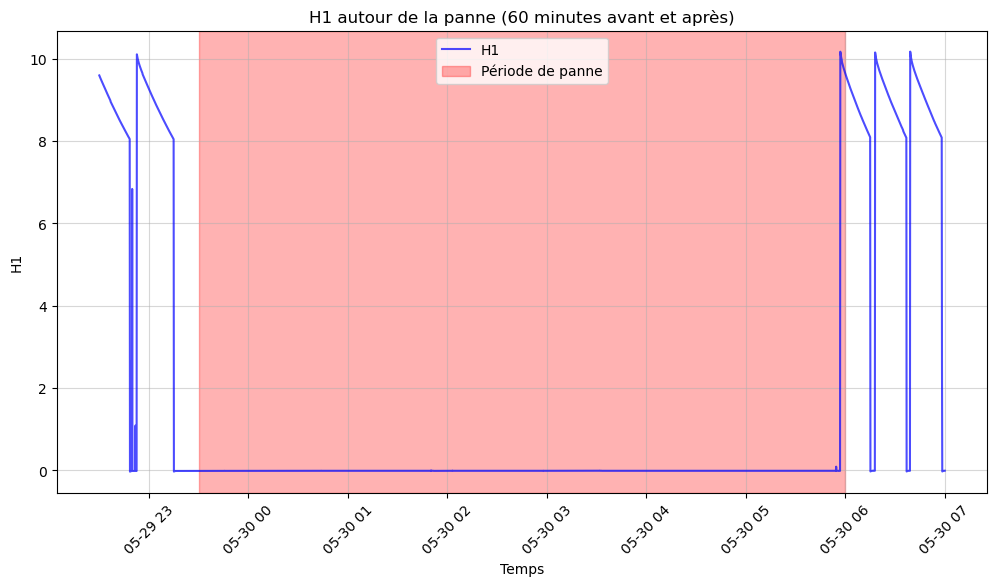

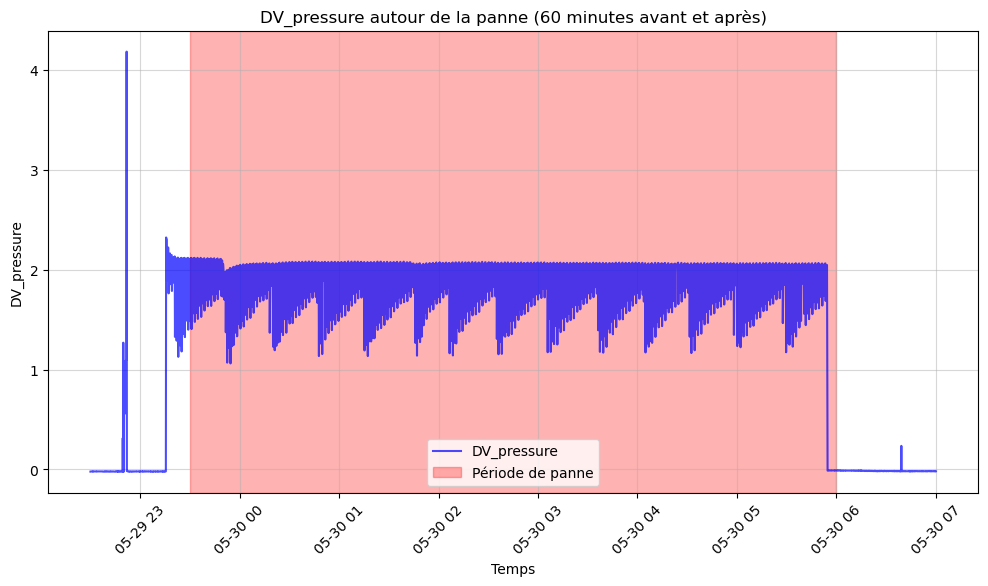

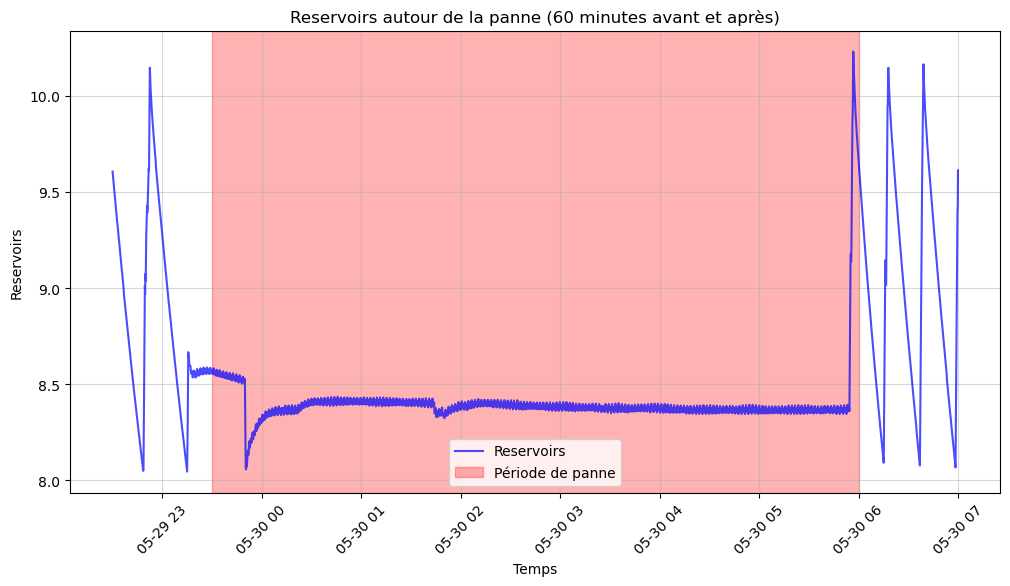

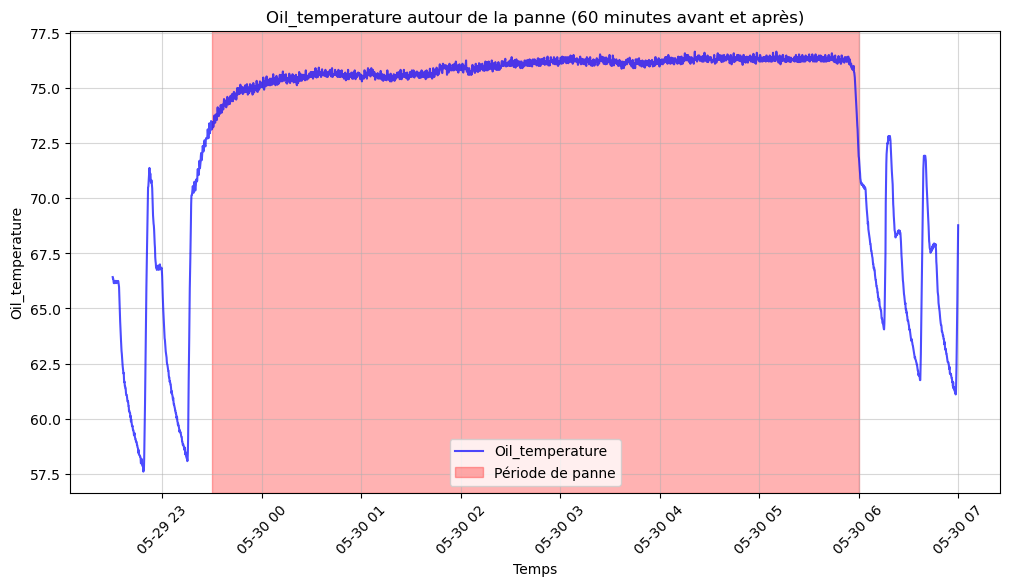

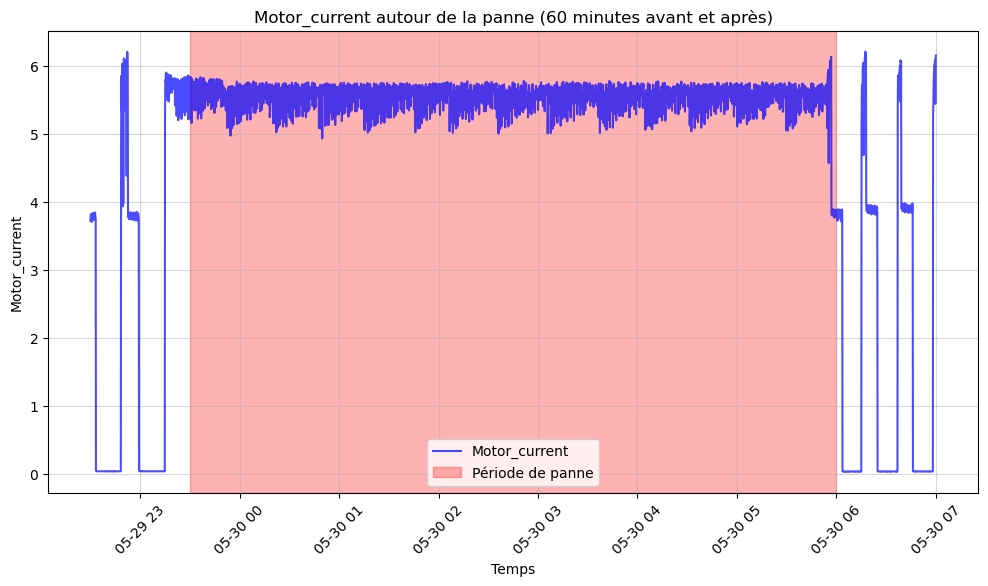

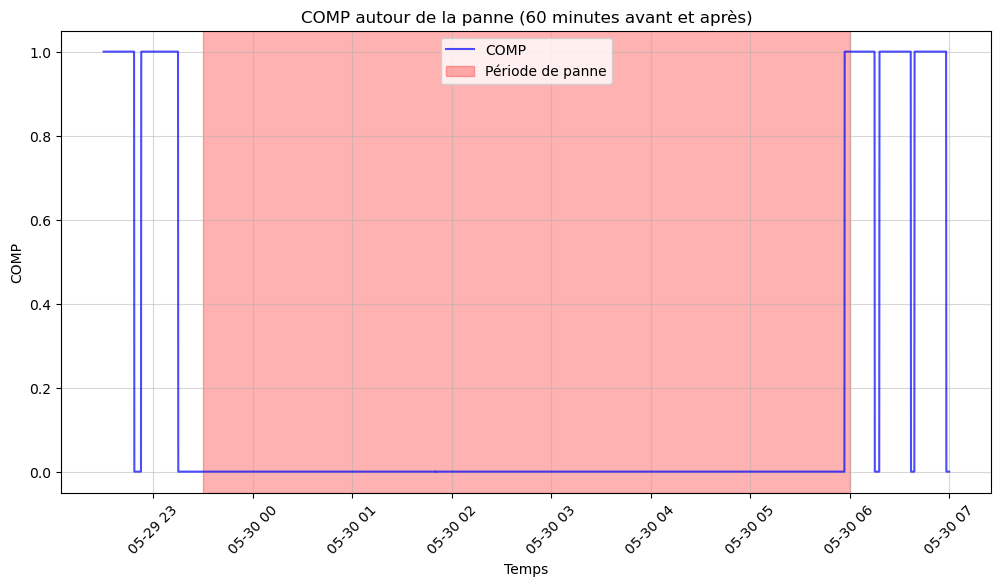

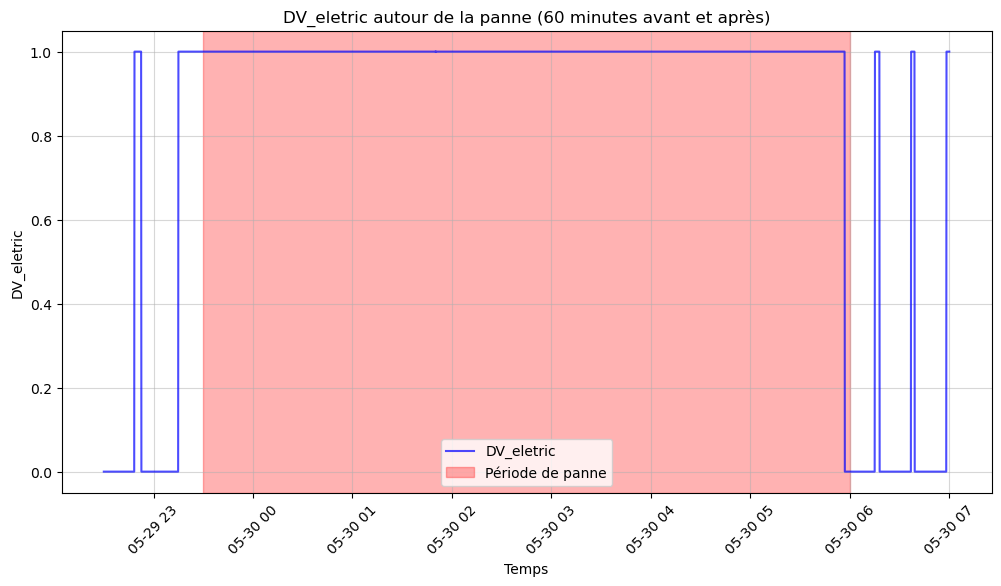

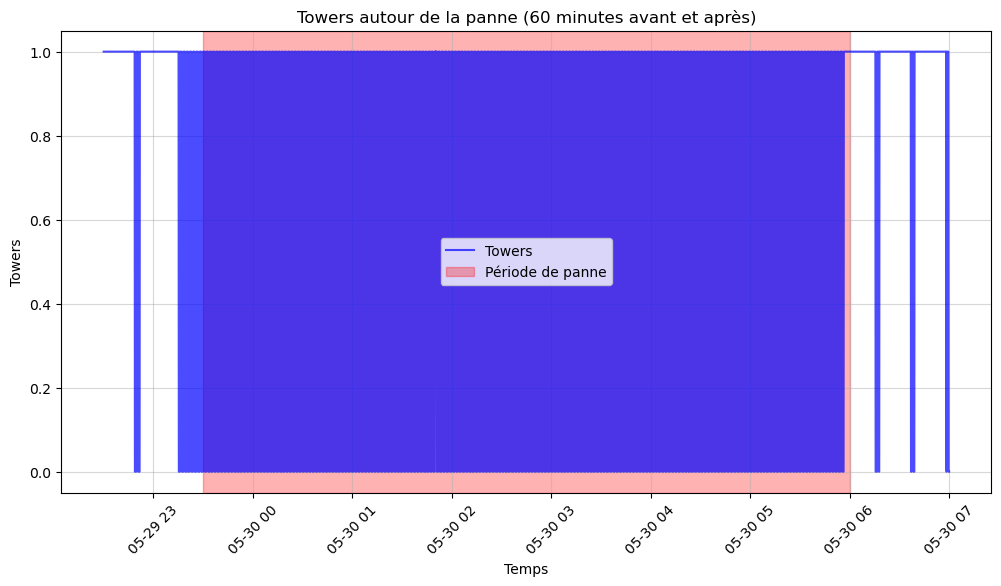

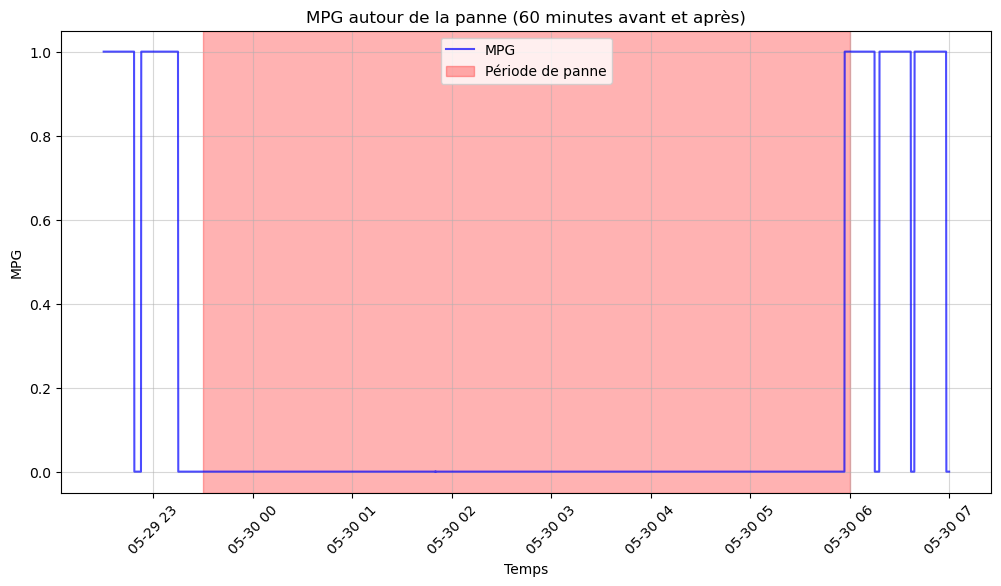

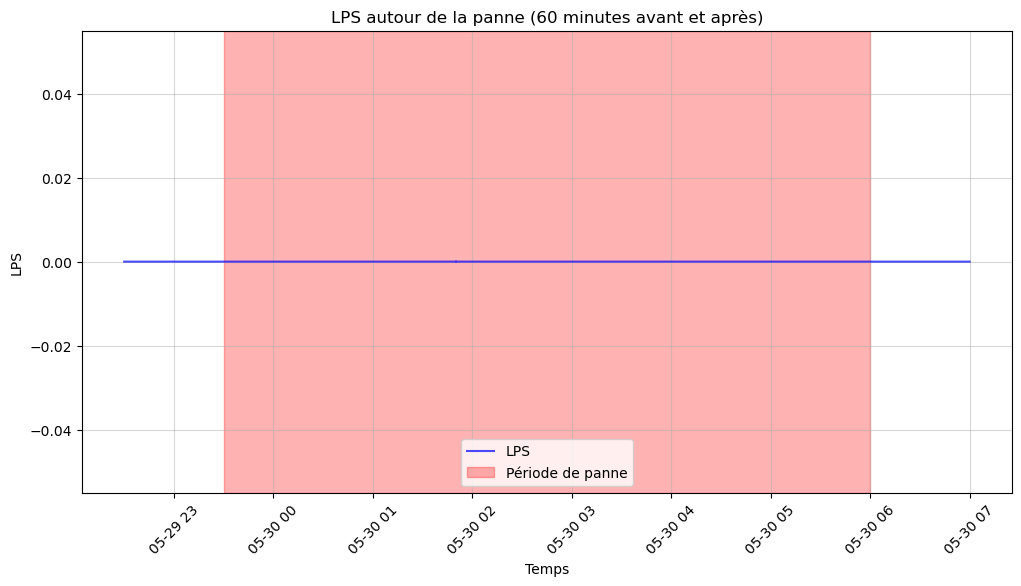

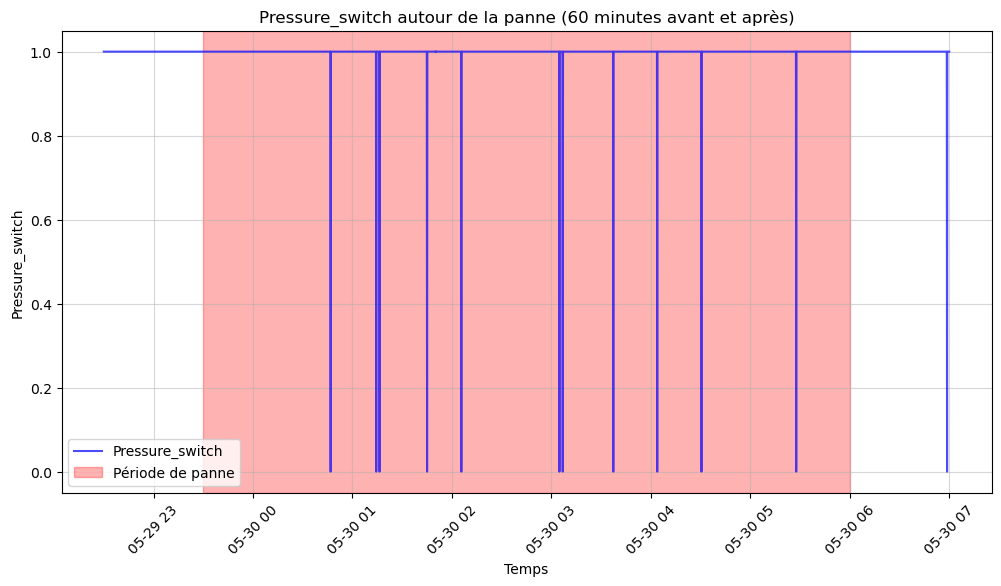

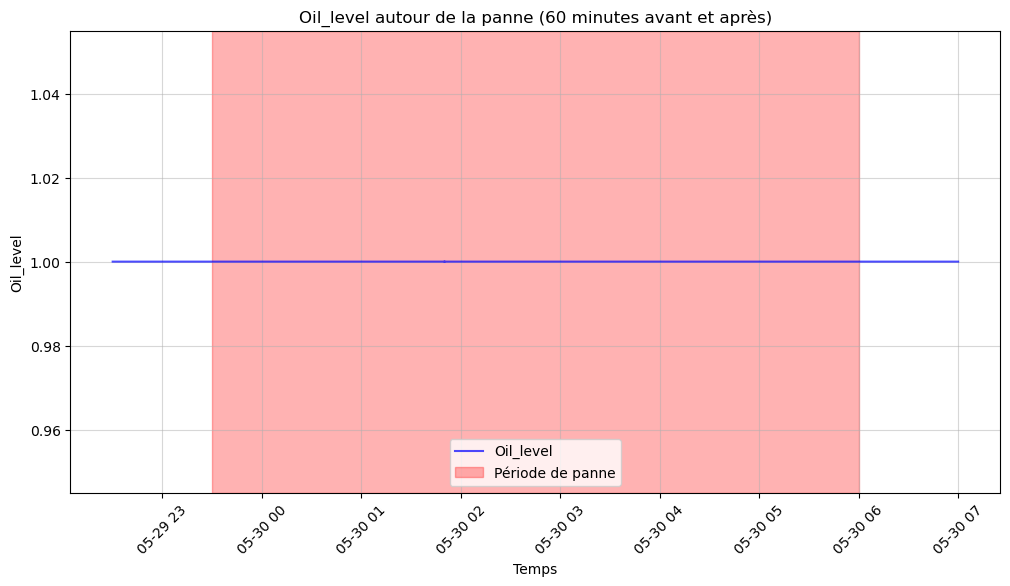

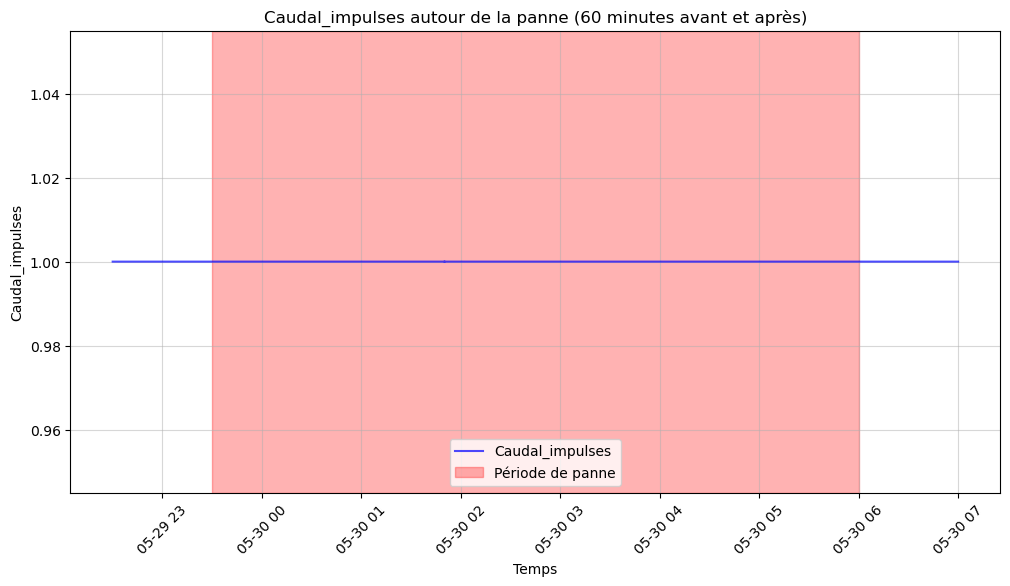

In [16]:
##########################
### Zoom sur la panne2 ###
##########################

# Définir la panne spécifique
panne_start = pd.Timestamp('2020-05-29 23:30')
panne_end   = pd.Timestamp('2020-05-30 06:00')


# Définir une fenêtre de 60 minutes avant et après
window_start = panne_start - pd.Timedelta(minutes=60)
window_end = panne_end + pd.Timedelta(minutes=60)

# Filtrer les données dans cette fenêtre
window_data = df[(df['timestamp'] >= window_start) & (df['timestamp'] <= window_end)]

# Visualiser les variables continues
for col in df.columns[1:-1]:  # Exclure 'timestamp' et 'panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer la série temporelle
    plt.plot(window_data['timestamp'], window_data[col], label=col, color='blue', alpha=0.7)
    
    # Mettre en évidence la panne
    plt.axvspan(panne_start, panne_end, color='red', alpha=0.3, label='Période de panne')
    
    # Ajouter des labels et une légende
    plt.title(f"{col} autour de la panne (60 minutes avant et après)")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

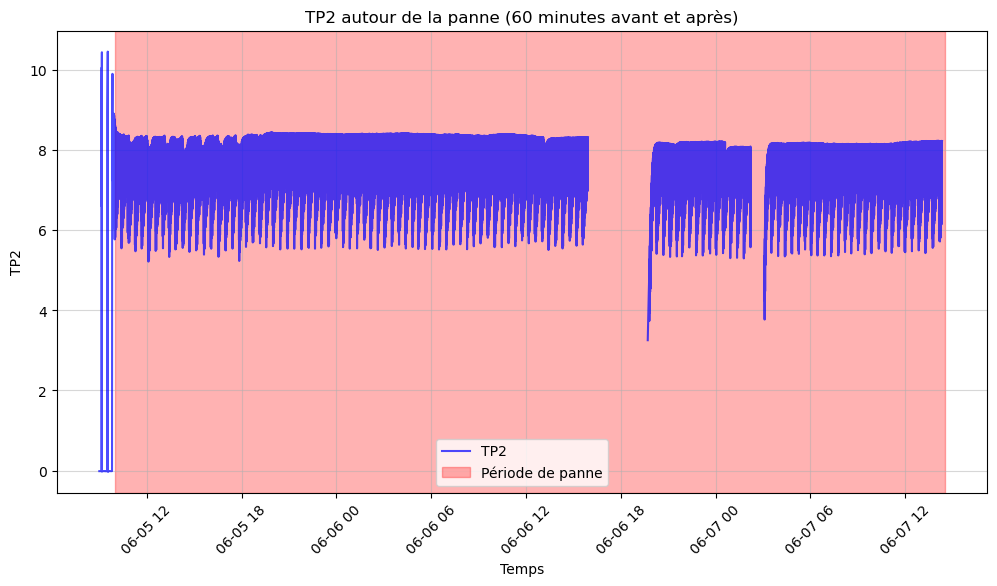

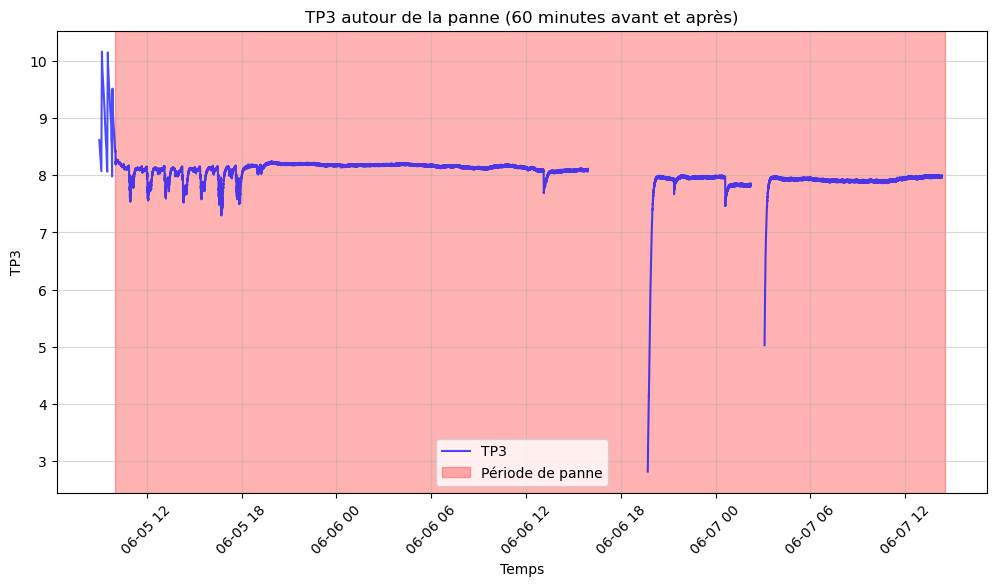

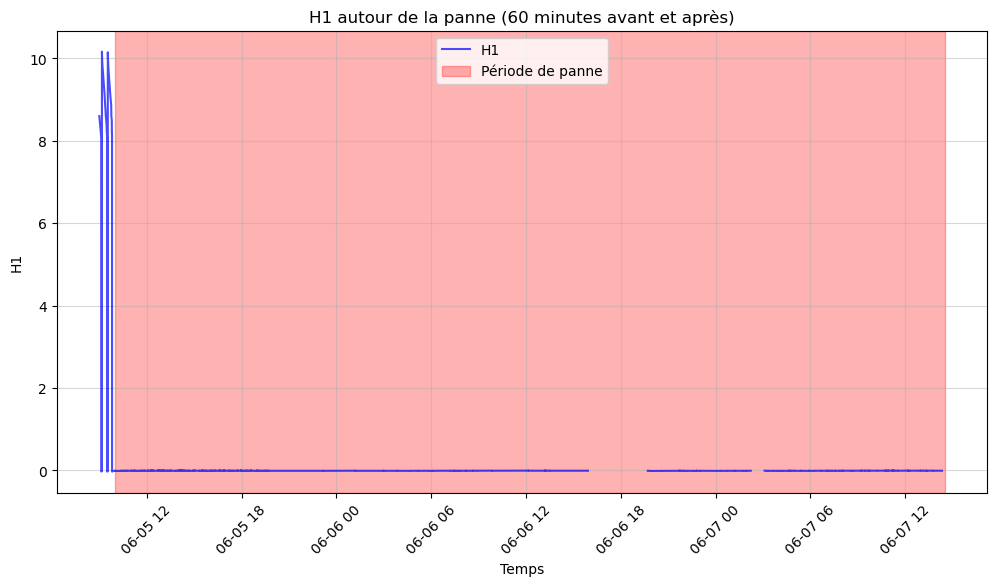

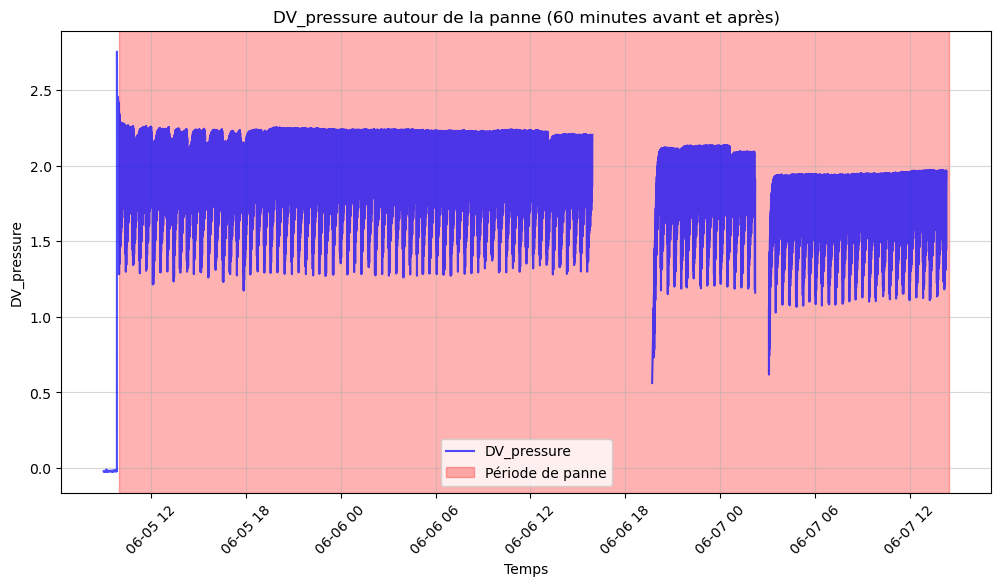

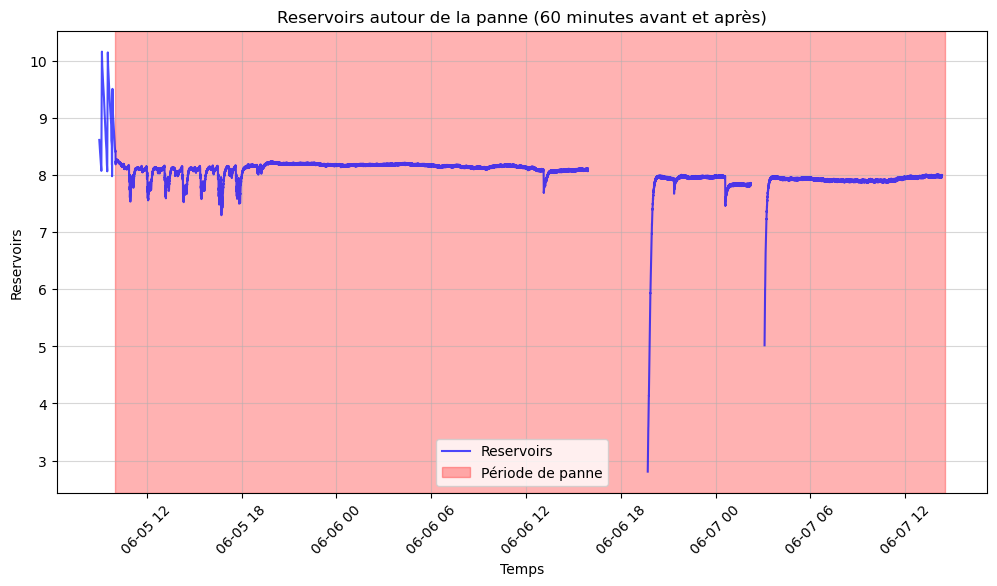

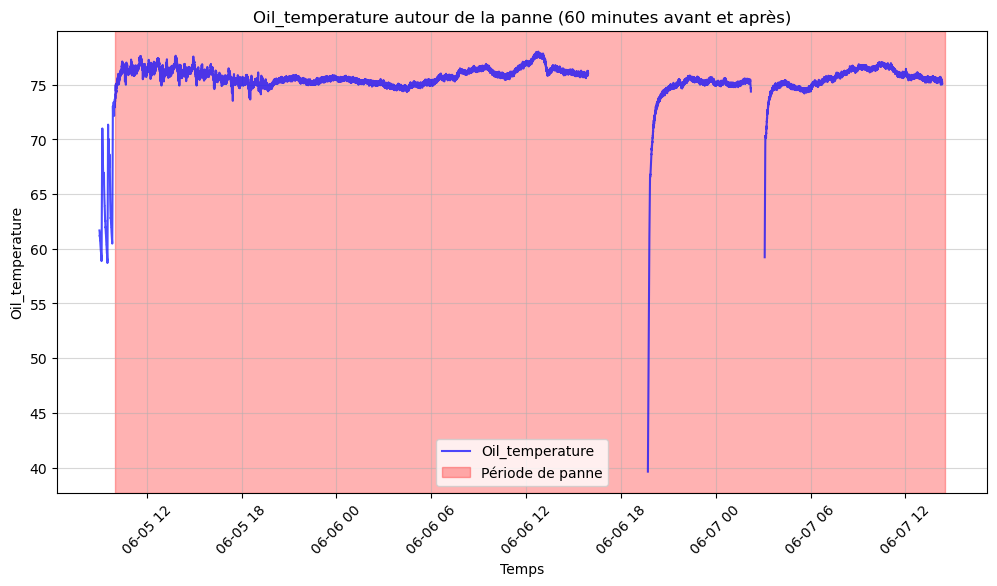

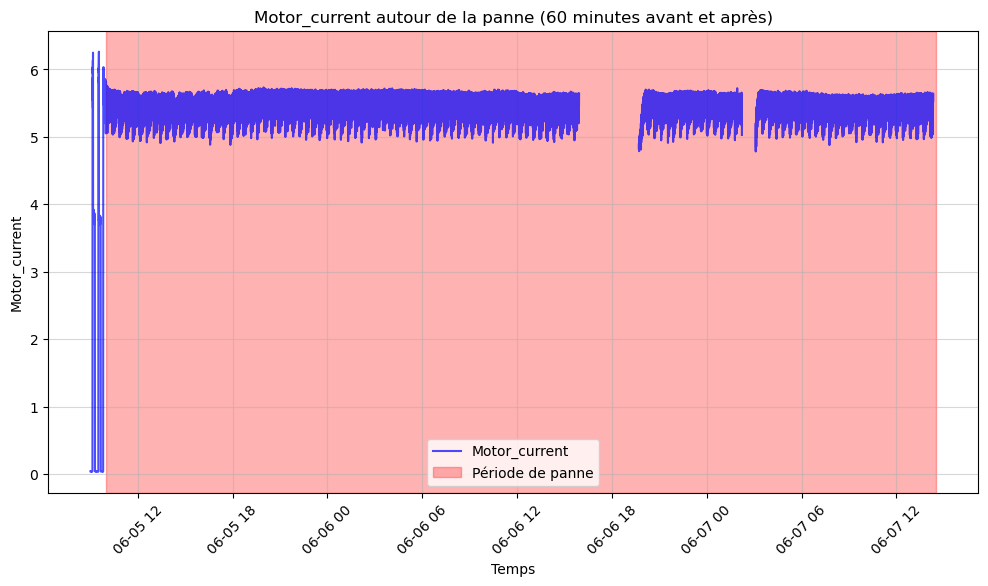

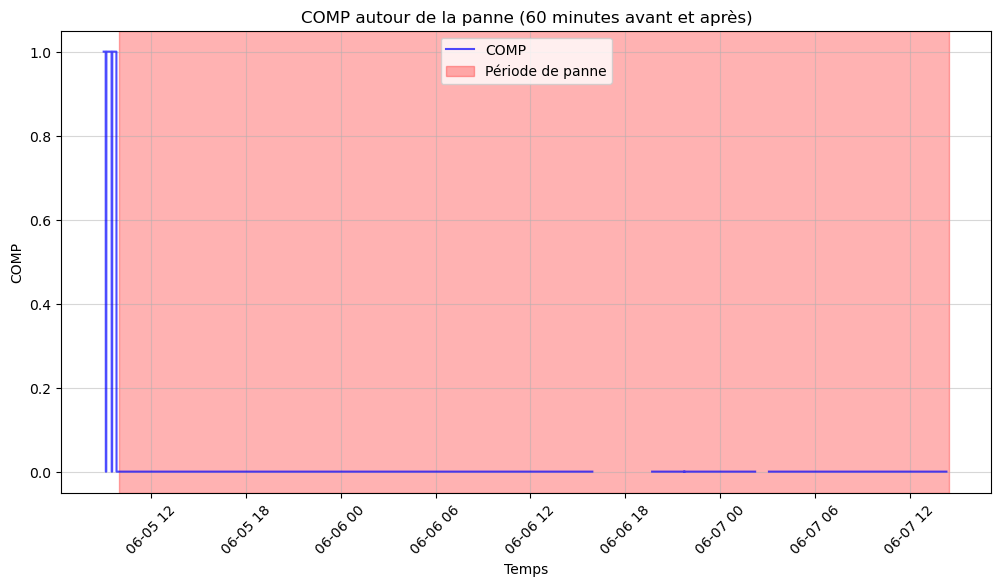

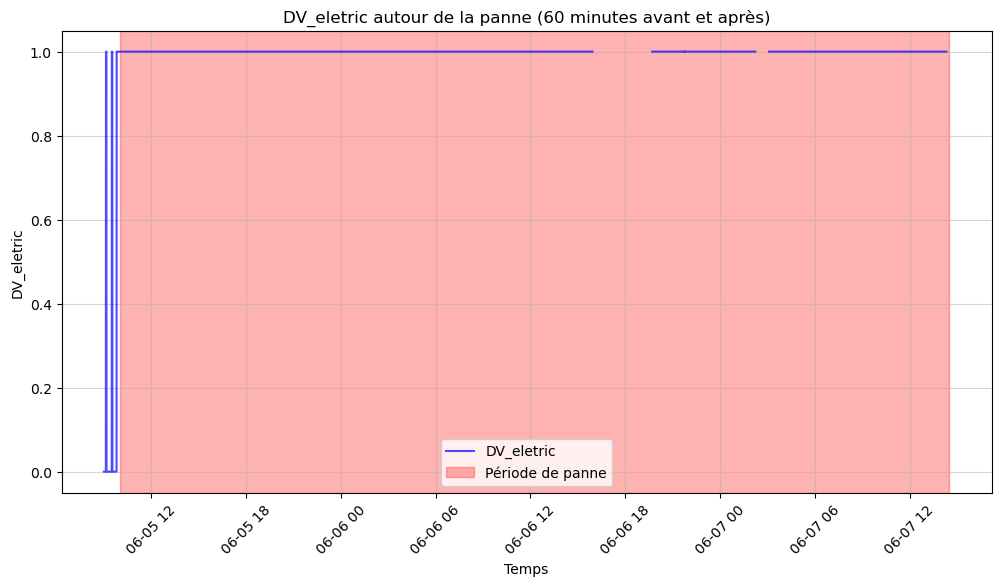

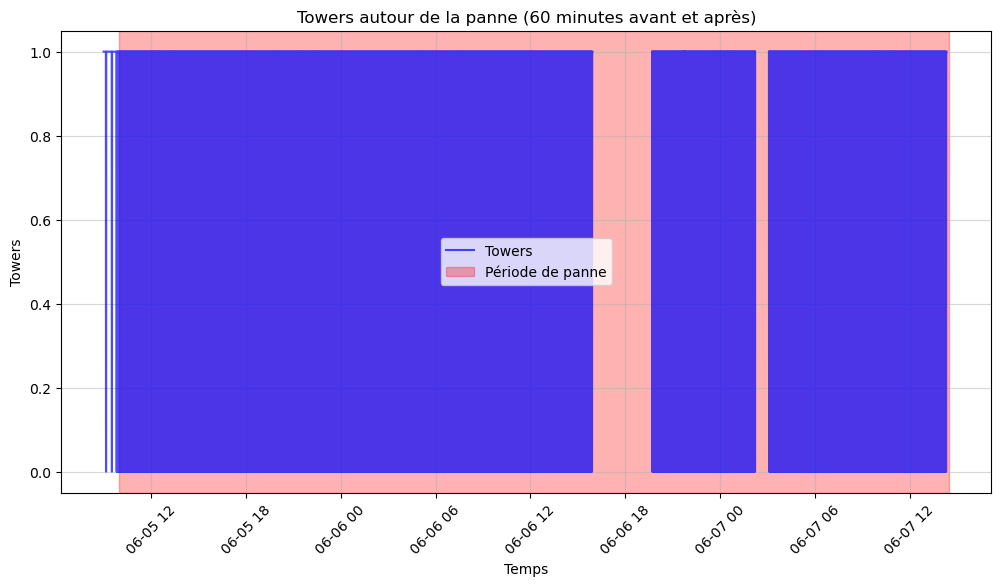

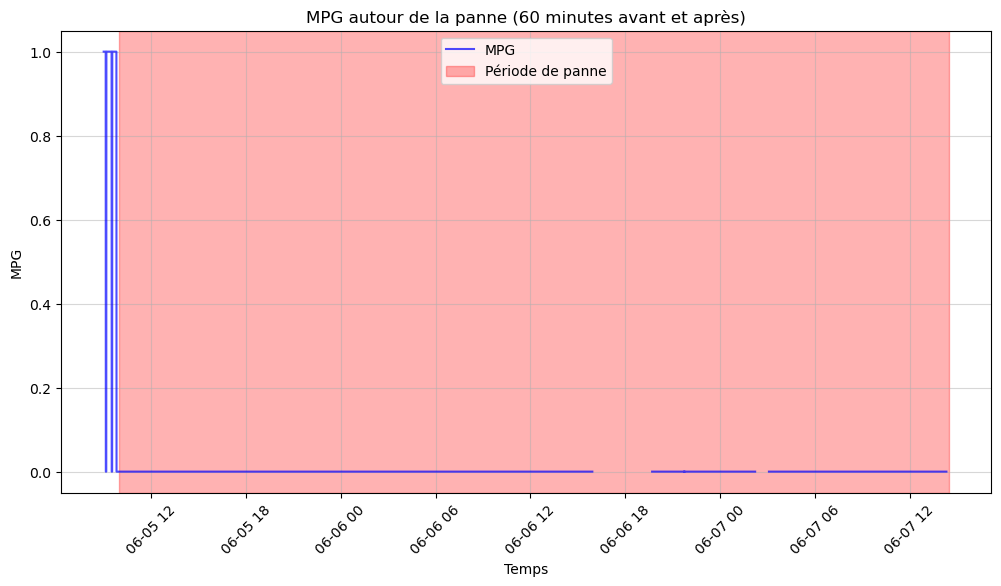

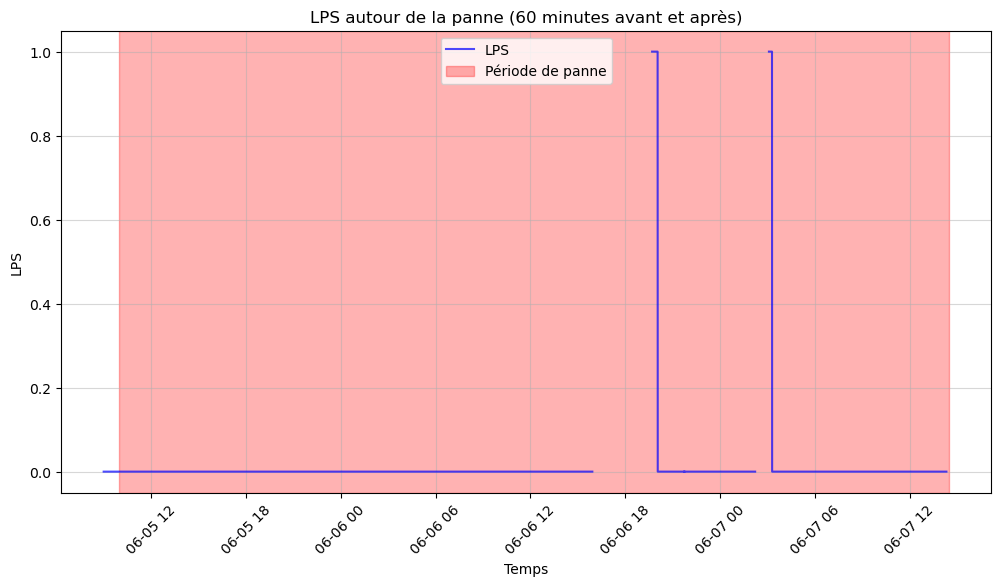

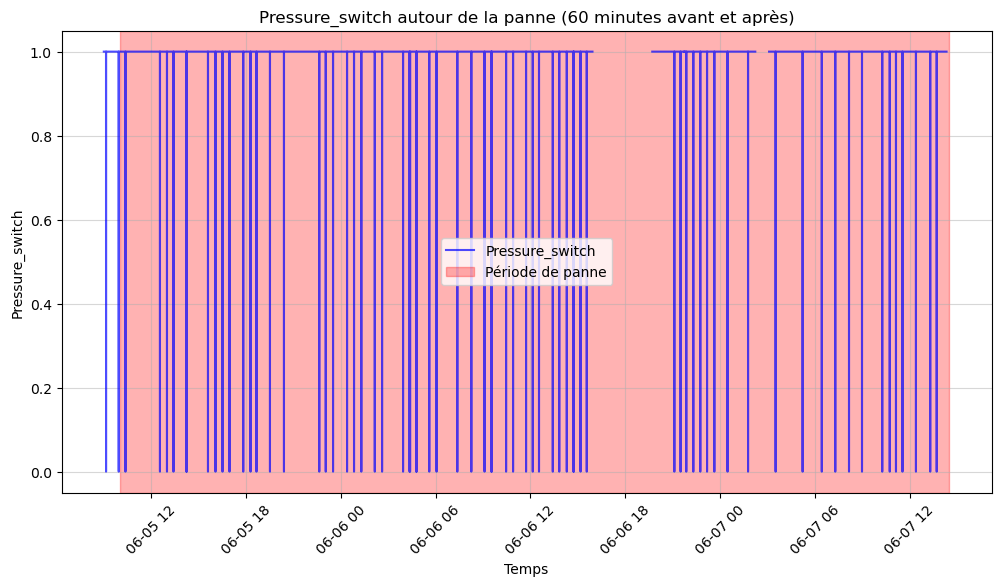

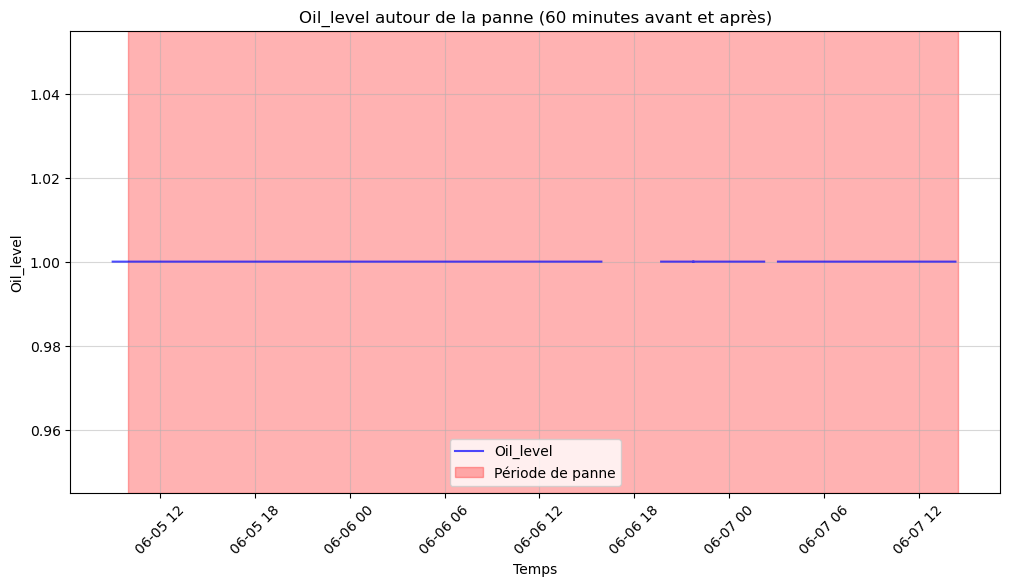

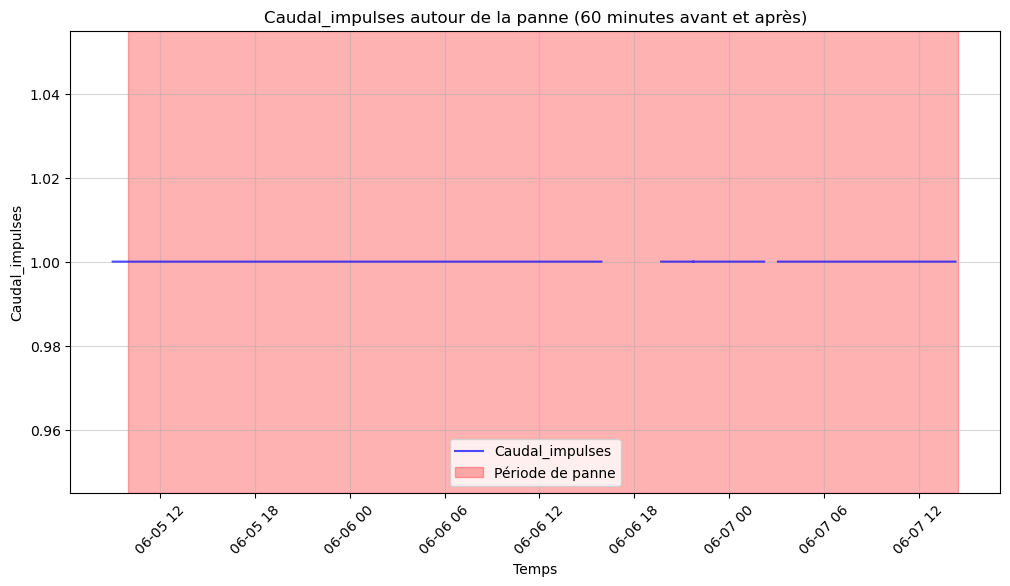

In [17]:
##########################
### Zoom sur la panne3 ###
##########################

# Définir la panne spécifique
panne_start = pd.Timestamp('2020-06-05 10:00')
panne_end   = pd.Timestamp('2020-06-07 14:30')


# Définir une fenêtre de 60 minutes avant et après
window_start = panne_start - pd.Timedelta(minutes=60)
window_end = panne_end + pd.Timedelta(minutes=60)

# Filtrer les données dans cette fenêtre
window_data = df[(df['timestamp'] >= window_start) & (df['timestamp'] <= window_end)]

# Visualiser les variables continues
for col in df.columns[1:-1]:  # Exclure 'timestamp' et 'panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer la série temporelle
    plt.plot(window_data['timestamp'], window_data[col], label=col, color='blue', alpha=0.7)
    
    # Mettre en évidence la panne
    plt.axvspan(panne_start, panne_end, color='red', alpha=0.3, label='Période de panne')
    
    # Ajouter des labels et une légende
    plt.title(f"{col} autour de la panne (60 minutes avant et après)")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


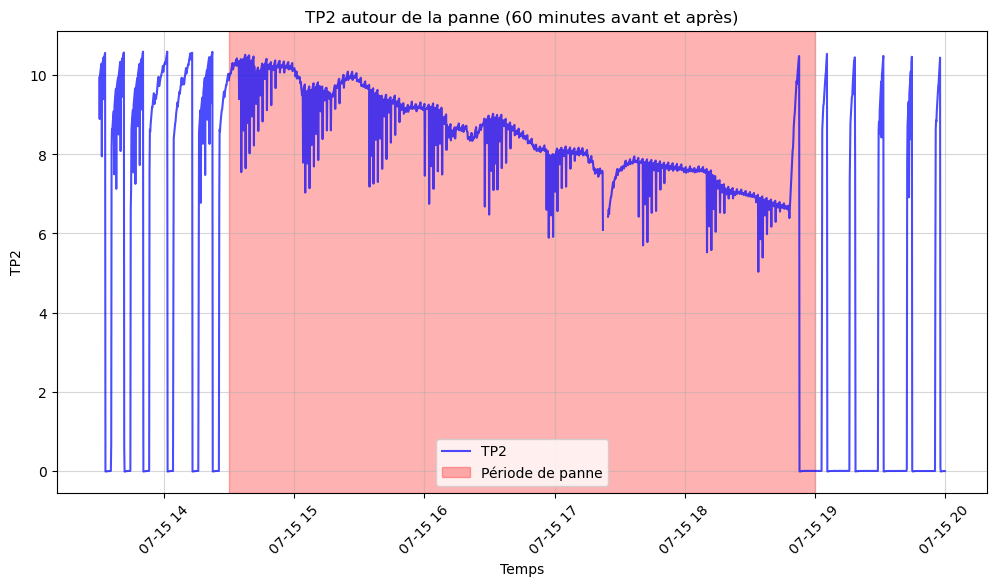

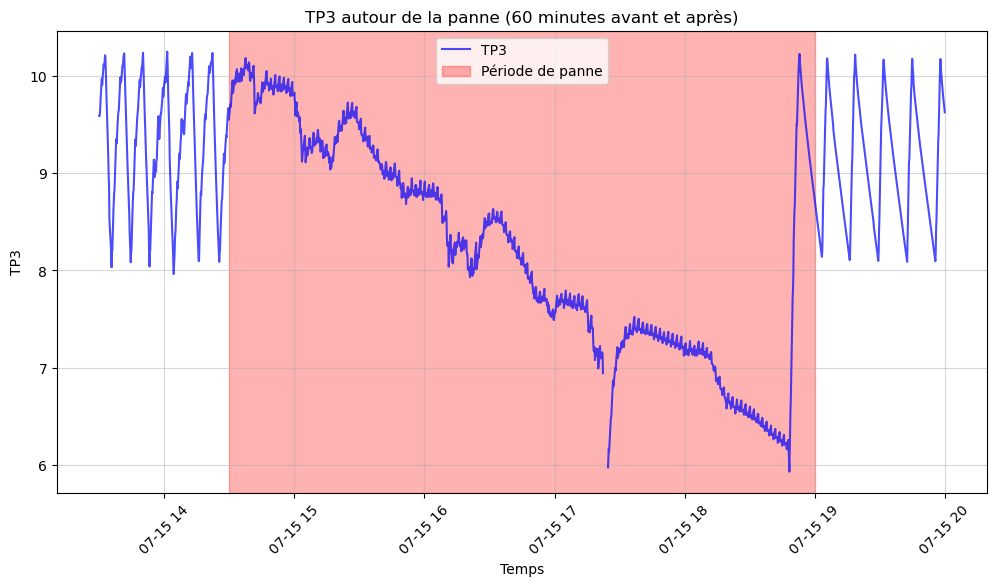

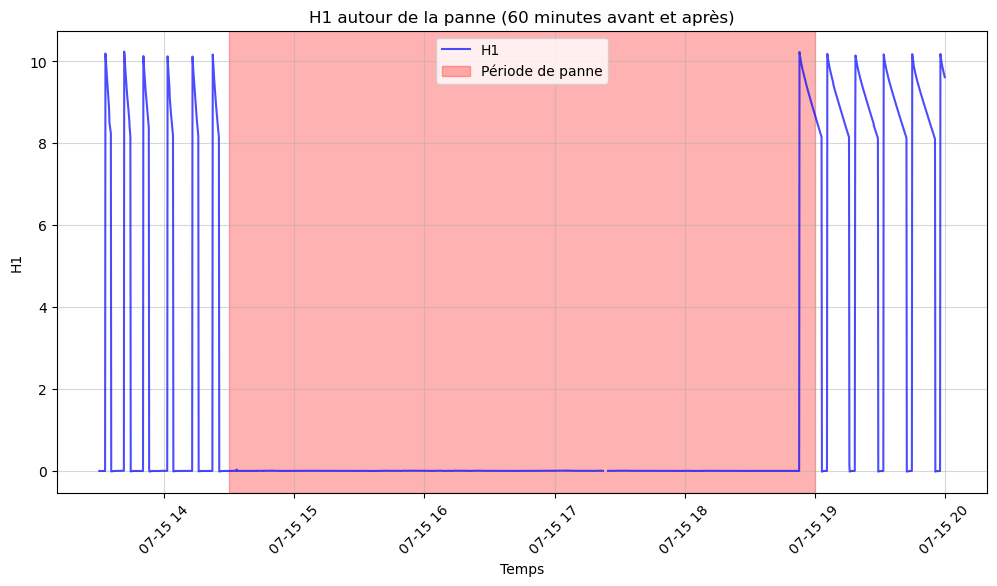

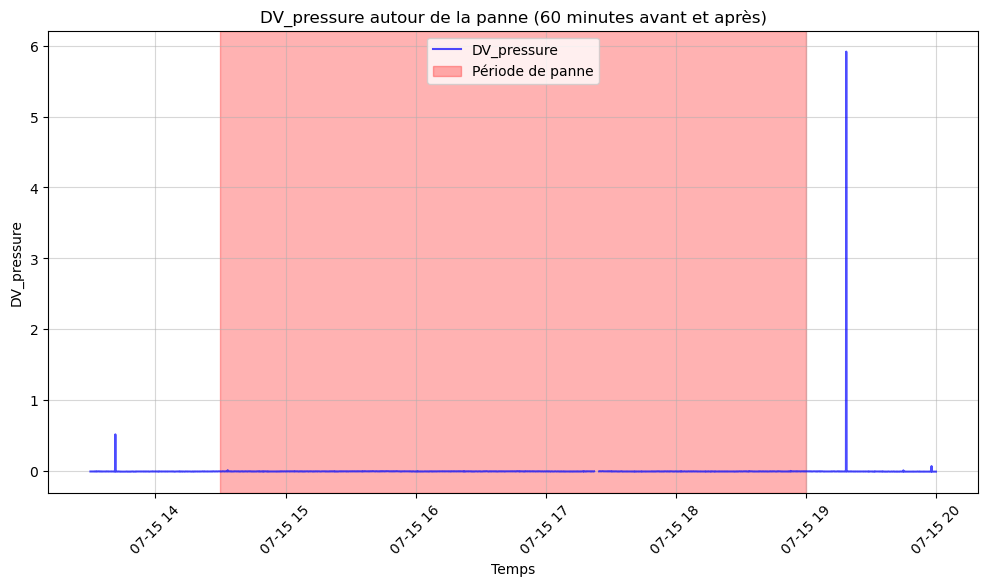

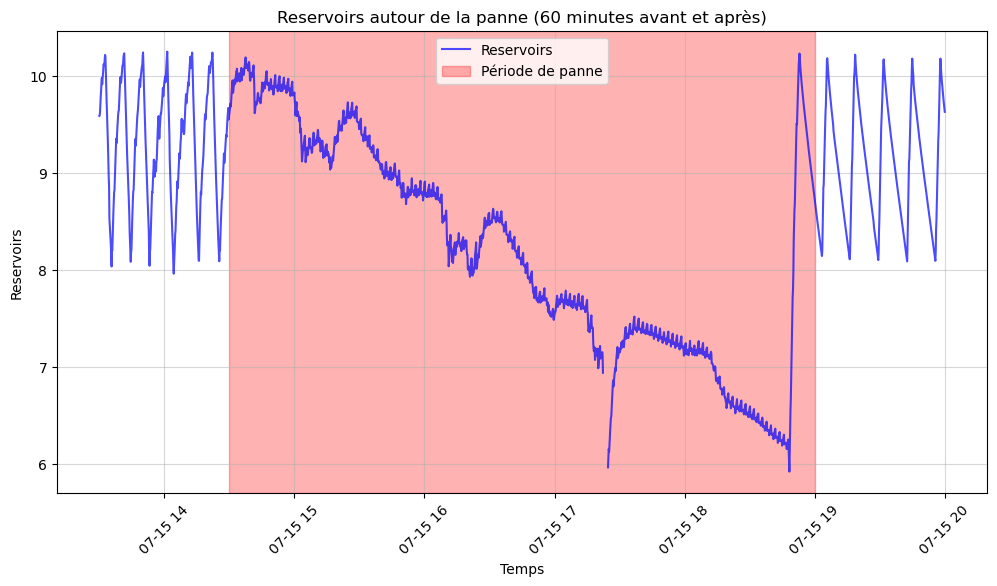

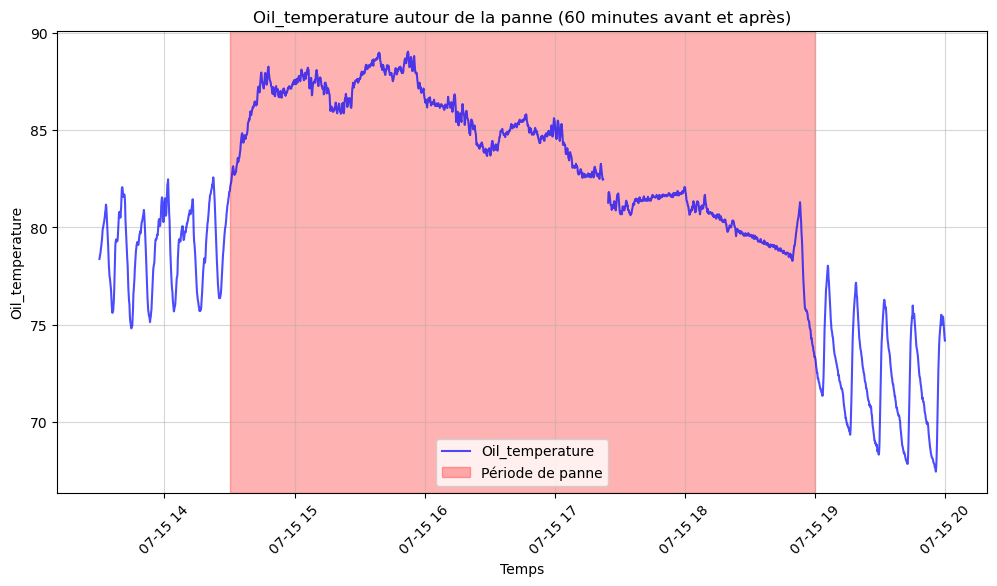

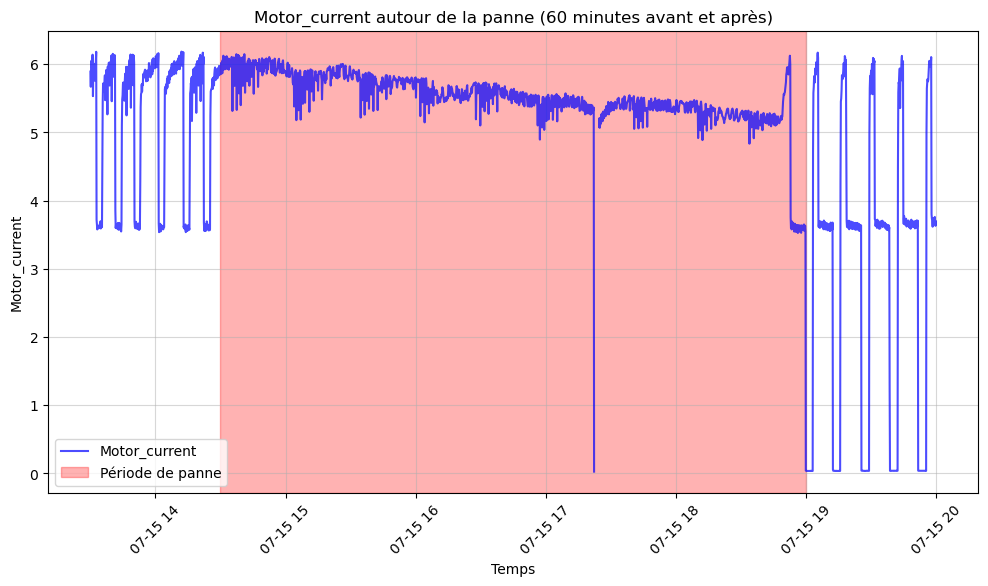

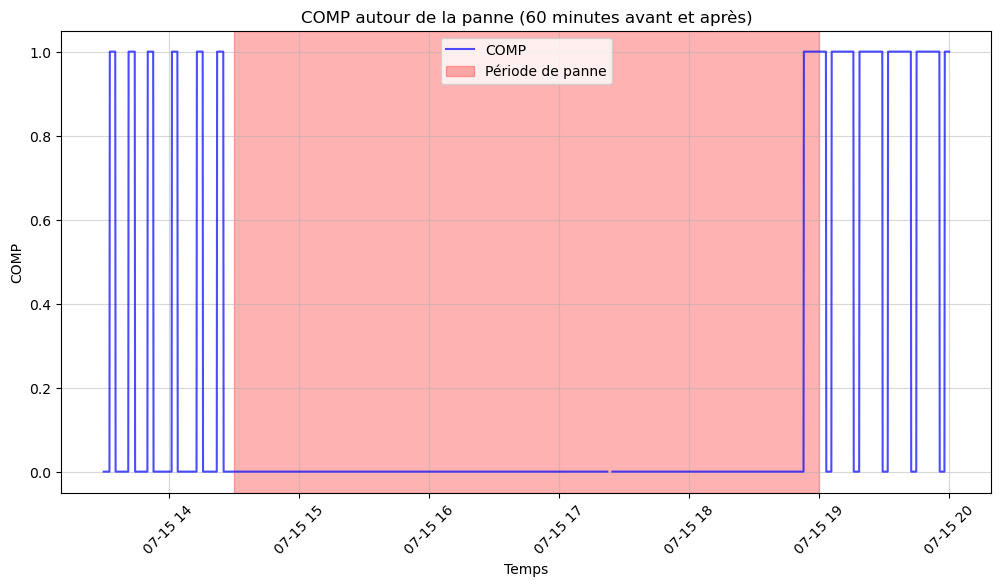

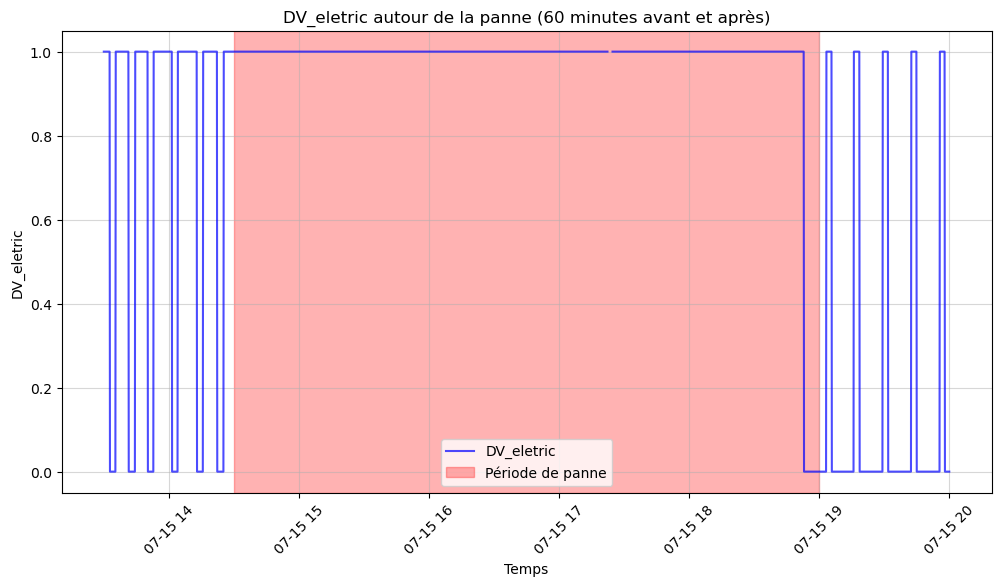

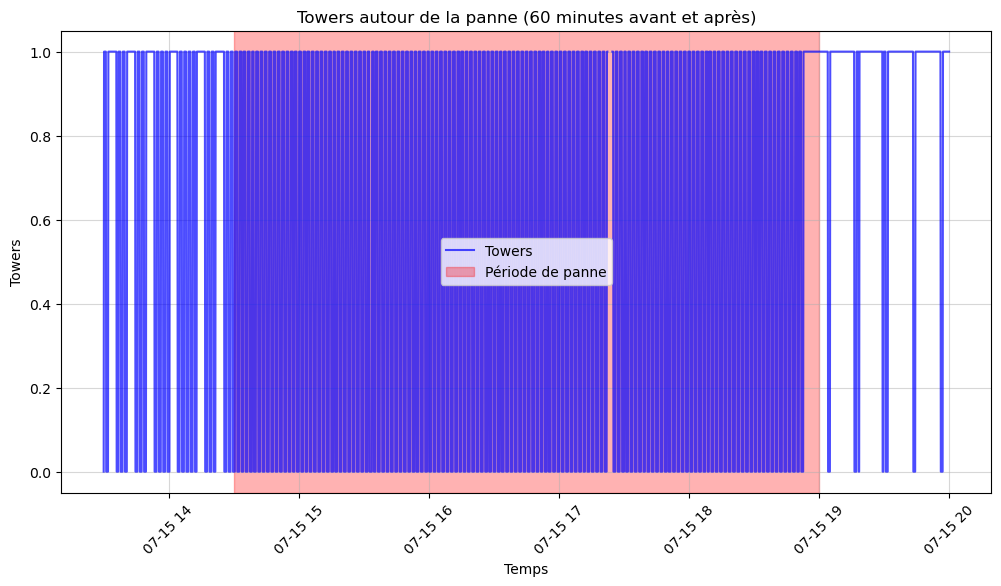

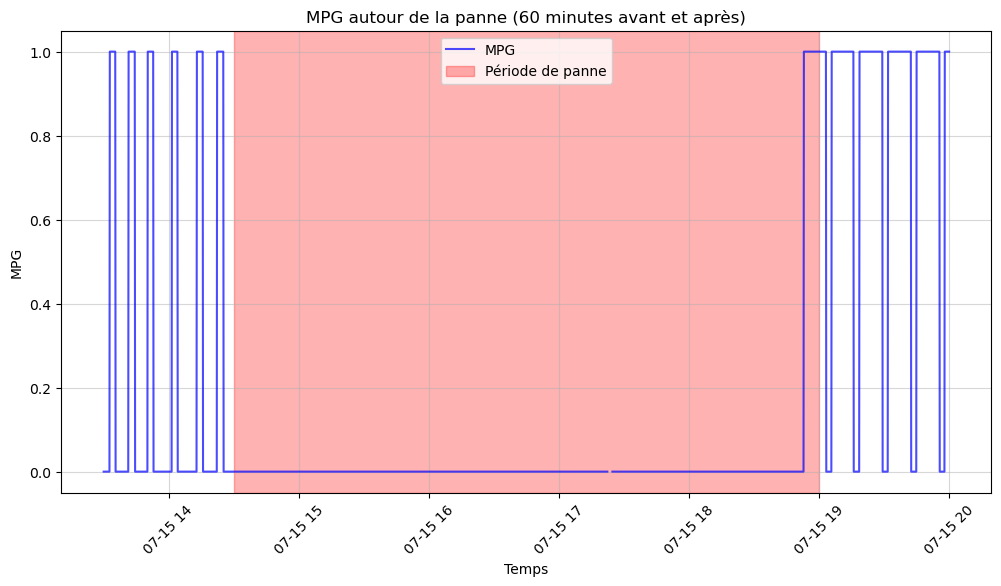

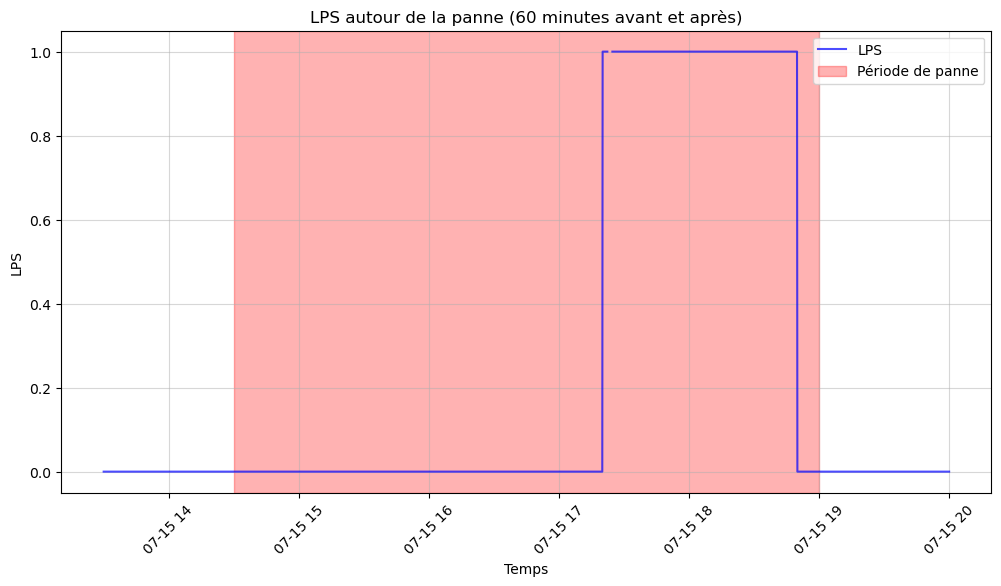

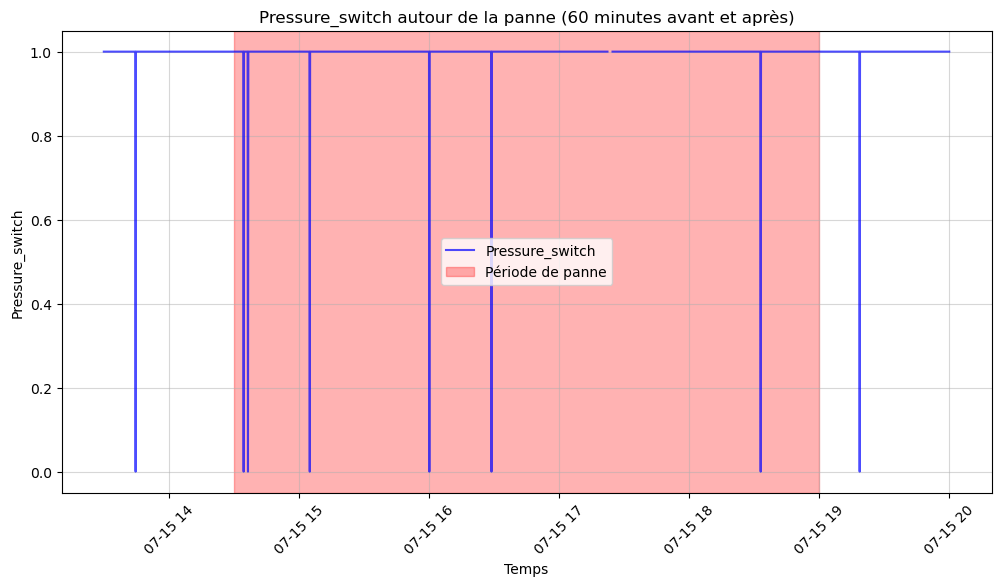

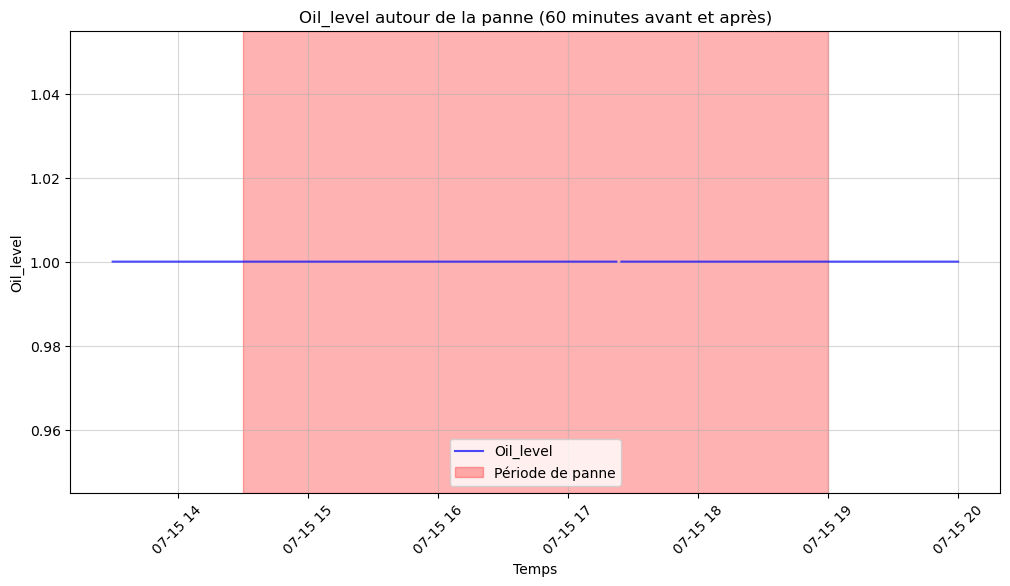

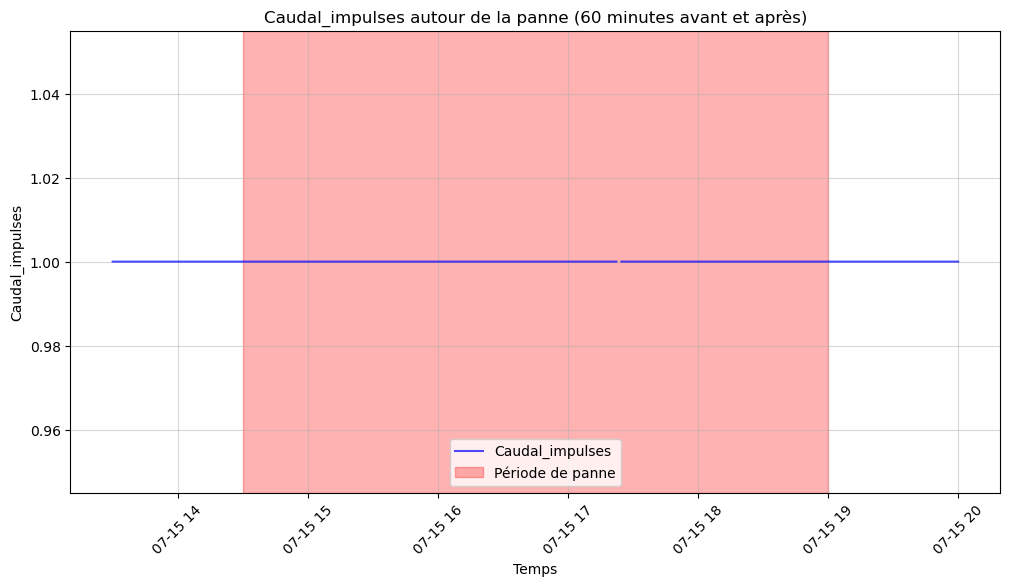

In [18]:
##########################
### Zoom sur la panne4 ###
##########################

# Définir la panne spécifique
panne_start = pd.Timestamp('2020-07-15 14:30')
panne_end   = pd.Timestamp('2020-07-15 19:00')


# Définir une fenêtre de 60 minutes avant et après
window_start = panne_start - pd.Timedelta(minutes=60)
window_end = panne_end + pd.Timedelta(minutes=60)

# Filtrer les données dans cette fenêtre
window_data = df[(df['timestamp'] >= window_start) & (df['timestamp'] <= window_end)]

# Visualiser les variables continues
for col in df.columns[1:-1]:  # Exclure 'timestamp' et 'panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer la série temporelle
    plt.plot(window_data['timestamp'], window_data[col], label=col, color='blue', alpha=0.7)
    
    # Mettre en évidence la panne
    plt.axvspan(panne_start, panne_end, color='red', alpha=0.3, label='Période de panne')
    
    # Ajouter des labels et une légende
    plt.title(f"{col} autour de la panne (60 minutes avant et après)")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


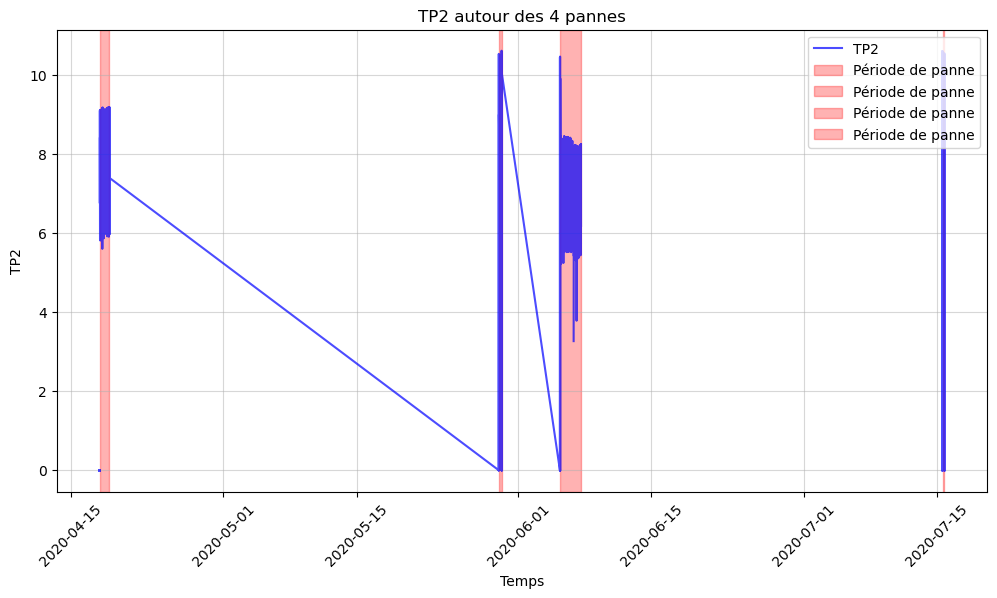

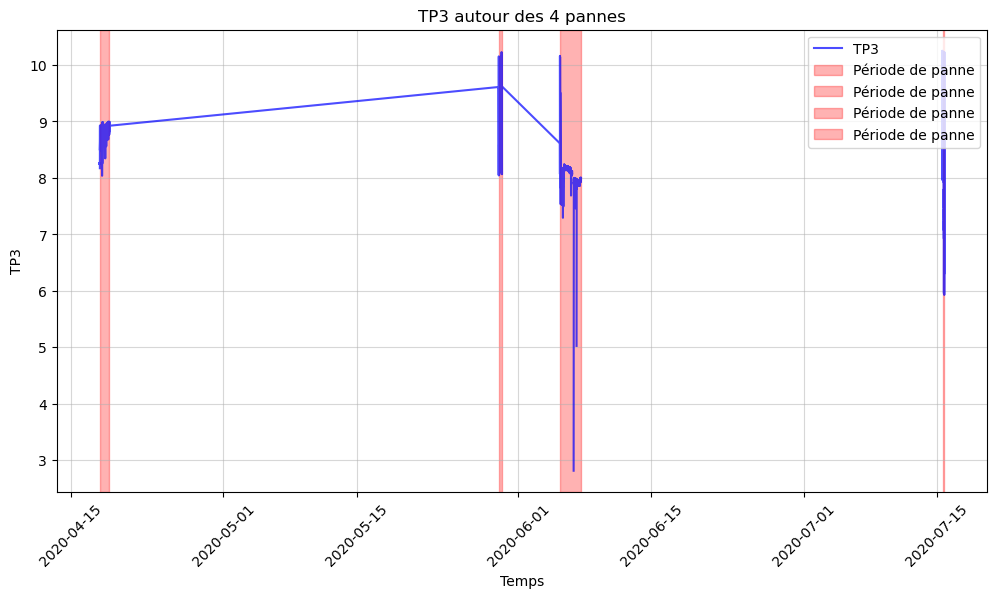

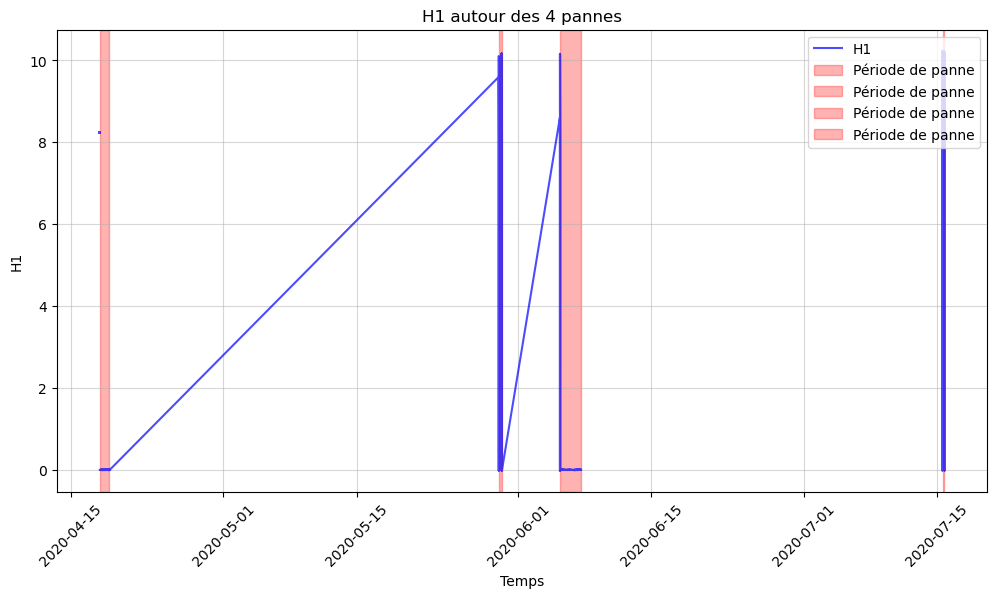

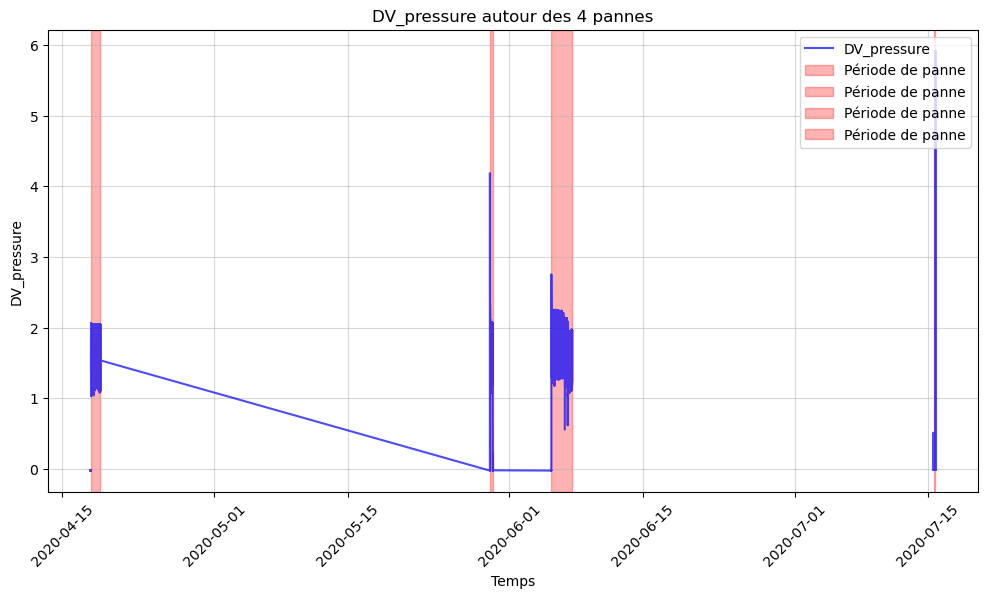

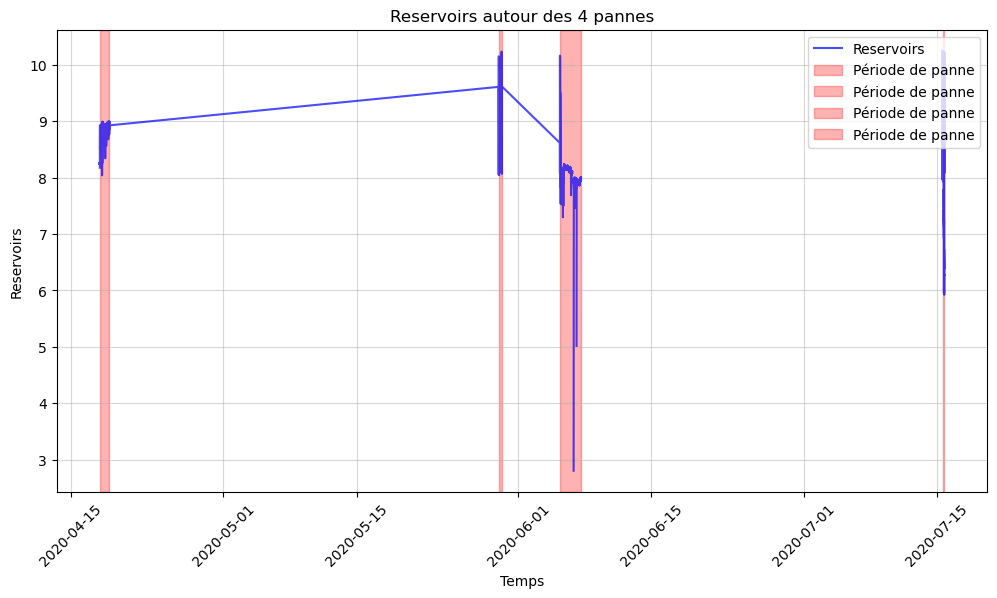

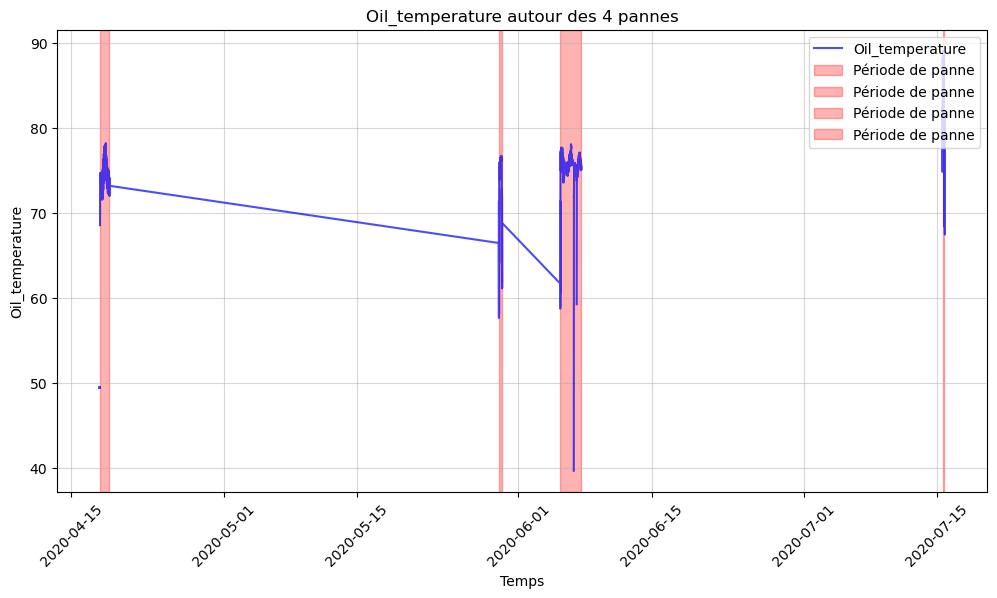

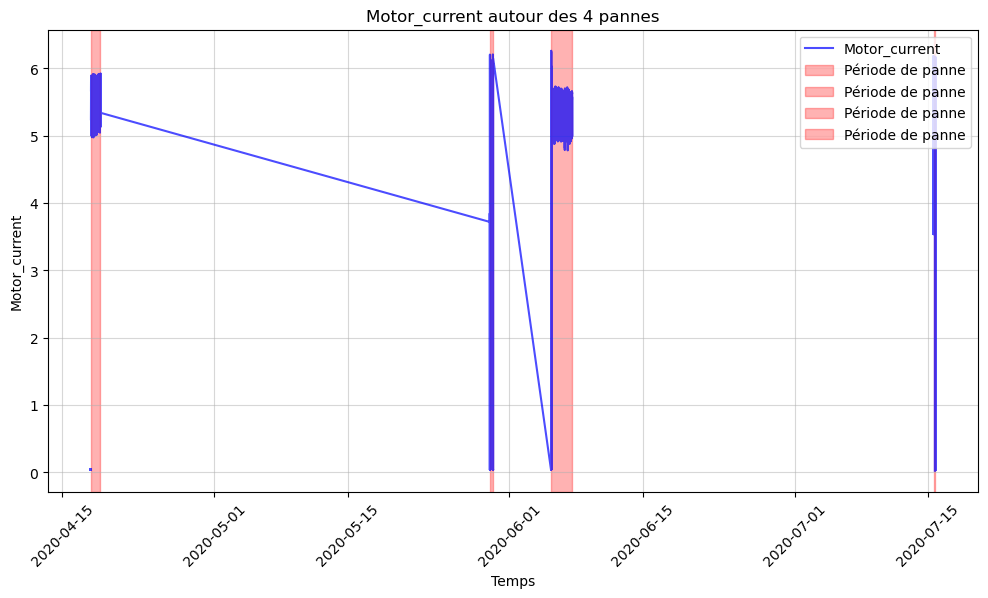

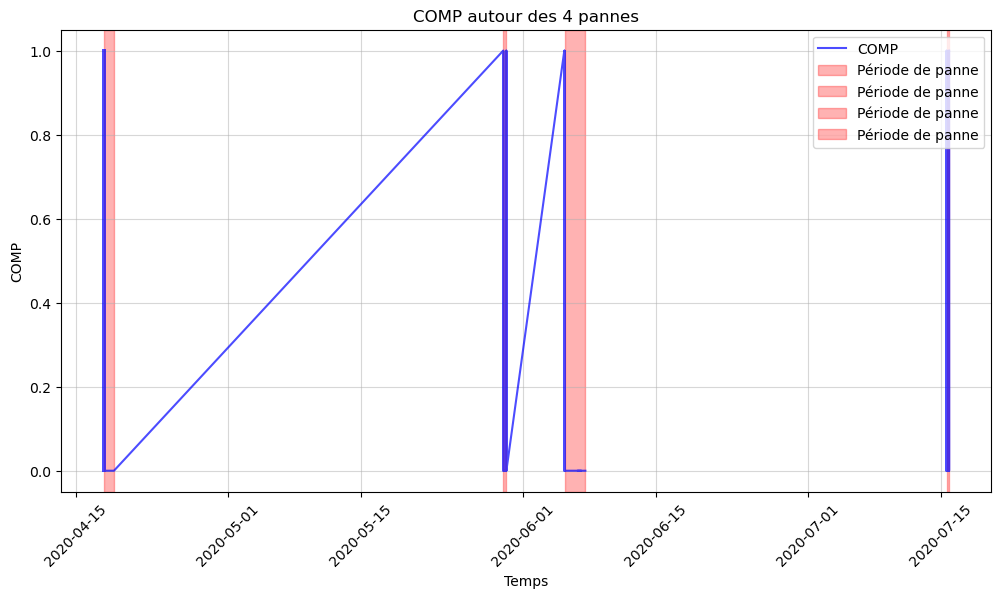

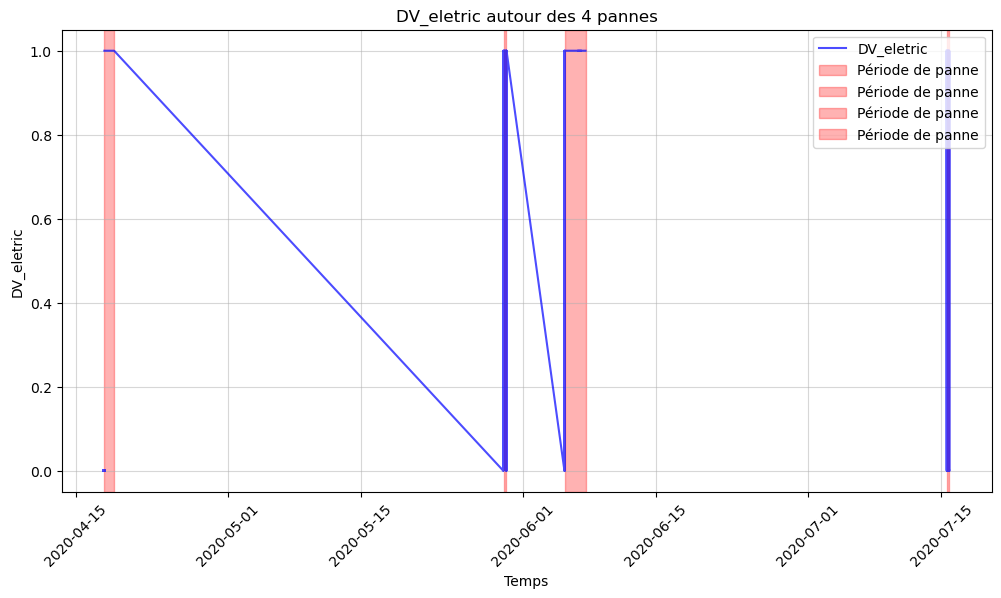

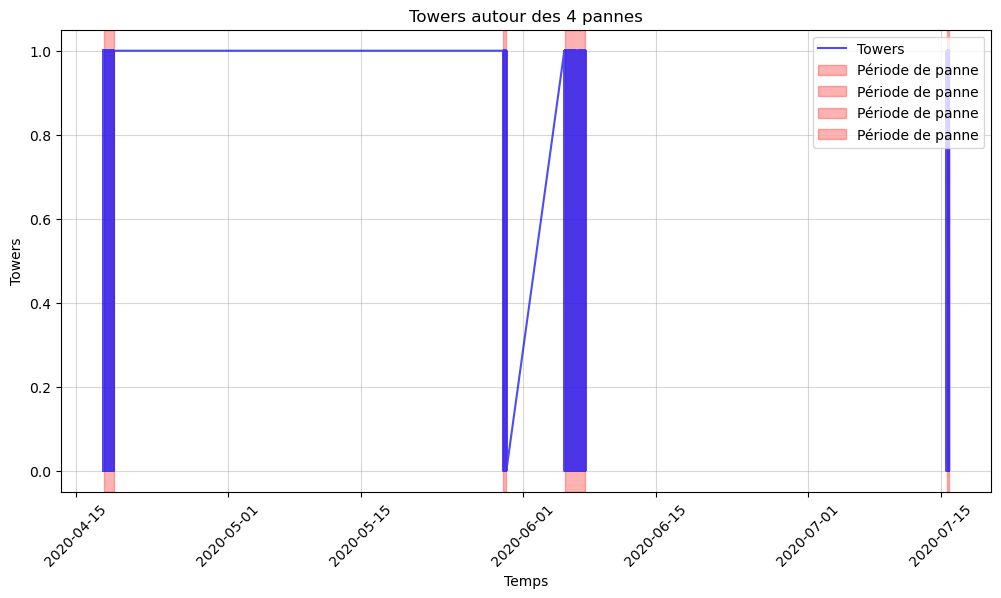

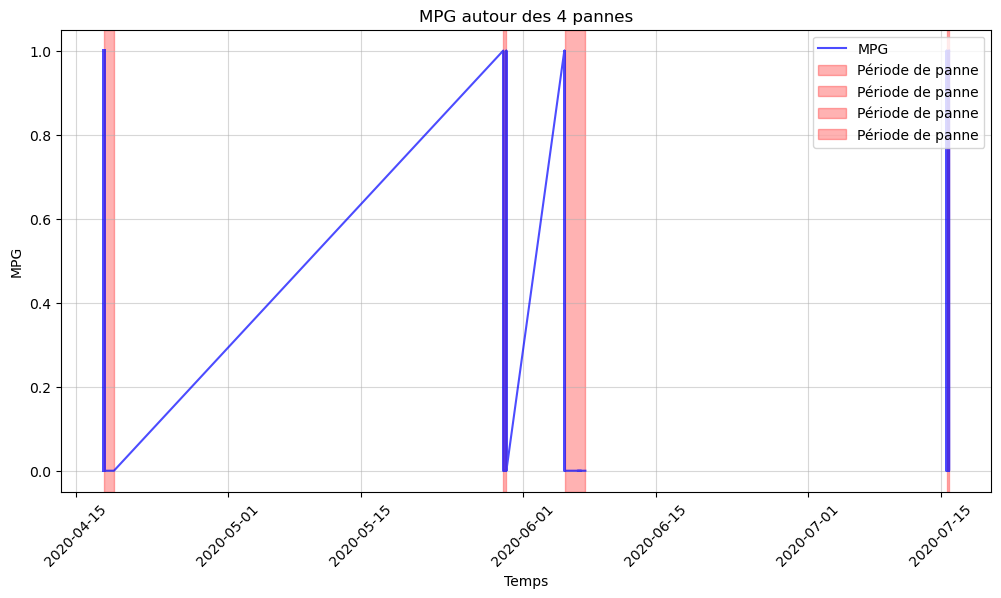

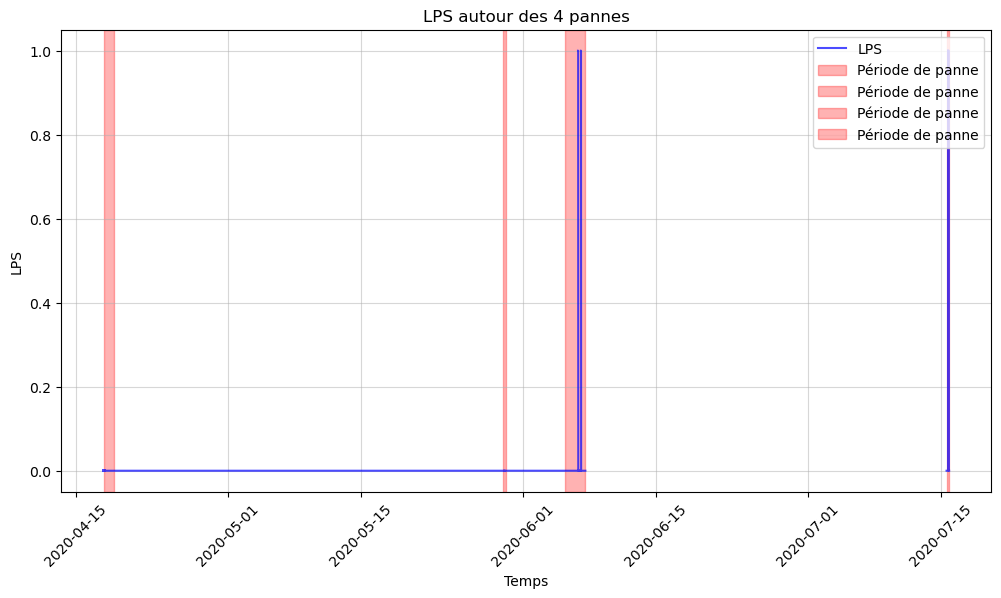

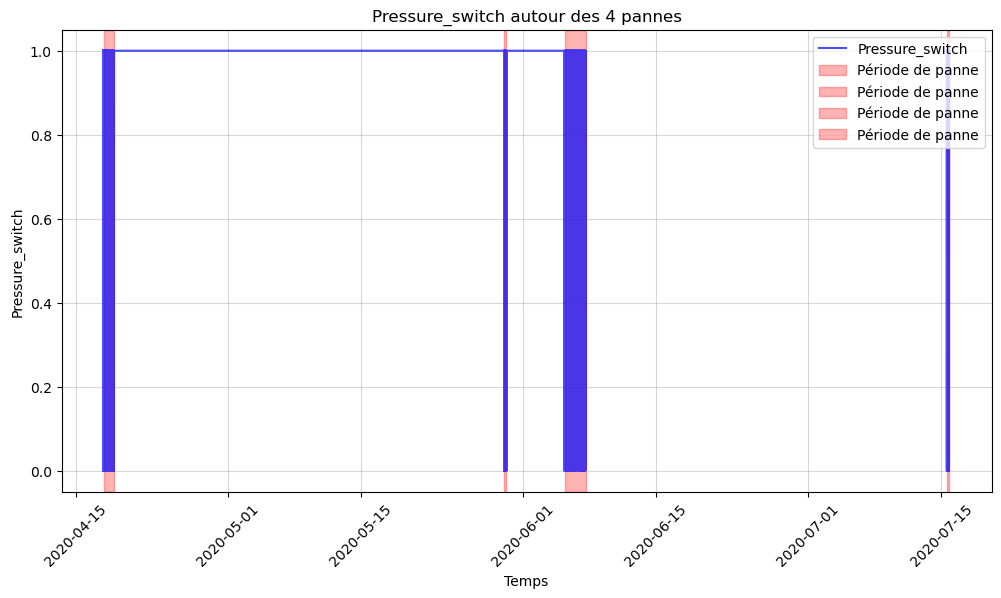

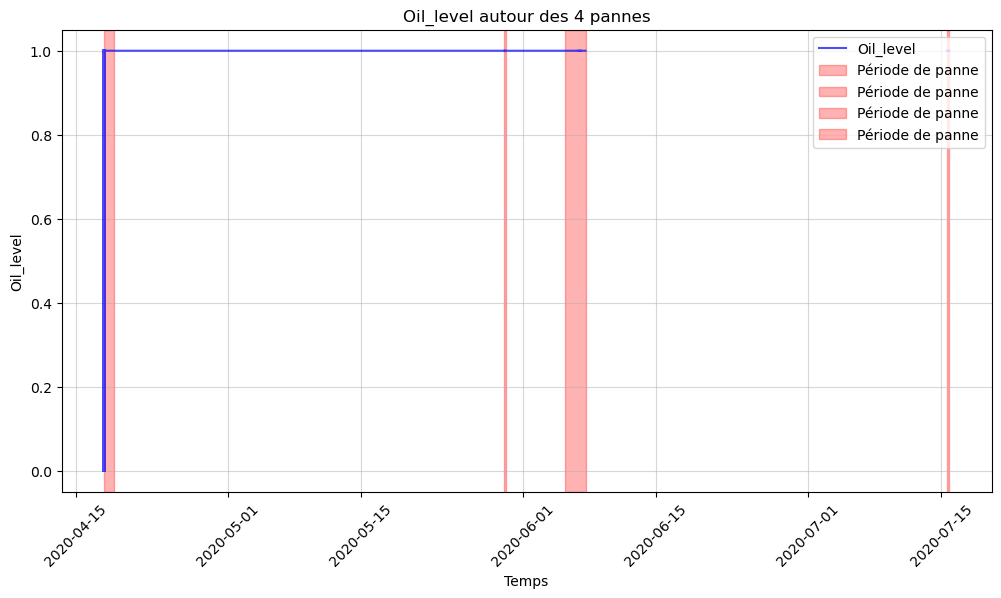

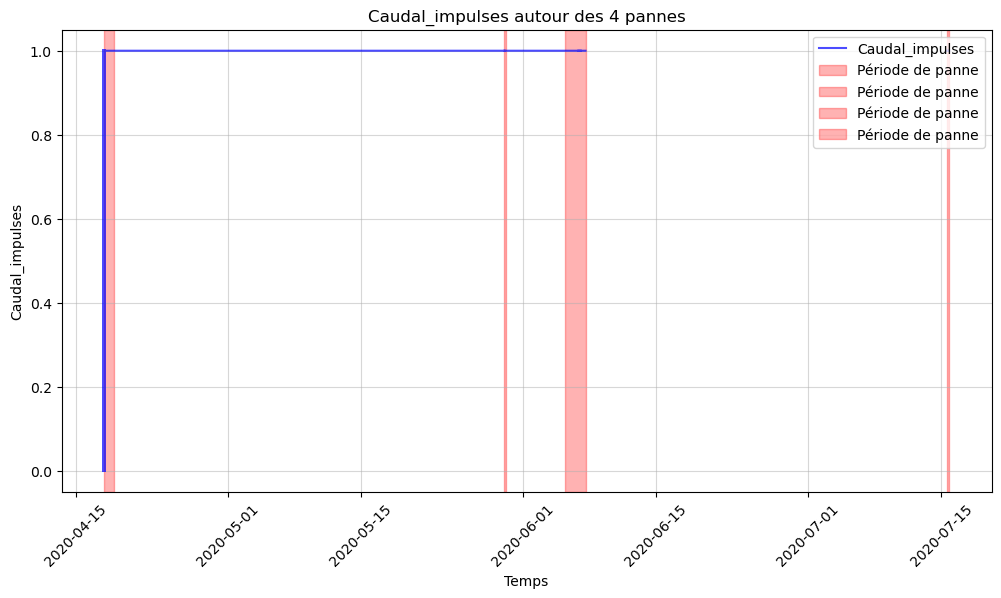

In [19]:
##########################
### Voir & examiner les tendances des variables sur les 4 pannes###
##########################

# Distribution des features par rapport au temps et les 4 pannes en meme temps

# Définir les fenêtres pour chaque panne
pannes = [
    {'start': pd.Timestamp('2020-04-18 00:00'), 'end': pd.Timestamp('2020-04-18 23:59')},
    {'start': pd.Timestamp('2020-05-29 23:30'), 'end': pd.Timestamp('2020-05-30 06:00')},
    {'start': pd.Timestamp('2020-06-05 10:00'), 'end': pd.Timestamp('2020-06-07 14:30')},
    {'start': pd.Timestamp('2020-07-15 14:30'), 'end': pd.Timestamp('2020-07-15 19:00')}
]

# Ajouter une fenêtre de 60 minutes avant et après chaque panne
for panne in pannes:
    panne['window_start'] = panne['start'] - pd.Timedelta(minutes=60)
    panne['window_end'] = panne['end'] + pd.Timedelta(minutes=60)

# Filtrer les données pour toutes les pannes
filtered_data = pd.DataFrame()
for panne in pannes:
    window_data = df[(df['timestamp'] >= panne['window_start']) & 
                           (df['timestamp'] <= panne['window_end'])]
    filtered_data = pd.concat([filtered_data, window_data])

# Supprimer les doublons après concaténation (au cas où des fenêtres se chevauchent)
filtered_data = filtered_data.drop_duplicates(subset='timestamp').sort_values('timestamp')

# Visualiser les variables continues avec les 4 périodes de panne
for col in df.columns[1:-1]:  # Exclure 'timestamp', 'panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer la série temporelle
    plt.plot(filtered_data['timestamp'], filtered_data[col], label=col, color='blue', alpha=0.7)
    
    # Mettre en évidence les périodes de panne
    for panne in pannes:
        plt.axvspan(panne['start'], panne['end'], color='red', alpha=0.3, label='Période de panne')
    
    # Ajouter des labels et une légende
    plt.title(f"{col} autour des 4 pannes")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.5)
    plt.show()


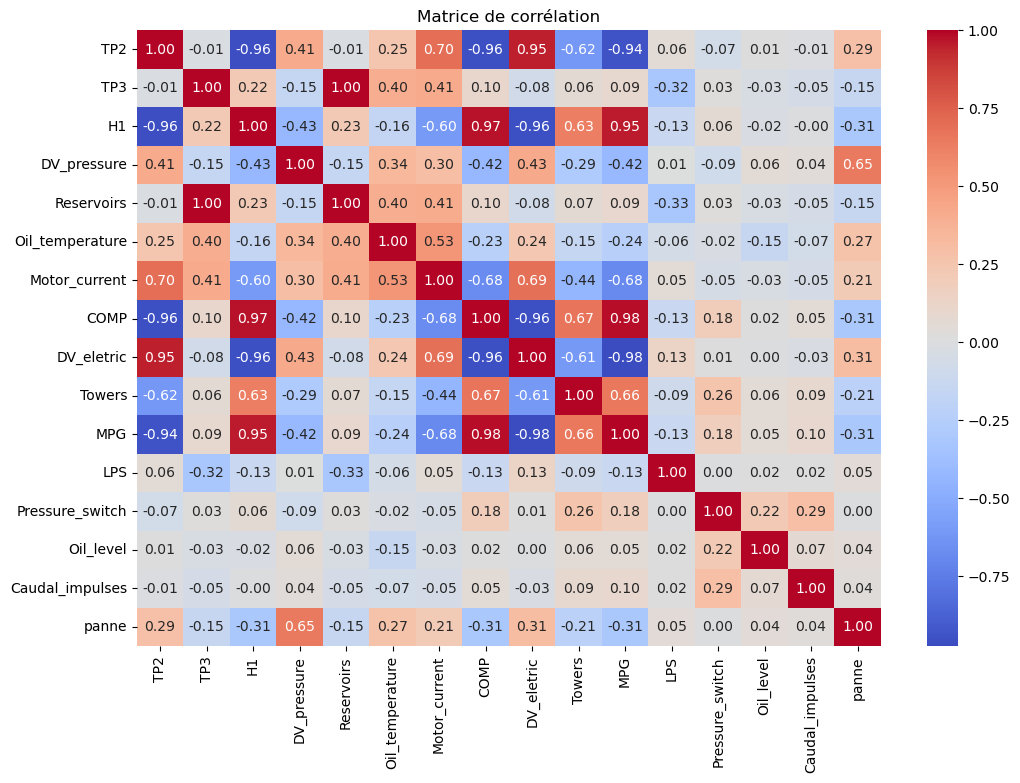

In [26]:
# Analyse des corrélations

# Sélection des colonnes numériques uniquement
numeric_columns = df.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Affichage avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation")
plt.show()

### Analyse temporelle avancée

Décomposition de la série temporelle pour TP2


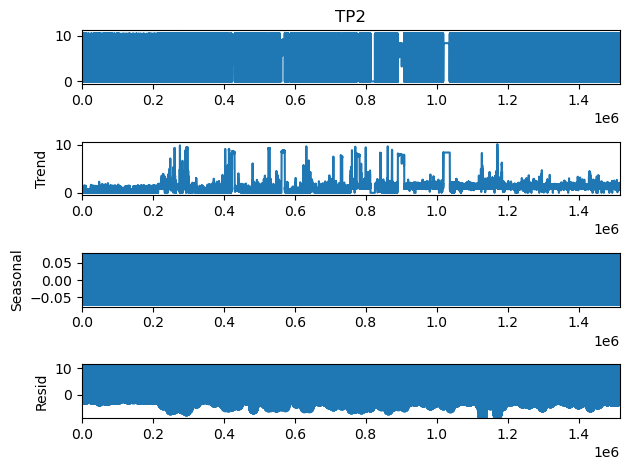

Décomposition de la série temporelle pour TP3


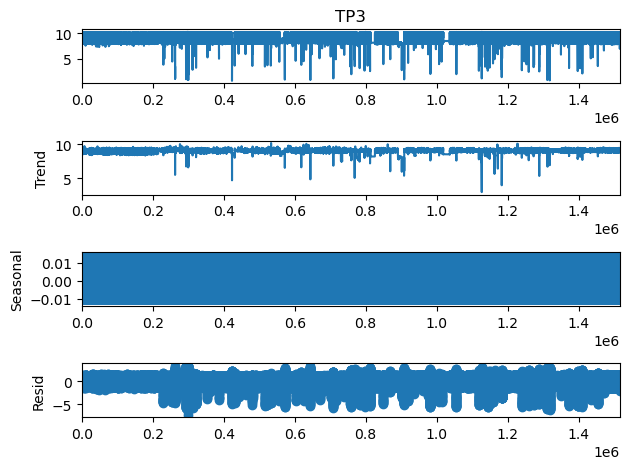

Décomposition de la série temporelle pour H1


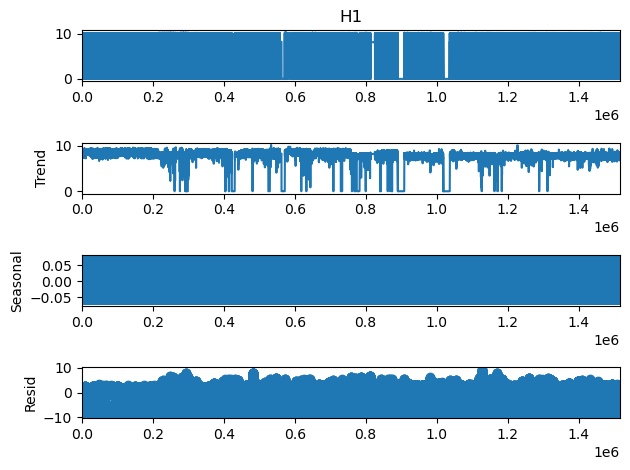

Décomposition de la série temporelle pour DV_pressure


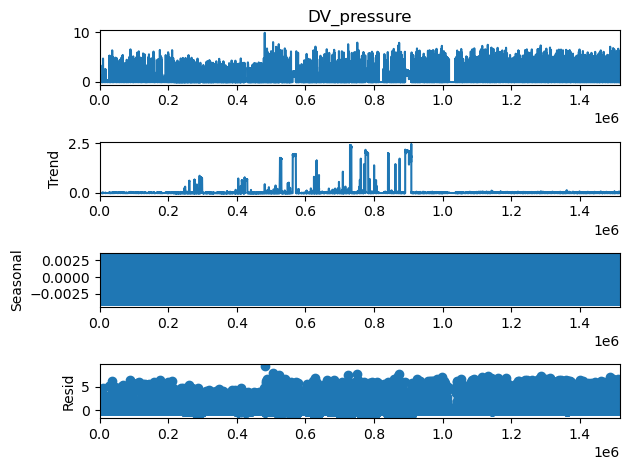

Décomposition de la série temporelle pour Reservoirs


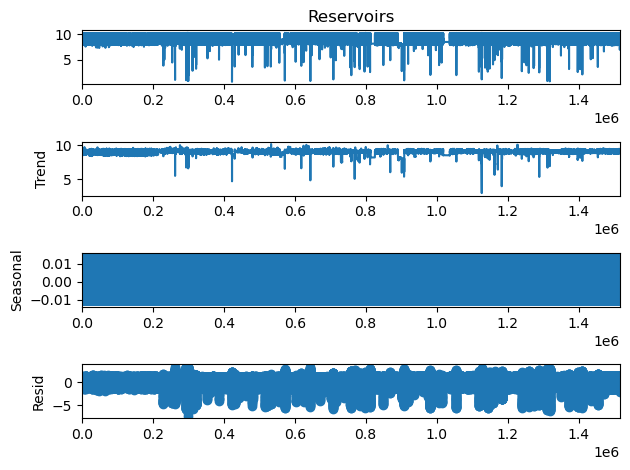

Décomposition de la série temporelle pour Oil_temperature


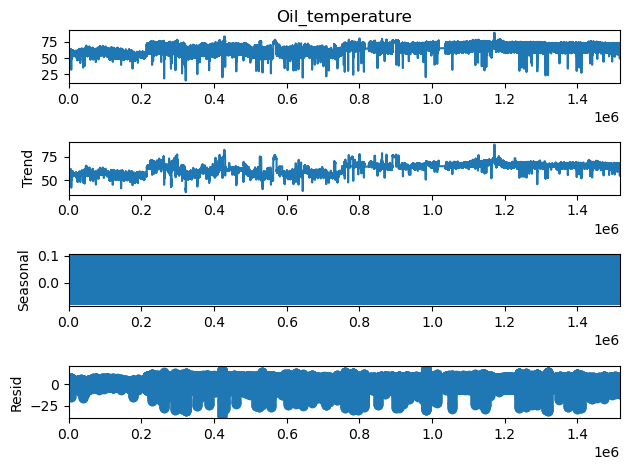

Décomposition de la série temporelle pour Motor_current


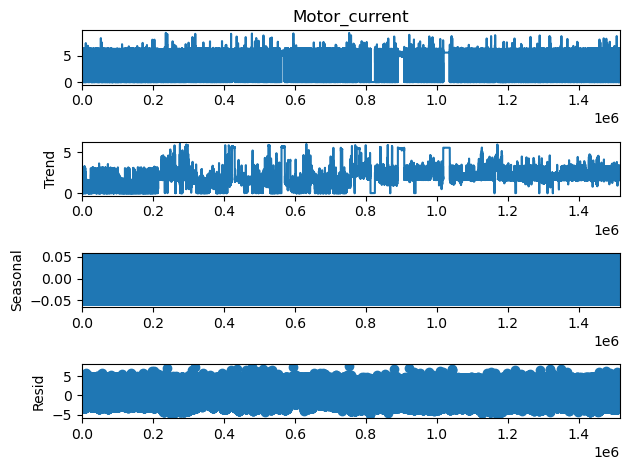

In [31]:
############################################################
### Voir les tendances et les saisonnalités temporelles ####
############################################################

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Liste des variables continues
numeric_columns = ["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current"]

# Décomposition pour chaque variable
for col in numeric_columns:
    print(f"Décomposition de la série temporelle pour {col}")
    try:
        decomposition = seasonal_decompose(df[col].dropna(), model="additive", period=144)  # period = 144 (une journée si les données sont toutes les 10 secondes)
        decomposition.plot()
        plt.show()
    except ValueError as e:
        print(f"Impossible de décomposer {col} : {e}")



<ul style="font-family: times, serif; font-size:12pt; color:blue;">
    <li><strong>Le graphique montre une décomposition des séries temporelles en quatre composantes principales.</strong></li>
    <li>Voici une analyse des différentes parties affichées :</li>
</ul>

<ul style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>1. Série originale (TP2)</strong></li>
    <ul style="font-family: times, serif; font-size:12pt; color:black;">
        <li><strong>Ce que cela représente :</strong></li>
        <li>
            Il s'agit de la série temporelle brute telle qu'elle est dans ton dataset (variable TP2).
            On remarque des variations dans la densité des données (des zones vides indiquent des lacunes dans les observations).
        </li>
        <li><strong>Interprétation :</strong></li>
        <li>
            La série montre des périodes où les données sont absentes. Cela affecte les autres composantes de la décomposition.
        </li>
    </ul>
</ul>

<ul style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>2. Tendance (Trend)</strong></li>
    <ul style="font-family: times, serif; font-size:12pt; color:black;">
        <li><strong>Ce que cela représente :</strong></li>
        <li>
            La composante tendance capture les changements à long terme dans les données. Elle montre les évolutions ou variations progressives dans la série.
        </li>
        <li><strong>Interprétation :</strong></li>
        <li>
            La tendance semble fluctuer significativement, avec des pics et des chutes dans certaines zones. Cela peut refléter des variations dans la pression/température ou des anomalies dans les mesures.
        </li>
    </ul>
</ul>

<ul style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>3. Saisonnière (Seasonal)</strong></li>
    <ul style="font-family: times, serif; font-size:12pt; color:black;">
        <li><strong>Ce que cela représente :</strong></li>
        <li>
            La composante saisonnière capture les variations périodiques ou cycliques qui se répètent à intervalles réguliers dans les données.
        </li>
        <li><strong>Interprétation :</strong></li>
        <li>
            Dans ce graphique, la composante saisonnière est presque nulle. Cela indique soit un manque de cyclicité dans les données, soit une perturbation due aux lacunes.
        </li>
    </ul>
</ul>

<ul style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>4. Résiduelles (Resid)</strong></li>
    <ul style="font-family: times, serif; font-size:12pt; color:black;">
        <li><strong>Ce que cela représente :</strong></li>
        <li>
            Les résiduelles sont la partie des données qui ne peut pas être expliquée par la tendance ou la saisonnalité. Elles représentent les bruits ou anomalies.
        </li>
        <li><strong>Interprétation :</strong></li>
        <li>
            Les résiduelles semblent contenir une certaine variabilité et bruit, probablement influencées par les lacunes dans les données. Certaines variations inhabituelles pourraient être des anomalies à analyser.
        </li>
    </ul>
</ul>


# Stratégie d'imputation : Choix de la méthode d'imputation

<h3>Imputation des valeurs manquantes :</h3>
<ul style="font-family: times, serif; font-size:12pt; color:blue;">
    <li><strong>Utiliser des méthodes adaptées aux types de données :</strong>
        <ul style="color:black;">
            <li><strong>Variables continues :</strong> Imputation basée sur les séries temporelles (interpolation linéaire, KNN, modèles prédictifs).</li>
            <li><strong>Variables catégoriques :</strong> Imputation par mode ou par apprentissage supervisé.</li>
        </ul>
    </li>
    <li>
        <strong>Prioriser des approches temporelles :</strong>
        <ul style="color:black;">
            <li>Interpolation ou régression sur des fenêtres temporelles pour respecter la nature séquentielle des données.</li>
        </ul>
    </li>
</ul>